In [1]:
!gdown --id 1p0r3RUw4q9XJljOCtZOjWBNkQl8GO3S7

Downloading...
From: https://drive.google.com/uc?id=1p0r3RUw4q9XJljOCtZOjWBNkQl8GO3S7
To: /content/nghanbari-datasets-img_align_celeba-1.tar
1.57GB [00:15, 101MB/s] 


In [2]:
mkdir imagnes

In [3]:
mv nghanbari-datasets-img_align_celeba-1.tar imagnes

In [4]:
cd imagnes

/content/imagnes


In [5]:
!tar -xf nghanbari-datasets-img_align_celeba-1.tar

In [6]:
cd ..

/content


In [7]:
!gdown --id 1S2jCKzxrDASiq7BNFSN_9i2X1BXZCc9y
!gdown --id 1a-lbjNHHlGQZlsiEqou5j8XskfNWVx5R

!gdown --id 1IT0RJa3_vmnVtuyoSn0AJZxzItdrGFRO
!gdown --id 1ecrg-qP79rBaVMM9quHfnenK-lyWGiEE

Downloading...
From: https://drive.google.com/uc?id=1S2jCKzxrDASiq7BNFSN_9i2X1BXZCc9y
To: /content/utils.pyc
100% 1.92k/1.92k [00:00<00:00, 5.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1a-lbjNHHlGQZlsiEqou5j8XskfNWVx5R
To: /content/ops.pyc
100% 3.24k/3.24k [00:00<00:00, 4.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1IT0RJa3_vmnVtuyoSn0AJZxzItdrGFRO
To: /content/ops.py
100% 3.26k/3.26k [00:00<00:00, 5.56MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ecrg-qP79rBaVMM9quHfnenK-lyWGiEE
To: /content/utils.py
100% 1.20k/1.20k [00:00<00:00, 3.58MB/s]


In [ ]:
from __future__ import division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
import time
import os

from ops import *
from utils import *

C:\Users\lnovak007\AppData\Local\Continuum\miniconda3\envs\cv-course\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lnovak007\AppData\Local\Continuum\miniconda3\envs\cv-course\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lnovak007\AppData\Local\Continuum\miniconda3\envs\cv-course\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([

Today we are going to train GAN for generating faces and then we will make fun playing with it. Generative adversarial networks (GANs) are deep neural net architectures comprised of two nets, pitting one against the other (thus the “adversarial”). One neural network, called the generator, generates new faces, while the other, the discriminator,  decides whether each instance of face it reviews belongs to the actual training dataset or not.

Firstly download aligned faces of celebrities from here <a href="https://yadi.sk/d/xjuClJJH3MAVXh">link</a> and extract them into folder near ipython notebook.

# Implementation of GAN

Constant variables below depends on your dataset and choosing of architecture.

In [ ]:
DATA_PATH = r'img_align_celeba\img_align_celeba'  # Path to the dataset with celebA faces
Z_DIM=100  # Dimension of face's manifold
GENERATOR_DENSE_SIZE=128*8  # Length of first tensor in generator

IMAGE_SIZE=64  # Shapes of input image
BATCH_SIZE=64  # Batch size
N_CHANNELS = 3  # Number channels of input image

MERGE_X = 8  # Number images in merged image
MERGE_Y = 8

In [ ]:
assert(os.path.exists(DATA_PATH)), 'Please, download aligned celebA to DATA_PATH folder'

Let's define GAN. To do it, we need to define generator, discriminator and loss functions.

Here are some tips on the architecture of the generator:
1. The deeper is convolution, the less filters is using.
2. Apply deconvolutions-relu layers to achieve input image shape.
3. Use batch normalization before nonlinearity for speed and stability of learning.
4. Use tanh activation at the end of network (in this case images should be scaled to [-1, 1])
5. To force generator not to collapse and produce different outputs initialize bias with zero (see linear layer).

Other useful tips: https://github.com/soumith/ganhacks. Example of architecture see below. You may also use defined layers from ops.py. <b> Please, use names for layers started with "g\_" for generator and "d_" for discriminator.</b>

<img src="https://raw.githubusercontent.com/carpedm20/DCGAN-tensorflow/master/DCGAN.png">

## Writing generator function (1 point)

In [ ]:
def generator(z, is_training):
    # Firstly let's reshape input vector into 3-d tensor. 
    z_ = linear(z, GENERATOR_DENSE_SIZE * 4 * 4, 'g_h0_lin')
    h_in = tf.reshape(z_, [-1, 4, 4, GENERATOR_DENSE_SIZE])
    
    """
    Your code goes here.
    """
    gen_batch_norm_0 = batch_norm(name='gen_batch_norm_0')
    h_0_bn = gen_batch_norm_0(h_in, is_training)
    h_0_a = lrelu(h_0_bn, name='gen_lr_0')
    
    h_1 = deconv2d(h_0_a, output_shape=[BATCH_SIZE, 8, 8, 512], name='gen_deconv2d_1')
    gen_batch_norm_1 = batch_norm(name='gen_batch_norm_1')
    h_1_bn = gen_batch_norm_1(h_1, is_training)
    h_1_a = lrelu(h_1_bn, name='gen_lr_1')
    h_1_a_dr = tf.nn.dropout(h_1_a, 0.5, name='gen_dr_1')
    
    h_2 = deconv2d(h_1_a_dr, output_shape=[BATCH_SIZE, 16, 16, 256], name='gen_deconv2d_2')
    gen_batch_norm_2 = batch_norm(name='gen_batch_norm_2')
    h_2_bn = gen_batch_norm_2(h_2, is_training)
    h_2_a = lrelu(h_2_bn, name='gen_lr_2')
    h_2_a_dr = tf.nn.dropout(h_2_a, 0.5, name='gen_dr_2')
    
    h_3 = deconv2d(h_2_a_dr, output_shape=[BATCH_SIZE, 32, 32, 128], name='gen_deconv2d_3')
    gen_batch_norm_3 = batch_norm(name='gen_batch_norm_3')
    h_3_bn = gen_batch_norm_3(h_3, is_training)
    h_3_a = lrelu(h_3_bn, name='gen_lr_3')
    
    h_out = deconv2d(h_3_a, [BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS],
            name='gen_out')

    return tf.nn.tanh(h_out)

Now let's define discriminator. Discriminator takes 3d tensor as input and outputs one number - probability that this is an image.

Some advice for discriminator's architecture:
1. Use batch normalization between convolutions and nonlinearities.
2. Use leaky relu with the leak about 0.2.
3. The deeper the layer, the more filters you can use.

If you use batch normalization, please define every layer in their own scope and pass is_training parameter there. Or you may use class of batch normalization from ops.py. Do not forget to fratten tensor after the convolution blocks.

## Writing discriminator function (1 point)

In [ ]:
def discriminator(image, is_training, batch_norms=None):
    """
    Your code goes here.
    """
    h_0 = conv2d(image, output_dim=32, name='dsc_conv2d_0')
    dsc_batch_norm_0 = batch_norm(name='dsc_batch_norm_0')
    h_0_bn = dsc_batch_norm_0(h_0, is_training)
    h_0_a = lrelu(h_0_bn, name='dsc_lr_0')
    h_0_p = tf.layers.average_pooling2d(h_0_a, pool_size=(2, 2), strides=2, name='dsc_pool_0')
    
    h_1 = conv2d(h_0_p, output_dim=64, name='dsc_conv2d_1')
    dsc_batch_norm_1 = batch_norm(name='dsc_batch_norm_1')
    h_1_bn = dsc_batch_norm_1(h_1, is_training)
    h_1_a = lrelu(h_1_bn, name='dsc_lr_1')
    h_1_p = tf.layers.average_pooling2d(h_1_a, pool_size=(2, 2), strides=2, name='dsc_pool_1')
    
    h_2 = conv2d(h_1_p, output_dim=128, name='dsc_conv2d_2')
    dsc_batch_norm_2 = batch_norm(name='dsc_batch_norm_2')
    h_2_bn = dsc_batch_norm_2(h_2, is_training)
    h_2_a = lrelu(h_2_bn, name='dsc_lr_2')
    h_2_p = tf.layers.average_pooling2d(h_2_a, pool_size=(2, 2), strides=2, name='dsc_pool_2')
    
    h_flat = tf.layers.flatten(h_2_p)
    h_linear = linear(h_flat, 256, 'dsc_h_linear')
    h_linear_a = lrelu(h_linear, name='dsc_lr_4')
    
    linear_out = linear(h_linear_a, 1, 'linear_out')
    
    return tf.nn.sigmoid(linear_out), linear_out

Now let's define generator and discriminator.

In [ ]:
tf.reset_default_graph()
is_training = tf.placeholder(tf.bool, name='is_training')

with tf.variable_scope("G") as scope:
    z = tf.placeholder(tf.float32, [None, Z_DIM], name='z')
    G = generator(z, is_training)

with tf.variable_scope('D') as scope:
    images = tf.placeholder(tf.float32, shape=[None, IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS])
    
    # If you use batch norms from ops define them here (like batch_norms = [batch_norm(name='d_bn0')])
    # and pass to discriminator function instances.
    D_real, D_real_logits = discriminator(images, is_training)
    scope.reuse_variables()
    D_fake, D_fake_logits = discriminator(G, is_training)

Write definition of loss funstions according to formulas:
$$ D\_loss = \frac{-1}{m} \sum_{i=1}^{m}[\log{D(x_i)} + \log{(1 - D(G(z_i)))}]$$
$$ G\_loss = \frac{1}{m} \sum_{i=1}^{m} \log{(1 - D(G(z_i)))}$$

Or for better learning you may try other loss for generator:
$$ G\_loss = \frac{-1}{m} \sum_{i=1}^{m} \log{(D(G(z_i)))}$$

## Writing loss functions (2 points)

In [ ]:
"""
        You code goes here. Define discriminator and generator losses
"""
d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_real_logits, labels=tf.ones_like(D_real_logits)))

d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits, labels=tf.zeros_like(D_fake_logits)))

d_loss = d_loss_real + d_loss_fake

g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_fake_logits, labels=tf.ones_like(D_fake_logits)))

Create optimizers. We use different optimizers for discriminator and generator, so we needed a separate prefix for the discriminator and generator variables (g_ for generator, d_ for disciminator).

In [ ]:
tvars = tf.trainable_variables()
## All variables of discriminator
d_vars = [v for v in tvars if 'dsc_' in v.name]

## All variables of generator
g_vars = [v for v in tvars if 'gen_' in v.name]

LEARNING_RATE = 0.0002 # Learning rate for adam optimizer
BETA = 0.5 # Beta paramater in adam optimizer

##Optimizers - ypu may use your favourite instead.
d_optim = tf.train.AdamOptimizer(LEARNING_RATE, beta1=BETA) \
                  .minimize(d_loss, var_list=d_vars)
g_optim = tf.train.AdamOptimizer(LEARNING_RATE, beta1=BETA) \
                  .minimize(g_loss, var_list=g_vars) 

Load data:

In [ ]:
data = glob(os.path.join(DATA_PATH, "*.jpg"))
assert(len(data) > 0), "Length of training data should be more than zero"

print(len(data))

202599


Functions for training and evaluations.

In [ ]:
def load(sess, load_dir):
    """load network's paramaters
    
    load_dir : path to load dir
    """
    saver = tf.train.Saver()
    ckpt = tf.train.get_checkpoint_state(load_dir)
    if ckpt and ckpt.model_checkpoint_path:
            saver.restore(sess, ckpt.model_checkpoint_path)

## Training GAN (1 point + 2 for good results)

In [ ]:
# get images into the right shape
from skimage.transform import resize

def get_resize_transform_image(image_path):
    return transform(resize(plt.imread(image_path), 
                            (IMAGE_SIZE, IMAGE_SIZE, N_CHANNELS), 
                            preserve_range=True, 
                            mode='reflect', 
                            anti_aliasing=True))

In [ ]:
def train(sess, load_dir=None, save_frequency=100, sample_frequency=100, sample_dir='sample_faces',
          save_dir='checkpoint', max_to_keep=1, model_name='dcgan.model',
          n_epochs=25, n_generator_update=2):
    """train gan
    Parameters
    -------------------------------------------
    load_dir : str, default = None
        path to the folder with parameters
    save_frequency: int, default = 100
        how often save parameters []
    sample_frequency: int, default = None (not sample)
        how often sample faces
    sample_dir: str, default = samples
        directory for sampled images
    save_dir: str, default = 'checkpoint'
        path where to save parameters
    max_to_keep: int, default = 1
        how many last checkpoints to store
    model_name: str, default='dcgan.model'
        name of model
    n_epochs: int, default = 25 
        number epochs to train
    n_generator_update: int, default = 2
        how many times run generator updates per one discriminator update
    -------------------------------------------
    """
    
    if save_frequency is not None:
        saver = tf.train.Saver(max_to_keep=max_to_keep)
        
    if load_dir is not None:
        print("Reading checkpoints...")
        load(sess, load_dir)
        print("Loaded checkpoints")
    else:
        try:
            tf.global_variables_initializer().run()
        except:
            tf.initialize_all_variables().run()

    counter=1
    start_time = time.time()
    
    for epoch in range(n_epochs):
        batch_idxs = min(len(data), np.inf) // BATCH_SIZE
        for idx in range(0, batch_idxs):
            batch_files = data[idx*BATCH_SIZE:(idx+1)*BATCH_SIZE]
            batch = [get_resize_transform_image(batch_file) for batch_file in batch_files]
            batch_images = np.array(batch).astype(np.float32)
            batch_z = np.random.uniform(-1, 1, [BATCH_SIZE, Z_DIM]).astype(np.float32)

            # Update D network
            sess.run(d_optim, feed_dict={images: batch_images, z: batch_z,is_training: True})

            # Update G network
            for _ in range(n_generator_update):
                sess.run(g_optim,
                    feed_dict={z: batch_z, is_training: True})

            errD_fake = d_loss_fake.eval({z: batch_z, is_training: False})
            errD_real = d_loss_real.eval({images: batch_images, is_training: False})
            errG = g_loss.eval({z: batch_z, is_training: False})

            counter += 1
            print("Epoch: [{:2d}] [{:4d}/{:4d}] time: {:4.4f}, d_loss: {:.8f}, g_loss: {:.8f}".format(
                epoch, idx, batch_idxs, time.time() - start_time, errD_fake+errD_real, errG))

            if np.mod(counter, save_frequency) == 1:
                print("Saved model")
                saver.save(sess, 
                           os.path.join(save_dir, model_name))

            if np.mod(counter, sample_frequency) == 1:
                samples = sess.run(G, feed_dict={z: batch_z, is_training: False} )
                save_images(samples, [MERGE_X, MERGE_Y],
                            os.path.join(sample_dir, 'train_{:02d}_{:04d}.png'.format(epoch, idx)))
                print("Sample")

In [ ]:
data = data[:30000]

with tf.Session() as sess:
    train(sess, save_dir='checkpoint')

Epoch: [ 0] [   0/ 468] time: 37.9578, d_loss: 1.38628364, g_loss: 0.69442642
Epoch: [ 0] [   1/ 468] time: 75.3912, d_loss: 1.38631916, g_loss: 0.69568396
Epoch: [ 0] [   2/ 468] time: 116.5299, d_loss: 1.38646436, g_loss: 0.69671595
Epoch: [ 0] [   3/ 468] time: 150.3207, d_loss: 1.38657522, g_loss: 0.69731748
Epoch: [ 0] [   4/ 468] time: 187.1653, d_loss: 1.38550544, g_loss: 0.69756699
Epoch: [ 0] [   5/ 468] time: 225.6339, d_loss: 1.38472772, g_loss: 0.69777191
Epoch: [ 0] [   6/ 468] time: 263.6862, d_loss: 1.38148880, g_loss: 0.69836545
Epoch: [ 0] [   7/ 468] time: 300.9653, d_loss: 1.37751150, g_loss: 0.69898701
Epoch: [ 0] [   8/ 468] time: 337.2752, d_loss: 1.37058449, g_loss: 0.69853508
Epoch: [ 0] [   9/ 468] time: 372.5514, d_loss: 1.36729777, g_loss: 0.69771534
Epoch: [ 0] [  10/ 468] time: 407.7106, d_loss: 1.37004900, g_loss: 0.70126367
Epoch: [ 0] [  11/ 468] time: 443.7965, d_loss: 1.37514997, g_loss: 0.70296371
Epoch: [ 0] [  12/ 468] time: 480.9151, d_loss: 1.3874

Epoch: [ 0] [ 103/ 468] time: 3453.7691, d_loss: 1.37835860, g_loss: 0.70003295
Epoch: [ 0] [ 104/ 468] time: 3484.9332, d_loss: 1.38844943, g_loss: 0.68860137
Epoch: [ 0] [ 105/ 468] time: 3518.9995, d_loss: 1.41142535, g_loss: 0.66527843
Epoch: [ 0] [ 106/ 468] time: 3552.1794, d_loss: 1.41060495, g_loss: 0.67003334
Epoch: [ 0] [ 107/ 468] time: 3586.3692, d_loss: 1.40191054, g_loss: 0.68341792
Epoch: [ 0] [ 108/ 468] time: 3618.4731, d_loss: 1.39019895, g_loss: 0.69692528
Epoch: [ 0] [ 109/ 468] time: 3652.8318, d_loss: 1.40040207, g_loss: 0.68846488
Epoch: [ 0] [ 110/ 468] time: 3693.2586, d_loss: 1.40555179, g_loss: 0.69008183
Epoch: [ 0] [ 111/ 468] time: 3728.9997, d_loss: 1.39278591, g_loss: 0.69976473
Epoch: [ 0] [ 112/ 468] time: 3763.5427, d_loss: 1.38955224, g_loss: 0.70545483
Epoch: [ 0] [ 113/ 468] time: 3798.9097, d_loss: 1.38067305, g_loss: 0.71205556
Epoch: [ 0] [ 114/ 468] time: 3837.8767, d_loss: 1.38943291, g_loss: 0.70411277
Epoch: [ 0] [ 115/ 468] time: 3871.6441,

Epoch: [ 0] [ 206/ 468] time: 6743.3499, d_loss: 1.37871265, g_loss: 0.70234692
Epoch: [ 0] [ 207/ 468] time: 6778.8519, d_loss: 1.38234508, g_loss: 0.70056742
Epoch: [ 0] [ 208/ 468] time: 6811.3163, d_loss: 1.37180257, g_loss: 0.70761919
Epoch: [ 0] [ 209/ 468] time: 6841.2531, d_loss: 1.38655198, g_loss: 0.69487852
Epoch: [ 0] [ 210/ 468] time: 6870.1887, d_loss: 1.39120483, g_loss: 0.67542356
Epoch: [ 0] [ 211/ 468] time: 6900.3426, d_loss: 1.39735663, g_loss: 0.67640829
Epoch: [ 0] [ 212/ 468] time: 6934.1827, d_loss: 1.37662649, g_loss: 0.69924808
Epoch: [ 0] [ 213/ 468] time: 6963.6017, d_loss: 1.39711833, g_loss: 0.69377589
Epoch: [ 0] [ 214/ 468] time: 6992.9348, d_loss: 1.38784385, g_loss: 0.70158505
Epoch: [ 0] [ 215/ 468] time: 7020.9869, d_loss: 1.38298368, g_loss: 0.69972217
Epoch: [ 0] [ 216/ 468] time: 7050.1822, d_loss: 1.37577581, g_loss: 0.70060658
Epoch: [ 0] [ 217/ 468] time: 7078.9532, d_loss: 1.38332653, g_loss: 0.68671417
Epoch: [ 0] [ 218/ 468] time: 7108.0741,

Epoch: [ 0] [ 309/ 468] time: 9868.2168, d_loss: 1.38190103, g_loss: 0.70240915
Epoch: [ 0] [ 310/ 468] time: 9896.5224, d_loss: 1.37942064, g_loss: 0.70927572
Epoch: [ 0] [ 311/ 468] time: 9925.7451, d_loss: 1.38373804, g_loss: 0.69203806
Epoch: [ 0] [ 312/ 468] time: 9954.1735, d_loss: 1.37601471, g_loss: 0.68814266
Epoch: [ 0] [ 313/ 468] time: 9986.1978, d_loss: 1.37918198, g_loss: 0.69240063
Epoch: [ 0] [ 314/ 468] time: 10018.8117, d_loss: 1.38447297, g_loss: 0.68584859
Epoch: [ 0] [ 315/ 468] time: 10051.5701, d_loss: 1.38205647, g_loss: 0.68687314
Epoch: [ 0] [ 316/ 468] time: 10083.3246, d_loss: 1.38151336, g_loss: 0.69581270
Epoch: [ 0] [ 317/ 468] time: 10115.0189, d_loss: 1.39321756, g_loss: 0.67692518
Epoch: [ 0] [ 318/ 468] time: 10146.2082, d_loss: 1.40040779, g_loss: 0.67005539
Epoch: [ 0] [ 319/ 468] time: 10177.7312, d_loss: 1.40700984, g_loss: 0.66788626
Epoch: [ 0] [ 320/ 468] time: 10208.5995, d_loss: 1.39278972, g_loss: 0.67436397
Epoch: [ 0] [ 321/ 468] time: 102

Epoch: [ 0] [ 410/ 468] time: 13270.5060, d_loss: 1.39910150, g_loss: 0.68793035
Epoch: [ 0] [ 411/ 468] time: 13302.7198, d_loss: 1.39723444, g_loss: 0.68415987
Epoch: [ 0] [ 412/ 468] time: 13338.3353, d_loss: 1.39022481, g_loss: 0.69766152
Epoch: [ 0] [ 413/ 468] time: 13380.0225, d_loss: 1.39093161, g_loss: 0.69940650
Epoch: [ 0] [ 414/ 468] time: 13416.5993, d_loss: 1.38960361, g_loss: 0.69499588
Epoch: [ 0] [ 415/ 468] time: 13455.9606, d_loss: 1.38465381, g_loss: 0.69467610
Epoch: [ 0] [ 416/ 468] time: 13493.4416, d_loss: 1.36976635, g_loss: 0.69279051
Epoch: [ 0] [ 417/ 468] time: 13528.7502, d_loss: 1.38868380, g_loss: 0.68133169
Epoch: [ 0] [ 418/ 468] time: 13563.1408, d_loss: 1.39788663, g_loss: 0.67262322
Epoch: [ 0] [ 419/ 468] time: 13598.3985, d_loss: 1.38531041, g_loss: 0.67914331
Epoch: [ 0] [ 420/ 468] time: 13632.8945, d_loss: 1.39478755, g_loss: 0.68285042
Epoch: [ 0] [ 421/ 468] time: 13676.3167, d_loss: 1.38557911, g_loss: 0.69109374
Epoch: [ 0] [ 422/ 468] time

Epoch: [ 1] [  43/ 468] time: 17173.6915, d_loss: 1.37777710, g_loss: 0.69172138
Epoch: [ 1] [  44/ 468] time: 17213.2108, d_loss: 1.38266015, g_loss: 0.69165683
Epoch: [ 1] [  45/ 468] time: 17253.1379, d_loss: 1.38114357, g_loss: 0.70013958
Epoch: [ 1] [  46/ 468] time: 17294.5432, d_loss: 1.37279844, g_loss: 0.70155603
Epoch: [ 1] [  47/ 468] time: 17334.3507, d_loss: 1.38246083, g_loss: 0.69348568
Epoch: [ 1] [  48/ 468] time: 17373.3405, d_loss: 1.37912834, g_loss: 0.69122386
Epoch: [ 1] [  49/ 468] time: 17411.7565, d_loss: 1.38459015, g_loss: 0.69059485
Epoch: [ 1] [  50/ 468] time: 17447.1668, d_loss: 1.38690388, g_loss: 0.69703490
Epoch: [ 1] [  51/ 468] time: 17483.2820, d_loss: 1.38505840, g_loss: 0.69881630
Epoch: [ 1] [  52/ 468] time: 17518.5323, d_loss: 1.38655329, g_loss: 0.69404083
Epoch: [ 1] [  53/ 468] time: 17555.7684, d_loss: 1.37553191, g_loss: 0.69237983
Epoch: [ 1] [  54/ 468] time: 17592.0817, d_loss: 1.38750803, g_loss: 0.68833280
Epoch: [ 1] [  55/ 468] time

Epoch: [ 1] [ 144/ 468] time: 20812.5053, d_loss: 1.38714957, g_loss: 0.69749987
Epoch: [ 1] [ 145/ 468] time: 20846.2909, d_loss: 1.38775504, g_loss: 0.69358253
Epoch: [ 1] [ 146/ 468] time: 20884.3586, d_loss: 1.37998807, g_loss: 0.69681841
Epoch: [ 1] [ 147/ 468] time: 20918.6300, d_loss: 1.39247036, g_loss: 0.69046748
Epoch: [ 1] [ 148/ 468] time: 20950.0664, d_loss: 1.39662302, g_loss: 0.68960249
Epoch: [ 1] [ 149/ 468] time: 20983.1349, d_loss: 1.38772476, g_loss: 0.69428647
Epoch: [ 1] [ 150/ 468] time: 21016.1665, d_loss: 1.38349390, g_loss: 0.69996130
Epoch: [ 1] [ 151/ 468] time: 21049.7149, d_loss: 1.37908959, g_loss: 0.70467150
Epoch: [ 1] [ 152/ 468] time: 21082.8824, d_loss: 1.37656569, g_loss: 0.70423084
Epoch: [ 1] [ 153/ 468] time: 21116.4028, d_loss: 1.37230515, g_loss: 0.70548600
Epoch: [ 1] [ 154/ 468] time: 21152.9031, d_loss: 1.36999702, g_loss: 0.69888395
Epoch: [ 1] [ 155/ 468] time: 21188.8344, d_loss: 1.37735736, g_loss: 0.69769353
Epoch: [ 1] [ 156/ 468] time

Epoch: [ 1] [ 245/ 468] time: 23777.0692, d_loss: 1.37716770, g_loss: 0.69131351
Epoch: [ 1] [ 246/ 468] time: 23804.6990, d_loss: 1.38312531, g_loss: 0.68587697
Epoch: [ 1] [ 247/ 468] time: 23831.5013, d_loss: 1.38910103, g_loss: 0.68459874
Epoch: [ 1] [ 248/ 468] time: 23859.7115, d_loss: 1.38138819, g_loss: 0.67587155
Epoch: [ 1] [ 249/ 468] time: 23887.1703, d_loss: 1.38423479, g_loss: 0.67114347
Epoch: [ 1] [ 250/ 468] time: 23914.7642, d_loss: 1.38666737, g_loss: 0.67873371
Epoch: [ 1] [ 251/ 468] time: 23941.7356, d_loss: 1.37862635, g_loss: 0.68380064
Epoch: [ 1] [ 252/ 468] time: 23969.1856, d_loss: 1.37703204, g_loss: 0.68593824
Epoch: [ 1] [ 253/ 468] time: 23995.9299, d_loss: 1.39107668, g_loss: 0.68571895
Epoch: [ 1] [ 254/ 468] time: 24023.1365, d_loss: 1.38836122, g_loss: 0.68358111
Epoch: [ 1] [ 255/ 468] time: 24050.5322, d_loss: 1.39350700, g_loss: 0.68285143
Epoch: [ 1] [ 256/ 468] time: 24077.7358, d_loss: 1.39961505, g_loss: 0.68104404
Epoch: [ 1] [ 257/ 468] time

Epoch: [ 1] [ 346/ 468] time: 26597.2509, d_loss: 1.38545585, g_loss: 0.69245356
Epoch: [ 1] [ 347/ 468] time: 26624.9484, d_loss: 1.38228679, g_loss: 0.69834495
Epoch: [ 1] [ 348/ 468] time: 26652.2844, d_loss: 1.37946463, g_loss: 0.69849968
Epoch: [ 1] [ 349/ 468] time: 26679.5956, d_loss: 1.37503207, g_loss: 0.69965744
Epoch: [ 1] [ 350/ 468] time: 26706.4942, d_loss: 1.37801516, g_loss: 0.70164007
Epoch: [ 1] [ 351/ 468] time: 26734.2667, d_loss: 1.37893438, g_loss: 0.69943231
Epoch: [ 1] [ 352/ 468] time: 26761.3344, d_loss: 1.37517166, g_loss: 0.69488764
Epoch: [ 1] [ 353/ 468] time: 26789.0050, d_loss: 1.37241793, g_loss: 0.69482160
Epoch: [ 1] [ 354/ 468] time: 26816.0774, d_loss: 1.37482715, g_loss: 0.69540024
Epoch: [ 1] [ 355/ 468] time: 26843.3435, d_loss: 1.37765086, g_loss: 0.68892103
Epoch: [ 1] [ 356/ 468] time: 26870.9568, d_loss: 1.38285947, g_loss: 0.67590868
Epoch: [ 1] [ 357/ 468] time: 26898.1476, d_loss: 1.37334502, g_loss: 0.67955029
Epoch: [ 1] [ 358/ 468] time

Epoch: [ 1] [ 447/ 468] time: 29413.1116, d_loss: 1.37171841, g_loss: 0.69463474
Epoch: [ 1] [ 448/ 468] time: 29441.3000, d_loss: 1.38430691, g_loss: 0.69020081
Epoch: [ 1] [ 449/ 468] time: 29469.9728, d_loss: 1.38217652, g_loss: 0.69141799
Epoch: [ 1] [ 450/ 468] time: 29499.0593, d_loss: 1.37577593, g_loss: 0.69759774
Epoch: [ 1] [ 451/ 468] time: 29528.0624, d_loss: 1.36411977, g_loss: 0.70549583
Epoch: [ 1] [ 452/ 468] time: 29557.9351, d_loss: 1.36427283, g_loss: 0.70153731
Epoch: [ 1] [ 453/ 468] time: 29585.4781, d_loss: 1.37511444, g_loss: 0.69463480
Epoch: [ 1] [ 454/ 468] time: 29613.3456, d_loss: 1.38678980, g_loss: 0.69447839
Epoch: [ 1] [ 455/ 468] time: 29640.2384, d_loss: 1.39508295, g_loss: 0.68540603
Epoch: [ 1] [ 456/ 468] time: 29667.0616, d_loss: 1.38132381, g_loss: 0.68714434
Epoch: [ 1] [ 457/ 468] time: 29693.6945, d_loss: 1.38880134, g_loss: 0.68765247
Epoch: [ 1] [ 458/ 468] time: 29720.6202, d_loss: 1.38065434, g_loss: 0.68415499
Epoch: [ 1] [ 459/ 468] time

Epoch: [ 2] [  80/ 468] time: 32205.0824, d_loss: 1.37870240, g_loss: 0.70100605
Epoch: [ 2] [  81/ 468] time: 32232.1631, d_loss: 1.37499440, g_loss: 0.70317334
Epoch: [ 2] [  82/ 468] time: 32260.2317, d_loss: 1.37525451, g_loss: 0.69834960
Epoch: [ 2] [  83/ 468] time: 32287.3706, d_loss: 1.37186694, g_loss: 0.70168692
Epoch: [ 2] [  84/ 468] time: 32315.2405, d_loss: 1.38043427, g_loss: 0.69417667
Epoch: [ 2] [  85/ 468] time: 32341.9895, d_loss: 1.38715339, g_loss: 0.69447273
Epoch: [ 2] [  86/ 468] time: 32369.5041, d_loss: 1.38348866, g_loss: 0.69167346
Epoch: [ 2] [  87/ 468] time: 32397.4938, d_loss: 1.37772894, g_loss: 0.69054818
Epoch: [ 2] [  88/ 468] time: 32427.0832, d_loss: 1.37829542, g_loss: 0.68608713
Epoch: [ 2] [  89/ 468] time: 32454.0662, d_loss: 1.37268400, g_loss: 0.69030690
Epoch: [ 2] [  90/ 468] time: 32481.3906, d_loss: 1.38524473, g_loss: 0.67756665
Epoch: [ 2] [  91/ 468] time: 32510.8197, d_loss: 1.38038087, g_loss: 0.68116736
Epoch: [ 2] [  92/ 468] time

Epoch: [ 2] [ 181/ 468] time: 34965.8000, d_loss: 1.38814759, g_loss: 0.67951727
Epoch: [ 2] [ 182/ 468] time: 34993.4838, d_loss: 1.38729930, g_loss: 0.67760319
Epoch: [ 2] [ 183/ 468] time: 35021.3032, d_loss: 1.38153768, g_loss: 0.68340391
Epoch: [ 2] [ 184/ 468] time: 35046.6511, d_loss: 1.37896013, g_loss: 0.68842840
Epoch: [ 2] [ 185/ 468] time: 35072.8896, d_loss: 1.38232279, g_loss: 0.69767606
Epoch: [ 2] [ 186/ 468] time: 35099.6853, d_loss: 1.38495743, g_loss: 0.69581997
Epoch: [ 2] [ 187/ 468] time: 35124.2472, d_loss: 1.38383079, g_loss: 0.69181955
Epoch: [ 2] [ 188/ 468] time: 35151.1306, d_loss: 1.38046455, g_loss: 0.69428736
Epoch: [ 2] [ 189/ 468] time: 35176.0519, d_loss: 1.39012539, g_loss: 0.68904662
Epoch: [ 2] [ 190/ 468] time: 35203.0520, d_loss: 1.39909959, g_loss: 0.68905675
Epoch: [ 2] [ 191/ 468] time: 35225.8342, d_loss: 1.37599540, g_loss: 0.70081568
Epoch: [ 2] [ 192/ 468] time: 35255.2883, d_loss: 1.37094390, g_loss: 0.70132244
Epoch: [ 2] [ 193/ 468] time

Epoch: [ 2] [ 282/ 468] time: 37659.4000, d_loss: 1.39103436, g_loss: 0.69028676
Epoch: [ 2] [ 283/ 468] time: 37685.4884, d_loss: 1.39523613, g_loss: 0.69478583
Epoch: [ 2] [ 284/ 468] time: 37713.8408, d_loss: 1.38417435, g_loss: 0.70359695
Epoch: [ 2] [ 285/ 468] time: 37741.2035, d_loss: 1.38225317, g_loss: 0.69809490
Epoch: [ 2] [ 286/ 468] time: 37769.2294, d_loss: 1.37392354, g_loss: 0.70229250
Epoch: [ 2] [ 287/ 468] time: 37793.2324, d_loss: 1.37345552, g_loss: 0.69789416
Epoch: [ 2] [ 288/ 468] time: 37819.9619, d_loss: 1.38169694, g_loss: 0.69363701
Epoch: [ 2] [ 289/ 468] time: 37845.9306, d_loss: 1.38956213, g_loss: 0.68856424
Epoch: [ 2] [ 290/ 468] time: 37871.2565, d_loss: 1.38526106, g_loss: 0.69281542
Epoch: [ 2] [ 291/ 468] time: 37898.9341, d_loss: 1.37569439, g_loss: 0.69957912
Epoch: [ 2] [ 292/ 468] time: 37925.7937, d_loss: 1.38187909, g_loss: 0.69662607
Epoch: [ 2] [ 293/ 468] time: 37950.2417, d_loss: 1.38529551, g_loss: 0.69354367
Epoch: [ 2] [ 294/ 468] time

Epoch: [ 2] [ 383/ 468] time: 40416.3192, d_loss: 1.36554849, g_loss: 0.69015640
Epoch: [ 2] [ 384/ 468] time: 40441.0166, d_loss: 1.37193251, g_loss: 0.69338745
Epoch: [ 2] [ 385/ 468] time: 40468.4472, d_loss: 1.39034200, g_loss: 0.68771112
Epoch: [ 2] [ 386/ 468] time: 40495.4589, d_loss: 1.40312696, g_loss: 0.68158889
Epoch: [ 2] [ 387/ 468] time: 40521.0127, d_loss: 1.39640903, g_loss: 0.68218327
Epoch: [ 2] [ 388/ 468] time: 40547.9955, d_loss: 1.39378715, g_loss: 0.67884779
Epoch: [ 2] [ 389/ 468] time: 40574.8786, d_loss: 1.38970351, g_loss: 0.69142818
Epoch: [ 2] [ 390/ 468] time: 40600.1598, d_loss: 1.38926244, g_loss: 0.69424689
Epoch: [ 2] [ 391/ 468] time: 40625.5282, d_loss: 1.38510156, g_loss: 0.69251895
Epoch: [ 2] [ 392/ 468] time: 40653.9937, d_loss: 1.38494384, g_loss: 0.69109756
Epoch: [ 2] [ 393/ 468] time: 40679.5024, d_loss: 1.38867760, g_loss: 0.69659257
Epoch: [ 2] [ 394/ 468] time: 40705.8063, d_loss: 1.39274740, g_loss: 0.70051920
Epoch: [ 2] [ 395/ 468] time

Epoch: [ 3] [  16/ 468] time: 43097.8615, d_loss: 1.38087940, g_loss: 0.69699925
Epoch: [ 3] [  17/ 468] time: 43124.3160, d_loss: 1.38436770, g_loss: 0.68522573
Epoch: [ 3] [  18/ 468] time: 43149.6948, d_loss: 1.38485324, g_loss: 0.69265836
Epoch: [ 3] [  19/ 468] time: 43177.5835, d_loss: 1.39769924, g_loss: 0.68311775
Epoch: [ 3] [  20/ 468] time: 43203.5011, d_loss: 1.39498091, g_loss: 0.67789590
Epoch: [ 3] [  21/ 468] time: 43227.8405, d_loss: 1.39430976, g_loss: 0.69012749
Epoch: [ 3] [  22/ 468] time: 43254.3941, d_loss: 1.38147414, g_loss: 0.69534862
Epoch: [ 3] [  23/ 468] time: 43280.8069, d_loss: 1.38998938, g_loss: 0.69847733
Epoch: [ 3] [  24/ 468] time: 43305.7467, d_loss: 1.38862669, g_loss: 0.69955897
Epoch: [ 3] [  25/ 468] time: 43330.8436, d_loss: 1.38902450, g_loss: 0.69323552
Epoch: [ 3] [  26/ 468] time: 43357.6241, d_loss: 1.38389146, g_loss: 0.69091165
Epoch: [ 3] [  27/ 468] time: 43383.1275, d_loss: 1.39041996, g_loss: 0.68625456
Epoch: [ 3] [  28/ 468] time

Epoch: [ 3] [ 117/ 468] time: 45728.7113, d_loss: 1.38161969, g_loss: 0.69232762
Epoch: [ 3] [ 118/ 468] time: 45756.7619, d_loss: 1.38566148, g_loss: 0.69238621
Epoch: [ 3] [ 119/ 468] time: 45782.4174, d_loss: 1.37782693, g_loss: 0.70014328
Epoch: [ 3] [ 120/ 468] time: 45811.2899, d_loss: 1.38241029, g_loss: 0.69201362
Epoch: [ 3] [ 121/ 468] time: 45835.6627, d_loss: 1.38180435, g_loss: 0.68750465
Epoch: [ 3] [ 122/ 468] time: 45861.7706, d_loss: 1.39014900, g_loss: 0.68068945
Epoch: [ 3] [ 123/ 468] time: 45888.1837, d_loss: 1.38593602, g_loss: 0.68467021
Epoch: [ 3] [ 124/ 468] time: 45911.8381, d_loss: 1.39099848, g_loss: 0.69011533
Epoch: [ 3] [ 125/ 468] time: 45939.1024, d_loss: 1.39093900, g_loss: 0.69739312
Epoch: [ 3] [ 126/ 468] time: 45965.5011, d_loss: 1.38476503, g_loss: 0.70555323
Epoch: [ 3] [ 127/ 468] time: 45990.7139, d_loss: 1.37751651, g_loss: 0.70051241
Epoch: [ 3] [ 128/ 468] time: 46015.4870, d_loss: 1.36781240, g_loss: 0.69774562
Epoch: [ 3] [ 129/ 468] time

Epoch: [ 3] [ 218/ 468] time: 48360.3330, d_loss: 1.37744260, g_loss: 0.68948579
Epoch: [ 3] [ 219/ 468] time: 48383.3080, d_loss: 1.38523102, g_loss: 0.69302571
Epoch: [ 3] [ 220/ 468] time: 48406.9433, d_loss: 1.39171112, g_loss: 0.69560760
Epoch: [ 3] [ 221/ 468] time: 48433.2737, d_loss: 1.40171123, g_loss: 0.68538594
Epoch: [ 3] [ 222/ 468] time: 48460.8992, d_loss: 1.39420795, g_loss: 0.68892395
Epoch: [ 3] [ 223/ 468] time: 48486.4971, d_loss: 1.37872207, g_loss: 0.69316888
Epoch: [ 3] [ 224/ 468] time: 48512.3048, d_loss: 1.39012647, g_loss: 0.69762236
Epoch: [ 3] [ 225/ 468] time: 48538.5083, d_loss: 1.37682533, g_loss: 0.69044161
Epoch: [ 3] [ 226/ 468] time: 48562.4696, d_loss: 1.37800932, g_loss: 0.68750376
Epoch: [ 3] [ 227/ 468] time: 48589.1858, d_loss: 1.36936307, g_loss: 0.69513416
Epoch: [ 3] [ 228/ 468] time: 48615.3868, d_loss: 1.37381721, g_loss: 0.70410758
Epoch: [ 3] [ 229/ 468] time: 48639.0732, d_loss: 1.37831187, g_loss: 0.68582821
Epoch: [ 3] [ 230/ 468] time

Epoch: [ 3] [ 319/ 468] time: 50976.3281, d_loss: 1.37656522, g_loss: 0.68795609
Epoch: [ 3] [ 320/ 468] time: 51002.6529, d_loss: 1.37629867, g_loss: 0.68471122
Epoch: [ 3] [ 321/ 468] time: 51027.5318, d_loss: 1.39113975, g_loss: 0.68796968
Epoch: [ 3] [ 322/ 468] time: 51055.7275, d_loss: 1.39015150, g_loss: 0.69185305
Epoch: [ 3] [ 323/ 468] time: 51084.6488, d_loss: 1.37465978, g_loss: 0.70576173
Epoch: [ 3] [ 324/ 468] time: 51113.7159, d_loss: 1.38577127, g_loss: 0.72055387
Epoch: [ 3] [ 325/ 468] time: 51138.9245, d_loss: 1.38344622, g_loss: 0.71612602
Epoch: [ 3] [ 326/ 468] time: 51169.4025, d_loss: 1.39236009, g_loss: 0.69604468
Epoch: [ 3] [ 327/ 468] time: 51198.3337, d_loss: 1.39397073, g_loss: 0.67925692
Epoch: [ 3] [ 328/ 468] time: 51223.3344, d_loss: 1.38448811, g_loss: 0.68425250
Epoch: [ 3] [ 329/ 468] time: 51250.1763, d_loss: 1.38588595, g_loss: 0.69169903
Epoch: [ 3] [ 330/ 468] time: 51277.2683, d_loss: 1.39269710, g_loss: 0.69154692
Epoch: [ 3] [ 331/ 468] time

Epoch: [ 3] [ 420/ 468] time: 53593.4795, d_loss: 1.37214160, g_loss: 0.69766980
Epoch: [ 3] [ 421/ 468] time: 53617.6458, d_loss: 1.36882079, g_loss: 0.68854755
Epoch: [ 3] [ 422/ 468] time: 53641.6311, d_loss: 1.38519287, g_loss: 0.68591797
Epoch: [ 3] [ 423/ 468] time: 53669.9148, d_loss: 1.38251376, g_loss: 0.68726265
Epoch: [ 3] [ 424/ 468] time: 53697.2098, d_loss: 1.39043021, g_loss: 0.68951654
Epoch: [ 3] [ 425/ 468] time: 53726.0686, d_loss: 1.37301278, g_loss: 0.69656247
Epoch: [ 3] [ 426/ 468] time: 53751.4340, d_loss: 1.38336492, g_loss: 0.69507706
Epoch: [ 3] [ 427/ 468] time: 53778.9240, d_loss: 1.38469911, g_loss: 0.70011246
Epoch: [ 3] [ 428/ 468] time: 53806.2937, d_loss: 1.38539815, g_loss: 0.70252115
Epoch: [ 3] [ 429/ 468] time: 53831.7487, d_loss: 1.38191545, g_loss: 0.70348001
Epoch: [ 3] [ 430/ 468] time: 53860.7290, d_loss: 1.38695276, g_loss: 0.70072323
Epoch: [ 3] [ 431/ 468] time: 53885.5214, d_loss: 1.38346982, g_loss: 0.69075191
Epoch: [ 3] [ 432/ 468] time

Epoch: [ 4] [  53/ 468] time: 56258.4965, d_loss: 1.37880123, g_loss: 0.69091976
Epoch: [ 4] [  54/ 468] time: 56282.6803, d_loss: 1.37337148, g_loss: 0.70042634
Epoch: [ 4] [  55/ 468] time: 56308.6693, d_loss: 1.37603986, g_loss: 0.68641466
Epoch: [ 4] [  56/ 468] time: 56332.3854, d_loss: 1.37674117, g_loss: 0.69216275
Epoch: [ 4] [  57/ 468] time: 56358.1958, d_loss: 1.37921739, g_loss: 0.69178838
Epoch: [ 4] [  58/ 468] time: 56385.3473, d_loss: 1.37630177, g_loss: 0.70591176
Epoch: [ 4] [  59/ 468] time: 56409.7691, d_loss: 1.36918211, g_loss: 0.69913971
Epoch: [ 4] [  60/ 468] time: 56436.0115, d_loss: 1.38340330, g_loss: 0.68792152
Epoch: [ 4] [  61/ 468] time: 56462.0333, d_loss: 1.38019300, g_loss: 0.69036335
Epoch: [ 4] [  62/ 468] time: 56486.3207, d_loss: 1.38397956, g_loss: 0.68317044
Epoch: [ 4] [  63/ 468] time: 56513.0798, d_loss: 1.37348008, g_loss: 0.68363106
Epoch: [ 4] [  64/ 468] time: 56537.3714, d_loss: 1.39033639, g_loss: 0.67516047
Epoch: [ 4] [  65/ 468] time

Epoch: [ 4] [ 154/ 468] time: 58901.3773, d_loss: 1.39148307, g_loss: 0.67632711
Epoch: [ 4] [ 155/ 468] time: 58928.2598, d_loss: 1.38346136, g_loss: 0.68815529
Epoch: [ 4] [ 156/ 468] time: 58954.3280, d_loss: 1.38994098, g_loss: 0.68057120
Epoch: [ 4] [ 157/ 468] time: 58983.2772, d_loss: 1.37645531, g_loss: 0.69507694
Epoch: [ 4] [ 158/ 468] time: 59008.0847, d_loss: 1.38950706, g_loss: 0.68613768
Epoch: [ 4] [ 159/ 468] time: 59032.3573, d_loss: 1.38491142, g_loss: 0.68734848
Epoch: [ 4] [ 160/ 468] time: 59060.3289, d_loss: 1.37288189, g_loss: 0.69247359
Epoch: [ 4] [ 161/ 468] time: 59087.9782, d_loss: 1.39235020, g_loss: 0.68326044
Epoch: [ 4] [ 162/ 468] time: 59113.0198, d_loss: 1.37565851, g_loss: 0.69484532
Epoch: [ 4] [ 163/ 468] time: 59141.2909, d_loss: 1.36241078, g_loss: 0.71239275
Epoch: [ 4] [ 164/ 468] time: 59166.0613, d_loss: 1.36653256, g_loss: 0.71904349
Epoch: [ 4] [ 165/ 468] time: 59193.9164, d_loss: 1.37785864, g_loss: 0.70645738
Epoch: [ 4] [ 166/ 468] time

Epoch: [ 4] [ 255/ 468] time: 61520.5776, d_loss: 1.37615848, g_loss: 0.67841583
Epoch: [ 4] [ 256/ 468] time: 61544.9486, d_loss: 1.36554623, g_loss: 0.69172132
Epoch: [ 4] [ 257/ 468] time: 61571.9759, d_loss: 1.36217964, g_loss: 0.68061447
Epoch: [ 4] [ 258/ 468] time: 61596.8199, d_loss: 1.37686181, g_loss: 0.68353474
Epoch: [ 4] [ 259/ 468] time: 61622.5210, d_loss: 1.38432384, g_loss: 0.67604166
Epoch: [ 4] [ 260/ 468] time: 61651.1170, d_loss: 1.37668121, g_loss: 0.67427814
Epoch: [ 4] [ 261/ 468] time: 61678.2713, d_loss: 1.35636210, g_loss: 0.67859900
Epoch: [ 4] [ 262/ 468] time: 61704.9545, d_loss: 1.38759208, g_loss: 0.67393976
Epoch: [ 4] [ 263/ 468] time: 61733.1581, d_loss: 1.37640548, g_loss: 0.67447233
Epoch: [ 4] [ 264/ 468] time: 61764.8447, d_loss: 1.37903547, g_loss: 0.67887479
Epoch: [ 4] [ 265/ 468] time: 61793.7834, d_loss: 1.37227941, g_loss: 0.69053543
Epoch: [ 4] [ 266/ 468] time: 61824.8621, d_loss: 1.38576031, g_loss: 0.69890010
Epoch: [ 4] [ 267/ 468] time

Epoch: [ 4] [ 356/ 468] time: 64174.2028, d_loss: 1.36849260, g_loss: 0.69901145
Epoch: [ 4] [ 357/ 468] time: 64200.2239, d_loss: 1.36484933, g_loss: 0.70265865
Epoch: [ 4] [ 358/ 468] time: 64226.7422, d_loss: 1.37788272, g_loss: 0.69268095
Epoch: [ 4] [ 359/ 468] time: 64254.6605, d_loss: 1.36094189, g_loss: 0.70259911
Epoch: [ 4] [ 360/ 468] time: 64277.2242, d_loss: 1.37563527, g_loss: 0.70072538
Epoch: [ 4] [ 361/ 468] time: 64301.8902, d_loss: 1.38409591, g_loss: 0.69706845
Epoch: [ 4] [ 362/ 468] time: 64328.4336, d_loss: 1.38430691, g_loss: 0.69822234
Epoch: [ 4] [ 363/ 468] time: 64355.3040, d_loss: 1.37781310, g_loss: 0.69853878
Epoch: [ 4] [ 364/ 468] time: 64379.3417, d_loss: 1.37244797, g_loss: 0.68459821
Epoch: [ 4] [ 365/ 468] time: 64404.9739, d_loss: 1.36775374, g_loss: 0.69224989
Epoch: [ 4] [ 366/ 468] time: 64432.0123, d_loss: 1.37222862, g_loss: 0.68895262
Epoch: [ 4] [ 367/ 468] time: 64456.4978, d_loss: 1.38136482, g_loss: 0.67823362
Epoch: [ 4] [ 368/ 468] time

Epoch: [ 4] [ 457/ 468] time: 66792.4029, d_loss: 1.37663901, g_loss: 0.70833313
Epoch: [ 4] [ 458/ 468] time: 66818.5768, d_loss: 1.38763809, g_loss: 0.71005559
Epoch: [ 4] [ 459/ 468] time: 66840.7896, d_loss: 1.37992609, g_loss: 0.68894982
Epoch: [ 4] [ 460/ 468] time: 66866.0814, d_loss: 1.37517190, g_loss: 0.68018508
Epoch: [ 4] [ 461/ 468] time: 66893.3946, d_loss: 1.36346924, g_loss: 0.70202339
Epoch: [ 4] [ 462/ 468] time: 66919.4360, d_loss: 1.36644483, g_loss: 0.71030444
Epoch: [ 4] [ 463/ 468] time: 66947.2194, d_loss: 1.37704659, g_loss: 0.71442407
Epoch: [ 4] [ 464/ 468] time: 66975.2328, d_loss: 1.37940764, g_loss: 0.71108520
Epoch: [ 4] [ 465/ 468] time: 67000.9925, d_loss: 1.37443161, g_loss: 0.71860969
Epoch: [ 4] [ 466/ 468] time: 67023.5306, d_loss: 1.37829328, g_loss: 0.71595597
Epoch: [ 4] [ 467/ 468] time: 67050.5104, d_loss: 1.36749220, g_loss: 0.70338893
Epoch: [ 5] [   0/ 468] time: 67077.2564, d_loss: 1.36740100, g_loss: 0.68507755
Epoch: [ 5] [   1/ 468] time

Epoch: [ 5] [  90/ 468] time: 69519.2871, d_loss: 1.37753117, g_loss: 0.69973397
Epoch: [ 5] [  91/ 468] time: 69546.5772, d_loss: 1.37626338, g_loss: 0.72086120
Epoch: [ 5] [  92/ 468] time: 69574.8129, d_loss: 1.37815714, g_loss: 0.70593786
Epoch: [ 5] [  93/ 468] time: 69602.2199, d_loss: 1.38517547, g_loss: 0.70109987
Epoch: [ 5] [  94/ 468] time: 69630.0859, d_loss: 1.37407923, g_loss: 0.70089930
Epoch: [ 5] [  95/ 468] time: 69657.7069, d_loss: 1.38316989, g_loss: 0.69707966
Epoch: [ 5] [  96/ 468] time: 69685.4196, d_loss: 1.37437689, g_loss: 0.69536597
Epoch: [ 5] [  97/ 468] time: 69713.6849, d_loss: 1.37810397, g_loss: 0.69616854
Epoch: [ 5] [  98/ 468] time: 69740.8266, d_loss: 1.36889839, g_loss: 0.70314825
Epoch: [ 5] [  99/ 468] time: 69768.5850, d_loss: 1.36104226, g_loss: 0.70243657
Epoch: [ 5] [ 100/ 468] time: 69795.8590, d_loss: 1.38735104, g_loss: 0.69370675
Epoch: [ 5] [ 101/ 468] time: 69823.6099, d_loss: 1.37265468, g_loss: 0.69070613
Epoch: [ 5] [ 102/ 468] time

Epoch: [ 5] [ 191/ 468] time: 72417.5080, d_loss: 1.36856270, g_loss: 0.69733822
Epoch: [ 5] [ 192/ 468] time: 72445.7484, d_loss: 1.36557436, g_loss: 0.68008929
Epoch: [ 5] [ 193/ 468] time: 72475.8367, d_loss: 1.38524413, g_loss: 0.67229420
Epoch: [ 5] [ 194/ 468] time: 72505.2236, d_loss: 1.39130425, g_loss: 0.67587781
Epoch: [ 5] [ 195/ 468] time: 72536.4594, d_loss: 1.39044070, g_loss: 0.68747032
Epoch: [ 5] [ 196/ 468] time: 72566.9628, d_loss: 1.38374126, g_loss: 0.68808788
Epoch: [ 5] [ 197/ 468] time: 72597.2688, d_loss: 1.37696767, g_loss: 0.69919157
Epoch: [ 5] [ 198/ 468] time: 72627.2821, d_loss: 1.37750459, g_loss: 0.68749106
Epoch: [ 5] [ 199/ 468] time: 72656.9588, d_loss: 1.38655913, g_loss: 0.69066697
Epoch: [ 5] [ 200/ 468] time: 72687.2859, d_loss: 1.36979675, g_loss: 0.67857277
Epoch: [ 5] [ 201/ 468] time: 72717.6031, d_loss: 1.37278318, g_loss: 0.68857229
Epoch: [ 5] [ 202/ 468] time: 72748.2608, d_loss: 1.37840152, g_loss: 0.68680704
Epoch: [ 5] [ 203/ 468] time

Epoch: [ 5] [ 292/ 468] time: 75470.4638, d_loss: 1.37419009, g_loss: 0.68350363
Epoch: [ 5] [ 293/ 468] time: 75497.9417, d_loss: 1.37436581, g_loss: 0.69938254
Epoch: [ 5] [ 294/ 468] time: 75525.8997, d_loss: 1.37702727, g_loss: 0.69963801
Epoch: [ 5] [ 295/ 468] time: 75550.5220, d_loss: 1.36371756, g_loss: 0.69040453
Epoch: [ 5] [ 296/ 468] time: 75579.1512, d_loss: 1.36330652, g_loss: 0.68507659
Epoch: [ 5] [ 297/ 468] time: 75608.1639, d_loss: 1.38087940, g_loss: 0.69074619
Epoch: [ 5] [ 298/ 468] time: 75637.2134, d_loss: 1.37295163, g_loss: 0.69565833
Epoch: [ 5] [ 299/ 468] time: 75665.9643, d_loss: 1.37231994, g_loss: 0.67739362
Epoch: [ 5] [ 300/ 468] time: 75694.5916, d_loss: 1.36165249, g_loss: 0.68213916
Epoch: [ 5] [ 301/ 468] time: 75719.7473, d_loss: 1.38027811, g_loss: 0.69868100
Epoch: [ 5] [ 302/ 468] time: 75748.7601, d_loss: 1.37981963, g_loss: 0.67889678
Epoch: [ 5] [ 303/ 468] time: 75777.8916, d_loss: 1.37246192, g_loss: 0.68426895
Epoch: [ 5] [ 304/ 468] time

Epoch: [ 5] [ 393/ 468] time: 78319.5756, d_loss: 1.39175582, g_loss: 0.68171442
Epoch: [ 5] [ 394/ 468] time: 78349.3996, d_loss: 1.40213048, g_loss: 0.66663933
Epoch: [ 5] [ 395/ 468] time: 78378.9445, d_loss: 1.38106561, g_loss: 0.68829966
Epoch: [ 5] [ 396/ 468] time: 78412.3150, d_loss: 1.37815690, g_loss: 0.68758273
Epoch: [ 5] [ 397/ 468] time: 78443.0024, d_loss: 1.37708449, g_loss: 0.70108396
Epoch: [ 5] [ 398/ 468] time: 78475.5098, d_loss: 1.37868619, g_loss: 0.73464668
Epoch: [ 5] [ 399/ 468] time: 78507.5195, d_loss: 1.37752962, g_loss: 0.72726077
Epoch: [ 5] [ 400/ 468] time: 78539.8902, d_loss: 1.40032935, g_loss: 0.70933008
Epoch: [ 5] [ 401/ 468] time: 78570.8935, d_loss: 1.35798597, g_loss: 0.71407545
Epoch: [ 5] [ 402/ 468] time: 78603.2451, d_loss: 1.37347245, g_loss: 0.69478464
Epoch: [ 5] [ 403/ 468] time: 78635.2118, d_loss: 1.35943103, g_loss: 0.69674802
Epoch: [ 5] [ 404/ 468] time: 78666.7508, d_loss: 1.37304640, g_loss: 0.66222978
Epoch: [ 5] [ 405/ 468] time

Epoch: [ 6] [  26/ 468] time: 81706.2373, d_loss: 1.36297798, g_loss: 0.70595181
Epoch: [ 6] [  27/ 468] time: 81736.9182, d_loss: 1.36187255, g_loss: 0.68995452
Epoch: [ 6] [  28/ 468] time: 81800.1598, d_loss: 1.37172472, g_loss: 0.67828095
Epoch: [ 6] [  29/ 468] time: 81834.1377, d_loss: 1.35823321, g_loss: 0.67771614
Epoch: [ 6] [  30/ 468] time: 81866.8381, d_loss: 1.37873411, g_loss: 0.68454826
Epoch: [ 6] [  31/ 468] time: 81906.4575, d_loss: 1.36101627, g_loss: 0.70267987
Epoch: [ 6] [  32/ 468] time: 81942.0508, d_loss: 1.38222146, g_loss: 0.69065666
Epoch: [ 6] [  33/ 468] time: 81976.5949, d_loss: 1.37798882, g_loss: 0.69534874
Epoch: [ 6] [  34/ 468] time: 82012.8250, d_loss: 1.38977623, g_loss: 0.68940425
Epoch: [ 6] [  35/ 468] time: 82047.2594, d_loss: 1.38614202, g_loss: 0.70490462
Epoch: [ 6] [  36/ 468] time: 82079.1310, d_loss: 1.37703609, g_loss: 0.67340249
Epoch: [ 6] [  37/ 468] time: 82114.4829, d_loss: 1.36221373, g_loss: 0.68786108
Epoch: [ 6] [  38/ 468] time

Epoch: [ 6] [ 127/ 468] time: 85281.0841, d_loss: 1.40041590, g_loss: 0.69070667
Epoch: [ 6] [ 128/ 468] time: 85317.4654, d_loss: 1.39300752, g_loss: 0.69335341
Epoch: [ 6] [ 129/ 468] time: 85356.0752, d_loss: 1.37481022, g_loss: 0.69626170
Epoch: [ 6] [ 130/ 468] time: 85394.0497, d_loss: 1.35765314, g_loss: 0.70779228
Epoch: [ 6] [ 131/ 468] time: 85430.3024, d_loss: 1.37101507, g_loss: 0.68716860
Epoch: [ 6] [ 132/ 468] time: 85465.6176, d_loss: 1.37000787, g_loss: 0.70736051
Epoch: [ 6] [ 133/ 468] time: 85500.9550, d_loss: 1.35756993, g_loss: 0.75288987
Epoch: [ 6] [ 134/ 468] time: 85539.5122, d_loss: 1.37654233, g_loss: 0.71317220
Epoch: [ 6] [ 135/ 468] time: 85574.3775, d_loss: 1.37752032, g_loss: 0.68217897
Epoch: [ 6] [ 136/ 468] time: 85609.7674, d_loss: 1.40686977, g_loss: 0.67449409
Epoch: [ 6] [ 137/ 468] time: 85644.9188, d_loss: 1.39065087, g_loss: 0.68120915
Epoch: [ 6] [ 138/ 468] time: 85679.7584, d_loss: 1.38076437, g_loss: 0.68721074
Epoch: [ 6] [ 139/ 468] time

Epoch: [ 6] [ 228/ 468] time: 88920.2609, d_loss: 1.36931992, g_loss: 0.71051323
Epoch: [ 6] [ 229/ 468] time: 88960.1304, d_loss: 1.38734698, g_loss: 0.67527485
Epoch: [ 6] [ 230/ 468] time: 88999.5878, d_loss: 1.36768448, g_loss: 0.68597960
Epoch: [ 6] [ 231/ 468] time: 89039.2144, d_loss: 1.36618125, g_loss: 0.69193709
Epoch: [ 6] [ 232/ 468] time: 89079.4554, d_loss: 1.37003303, g_loss: 0.68357825
Epoch: [ 6] [ 233/ 468] time: 89119.4115, d_loss: 1.38426602, g_loss: 0.66727746
Epoch: [ 6] [ 234/ 468] time: 89159.1890, d_loss: 1.35101354, g_loss: 0.71518123
Epoch: [ 6] [ 235/ 468] time: 89199.0929, d_loss: 1.35460043, g_loss: 0.67630374
Epoch: [ 6] [ 236/ 468] time: 89238.8052, d_loss: 1.36715817, g_loss: 0.67629445
Epoch: [ 6] [ 237/ 468] time: 89279.4600, d_loss: 1.36853909, g_loss: 0.68206924
Epoch: [ 6] [ 238/ 468] time: 89321.6360, d_loss: 1.36889398, g_loss: 0.69820809
Epoch: [ 6] [ 239/ 468] time: 89359.8539, d_loss: 1.38901734, g_loss: 0.69845176
Epoch: [ 6] [ 240/ 468] time

Epoch: [ 6] [ 329/ 468] time: 93003.8123, d_loss: 1.38586283, g_loss: 0.68448043
Epoch: [ 6] [ 330/ 468] time: 93033.6726, d_loss: 1.37424445, g_loss: 0.70761764
Epoch: [ 6] [ 331/ 468] time: 93064.7760, d_loss: 1.36439657, g_loss: 0.68628228
Epoch: [ 6] [ 332/ 468] time: 93094.5920, d_loss: 1.37550235, g_loss: 0.66053611
Epoch: [ 6] [ 333/ 468] time: 93125.1726, d_loss: 1.37940705, g_loss: 0.69300711
Epoch: [ 6] [ 334/ 468] time: 93155.3121, d_loss: 1.39069617, g_loss: 0.68956029
Epoch: [ 6] [ 335/ 468] time: 93185.9684, d_loss: 1.36297500, g_loss: 0.68581212
Epoch: [ 6] [ 336/ 468] time: 93216.0515, d_loss: 1.37519383, g_loss: 0.66453618
Epoch: [ 6] [ 337/ 468] time: 93246.6486, d_loss: 1.36102784, g_loss: 0.69205266
Epoch: [ 6] [ 338/ 468] time: 93277.6097, d_loss: 1.37629294, g_loss: 0.69321585
Epoch: [ 6] [ 339/ 468] time: 93307.7687, d_loss: 1.37605548, g_loss: 0.69836950
Epoch: [ 6] [ 340/ 468] time: 93338.3093, d_loss: 1.36192560, g_loss: 0.70978808
Epoch: [ 6] [ 341/ 468] time

Epoch: [ 6] [ 430/ 468] time: 96146.2922, d_loss: 1.36506343, g_loss: 0.69834399
Epoch: [ 6] [ 431/ 468] time: 96176.7525, d_loss: 1.35464597, g_loss: 0.70697403
Epoch: [ 6] [ 432/ 468] time: 96204.9644, d_loss: 1.34580255, g_loss: 0.70201153
Epoch: [ 6] [ 433/ 468] time: 96234.0923, d_loss: 1.36750507, g_loss: 0.68813920
Epoch: [ 6] [ 434/ 468] time: 96261.7324, d_loss: 1.35982263, g_loss: 0.68920445
Epoch: [ 6] [ 435/ 468] time: 96291.0704, d_loss: 1.35964489, g_loss: 0.69933790
Epoch: [ 6] [ 436/ 468] time: 96319.9244, d_loss: 1.36131144, g_loss: 0.69833767
Epoch: [ 6] [ 437/ 468] time: 96348.7411, d_loss: 1.36876583, g_loss: 0.71051019
Epoch: [ 6] [ 438/ 468] time: 96376.0252, d_loss: 1.36946929, g_loss: 0.71197206
Epoch: [ 6] [ 439/ 468] time: 96403.8664, d_loss: 1.38009369, g_loss: 0.71827269
Epoch: [ 6] [ 440/ 468] time: 96431.1257, d_loss: 1.40518904, g_loss: 0.69269961
Epoch: [ 6] [ 441/ 468] time: 96458.5586, d_loss: 1.36489272, g_loss: 0.69226897
Epoch: [ 6] [ 442/ 468] time

Epoch: [ 7] [  63/ 468] time: 98976.1972, d_loss: 1.38004351, g_loss: 0.69329095
Epoch: [ 7] [  64/ 468] time: 99003.7894, d_loss: 1.38304949, g_loss: 0.72117305
Epoch: [ 7] [  65/ 468] time: 99030.6417, d_loss: 1.40476906, g_loss: 0.69531977
Epoch: [ 7] [  66/ 468] time: 99058.1651, d_loss: 1.38529873, g_loss: 0.67894644
Epoch: [ 7] [  67/ 468] time: 99086.4078, d_loss: 1.39878356, g_loss: 0.66209823
Epoch: [ 7] [  68/ 468] time: 99115.5929, d_loss: 1.35614109, g_loss: 0.68286133
Epoch: [ 7] [  69/ 468] time: 99143.9139, d_loss: 1.35198319, g_loss: 0.67129505
Epoch: [ 7] [  70/ 468] time: 99172.7764, d_loss: 1.35317552, g_loss: 0.69168878
Epoch: [ 7] [  71/ 468] time: 99201.3205, d_loss: 1.34319746, g_loss: 0.71667814
Epoch: [ 7] [  72/ 468] time: 99230.3110, d_loss: 1.33164215, g_loss: 0.71278912
Epoch: [ 7] [  73/ 468] time: 99260.7491, d_loss: 1.34092164, g_loss: 0.71544600
Epoch: [ 7] [  74/ 468] time: 99292.0218, d_loss: 1.37164950, g_loss: 0.78066319
Epoch: [ 7] [  75/ 468] time

Epoch: [ 7] [ 164/ 468] time: 101842.7218, d_loss: 1.35589242, g_loss: 0.71685421
Epoch: [ 7] [ 165/ 468] time: 101871.2448, d_loss: 1.37164760, g_loss: 0.72032952
Epoch: [ 7] [ 166/ 468] time: 101898.8880, d_loss: 1.35953832, g_loss: 0.68677855
Epoch: [ 7] [ 167/ 468] time: 101927.6451, d_loss: 1.37477732, g_loss: 0.66615689
Epoch: [ 7] [ 168/ 468] time: 101955.7011, d_loss: 1.36079097, g_loss: 0.70794499
Epoch: [ 7] [ 169/ 468] time: 101984.2175, d_loss: 1.37069654, g_loss: 0.71388543
Epoch: [ 7] [ 170/ 468] time: 102013.5783, d_loss: 1.39072227, g_loss: 0.70906842
Epoch: [ 7] [ 171/ 468] time: 102044.6939, d_loss: 1.37193680, g_loss: 0.70868981
Epoch: [ 7] [ 172/ 468] time: 102075.4036, d_loss: 1.35631347, g_loss: 0.72000718
Epoch: [ 7] [ 173/ 468] time: 102106.4622, d_loss: 1.35037744, g_loss: 0.70647418
Epoch: [ 7] [ 174/ 468] time: 102136.7553, d_loss: 1.37167692, g_loss: 0.69820333
Epoch: [ 7] [ 175/ 468] time: 102167.1093, d_loss: 1.36309433, g_loss: 0.69496250
Epoch: [ 7] [ 17

Epoch: [ 7] [ 264/ 468] time: 104652.8220, d_loss: 1.36823344, g_loss: 0.69424576
Epoch: [ 7] [ 265/ 468] time: 104679.9773, d_loss: 1.36474454, g_loss: 0.69192767
Epoch: [ 7] [ 266/ 468] time: 104707.4619, d_loss: 1.37983418, g_loss: 0.71466267
Epoch: [ 7] [ 267/ 468] time: 104735.7336, d_loss: 1.36113572, g_loss: 0.68770957
Epoch: [ 7] [ 268/ 468] time: 104763.5739, d_loss: 1.34459960, g_loss: 0.70050812
Epoch: [ 7] [ 269/ 468] time: 104790.8084, d_loss: 1.36647344, g_loss: 0.70916611
Epoch: [ 7] [ 270/ 468] time: 104820.8948, d_loss: 1.35032690, g_loss: 0.72618413
Epoch: [ 7] [ 271/ 468] time: 104848.8540, d_loss: 1.36317587, g_loss: 0.70876634
Epoch: [ 7] [ 272/ 468] time: 104876.5016, d_loss: 1.35869837, g_loss: 0.70482671
Epoch: [ 7] [ 273/ 468] time: 104903.9625, d_loss: 1.36391878, g_loss: 0.68364537
Epoch: [ 7] [ 274/ 468] time: 104934.9437, d_loss: 1.35958838, g_loss: 0.69701344
Epoch: [ 7] [ 275/ 468] time: 104965.3531, d_loss: 1.38407636, g_loss: 0.72284889
Epoch: [ 7] [ 27

Epoch: [ 7] [ 364/ 468] time: 107505.5740, d_loss: 1.33560896, g_loss: 0.69535458
Epoch: [ 7] [ 365/ 468] time: 107532.7139, d_loss: 1.34871626, g_loss: 0.71515054
Epoch: [ 7] [ 366/ 468] time: 107559.6718, d_loss: 1.34128630, g_loss: 0.70749640
Epoch: [ 7] [ 367/ 468] time: 107587.1565, d_loss: 1.36550808, g_loss: 0.70767736
Epoch: [ 7] [ 368/ 468] time: 107614.5188, d_loss: 1.36014867, g_loss: 0.70974815
Epoch: [ 7] [ 369/ 468] time: 107641.9502, d_loss: 1.39529133, g_loss: 0.66668272
Epoch: [ 7] [ 370/ 468] time: 107669.2950, d_loss: 1.34898806, g_loss: 0.70412505
Epoch: [ 7] [ 371/ 468] time: 107697.3499, d_loss: 1.38389432, g_loss: 0.70104253
Epoch: [ 7] [ 372/ 468] time: 107724.9448, d_loss: 1.35198450, g_loss: 0.76715243
Epoch: [ 7] [ 373/ 468] time: 107752.8027, d_loss: 1.34368062, g_loss: 0.74357617
Epoch: [ 7] [ 374/ 468] time: 107779.6637, d_loss: 1.35586023, g_loss: 0.69669169
Epoch: [ 7] [ 375/ 468] time: 107807.0717, d_loss: 1.37067151, g_loss: 0.68931246
Epoch: [ 7] [ 37

Epoch: [ 7] [ 464/ 468] time: 110753.2422, d_loss: 1.34014463, g_loss: 0.70420420
Epoch: [ 7] [ 465/ 468] time: 110784.9904, d_loss: 1.38478398, g_loss: 0.69056749
Epoch: [ 7] [ 466/ 468] time: 110818.0437, d_loss: 1.38280344, g_loss: 0.67019522
Epoch: [ 7] [ 467/ 468] time: 110850.7527, d_loss: 1.36328650, g_loss: 0.71923900
Epoch: [ 8] [   0/ 468] time: 110883.7206, d_loss: 1.36252105, g_loss: 0.76222122
Epoch: [ 8] [   1/ 468] time: 110915.5703, d_loss: 1.34942746, g_loss: 0.75515085
Epoch: [ 8] [   2/ 468] time: 110948.0887, d_loss: 1.35422969, g_loss: 0.72487676
Epoch: [ 8] [   3/ 468] time: 110980.3324, d_loss: 1.33570886, g_loss: 0.69922143
Epoch: [ 8] [   4/ 468] time: 111012.5958, d_loss: 1.33243132, g_loss: 0.70422572
Epoch: [ 8] [   5/ 468] time: 111047.4136, d_loss: 1.33549583, g_loss: 0.67639875
Epoch: [ 8] [   6/ 468] time: 111079.9368, d_loss: 1.35624444, g_loss: 0.72738969
Epoch: [ 8] [   7/ 468] time: 111112.6111, d_loss: 1.39127505, g_loss: 0.70117116
Epoch: [ 8] [   

Epoch: [ 8] [  96/ 468] time: 113824.1494, d_loss: 1.35011649, g_loss: 0.70710468
Epoch: [ 8] [  97/ 468] time: 113851.7422, d_loss: 1.37313581, g_loss: 0.72524965
Epoch: [ 8] [  98/ 468] time: 113879.3132, d_loss: 1.33783412, g_loss: 0.72044933
Epoch: [ 8] [  99/ 468] time: 113907.0878, d_loss: 1.36916924, g_loss: 0.74041945
Epoch: [ 8] [ 100/ 468] time: 113934.8380, d_loss: 1.38043153, g_loss: 0.73284984
Epoch: [ 8] [ 101/ 468] time: 113962.2464, d_loss: 1.36240315, g_loss: 0.72994459
Epoch: [ 8] [ 102/ 468] time: 113991.3844, d_loss: 1.33967519, g_loss: 0.71121675
Epoch: [ 8] [ 103/ 468] time: 114018.2267, d_loss: 1.35252941, g_loss: 0.71416777
Epoch: [ 8] [ 104/ 468] time: 114045.9331, d_loss: 1.37722802, g_loss: 0.67538178
Epoch: [ 8] [ 105/ 468] time: 114073.0102, d_loss: 1.36794579, g_loss: 0.62544322
Epoch: [ 8] [ 106/ 468] time: 114100.5264, d_loss: 1.37441969, g_loss: 0.63963044
Epoch: [ 8] [ 107/ 468] time: 114128.0476, d_loss: 1.37506366, g_loss: 0.64177346
Epoch: [ 8] [ 10

Epoch: [ 8] [ 196/ 468] time: 116650.2372, d_loss: 1.33424592, g_loss: 0.78243023
Epoch: [ 8] [ 197/ 468] time: 116679.7498, d_loss: 1.36846161, g_loss: 0.74984264
Epoch: [ 8] [ 198/ 468] time: 116709.9610, d_loss: 1.34484315, g_loss: 0.70676851
Epoch: [ 8] [ 199/ 468] time: 116740.1265, d_loss: 1.33863258, g_loss: 0.71152389
Epoch: [ 8] [ 200/ 468] time: 116770.2467, d_loss: 1.34894586, g_loss: 0.70911241
Epoch: [ 8] [ 201/ 468] time: 116799.9878, d_loss: 1.34992766, g_loss: 0.68766475
Epoch: [ 8] [ 202/ 468] time: 116828.8479, d_loss: 1.38662314, g_loss: 0.69619334
Epoch: [ 8] [ 203/ 468] time: 116856.2762, d_loss: 1.33202004, g_loss: 0.74093848
Epoch: [ 8] [ 204/ 468] time: 116883.7306, d_loss: 1.34801888, g_loss: 0.72120667
Epoch: [ 8] [ 205/ 468] time: 116910.7628, d_loss: 1.37630749, g_loss: 0.70186114
Epoch: [ 8] [ 206/ 468] time: 116940.1347, d_loss: 1.37928271, g_loss: 0.65250731
Epoch: [ 8] [ 207/ 468] time: 116967.5685, d_loss: 1.33622026, g_loss: 0.68147004
Epoch: [ 8] [ 20

Epoch: [ 8] [ 296/ 468] time: 119455.6214, d_loss: 1.36952770, g_loss: 0.70652366
Epoch: [ 8] [ 297/ 468] time: 119484.4248, d_loss: 1.39667189, g_loss: 0.70643604
Epoch: [ 8] [ 298/ 468] time: 119512.0863, d_loss: 1.33351779, g_loss: 0.68317831
Epoch: [ 8] [ 299/ 468] time: 119538.9284, d_loss: 1.34476471, g_loss: 0.67799771
Epoch: [ 8] [ 300/ 468] time: 119570.1217, d_loss: 1.33370638, g_loss: 0.67996001
Epoch: [ 8] [ 301/ 468] time: 119599.9936, d_loss: 1.32891917, g_loss: 0.70161265
Epoch: [ 8] [ 302/ 468] time: 119630.7900, d_loss: 1.34980834, g_loss: 0.74681389
Epoch: [ 8] [ 303/ 468] time: 119657.9887, d_loss: 1.35022628, g_loss: 0.77601337
Epoch: [ 8] [ 304/ 468] time: 119686.0006, d_loss: 1.35926867, g_loss: 0.72217888
Epoch: [ 8] [ 305/ 468] time: 119713.2940, d_loss: 1.38865447, g_loss: 0.68030512
Epoch: [ 8] [ 306/ 468] time: 119740.6813, d_loss: 1.34201479, g_loss: 0.69322330
Epoch: [ 8] [ 307/ 468] time: 119768.5394, d_loss: 1.33724785, g_loss: 0.70515442
Epoch: [ 8] [ 30

Epoch: [ 8] [ 396/ 468] time: 122093.9854, d_loss: 1.34411979, g_loss: 0.72914934
Epoch: [ 8] [ 397/ 468] time: 122120.8815, d_loss: 1.37272942, g_loss: 0.73189259
Epoch: [ 8] [ 398/ 468] time: 122144.9869, d_loss: 1.38119388, g_loss: 0.72136450
Epoch: [ 8] [ 399/ 468] time: 122167.5760, d_loss: 1.38606358, g_loss: 0.70981145
Epoch: [ 8] [ 400/ 468] time: 122192.9912, d_loss: 1.34870458, g_loss: 0.72113889
Epoch: [ 8] [ 401/ 468] time: 122220.5018, d_loss: 1.33386290, g_loss: 0.72990417
Epoch: [ 8] [ 402/ 468] time: 122243.9011, d_loss: 1.32404447, g_loss: 0.71528625
Epoch: [ 8] [ 403/ 468] time: 122267.4112, d_loss: 1.36606383, g_loss: 0.70272505
Epoch: [ 8] [ 404/ 468] time: 122293.1434, d_loss: 1.37294912, g_loss: 0.68552995
Epoch: [ 8] [ 405/ 468] time: 122317.2638, d_loss: 1.37281609, g_loss: 0.66815352
Epoch: [ 8] [ 406/ 468] time: 122341.6396, d_loss: 1.36282635, g_loss: 0.68532777
Epoch: [ 8] [ 407/ 468] time: 122368.3404, d_loss: 1.34088850, g_loss: 0.69428259
Epoch: [ 8] [ 40

Epoch: [ 9] [  28/ 468] time: 124630.1018, d_loss: 1.35917878, g_loss: 0.68990815
Epoch: [ 9] [  29/ 468] time: 124655.2563, d_loss: 1.38589835, g_loss: 0.69070417
Epoch: [ 9] [  30/ 468] time: 124680.6763, d_loss: 1.36978674, g_loss: 0.68249208
Epoch: [ 9] [  31/ 468] time: 124703.5863, d_loss: 1.34417462, g_loss: 0.68579757
Epoch: [ 9] [  32/ 468] time: 124730.5571, d_loss: 1.33952808, g_loss: 0.69863588
Epoch: [ 9] [  33/ 468] time: 124753.8875, d_loss: 1.38115478, g_loss: 0.67862862
Epoch: [ 9] [  34/ 468] time: 124778.7192, d_loss: 1.32686114, g_loss: 0.70571911
Epoch: [ 9] [  35/ 468] time: 124802.2723, d_loss: 1.35686004, g_loss: 0.69967425
Epoch: [ 9] [  36/ 468] time: 124826.4040, d_loss: 1.34707224, g_loss: 0.70568979
Epoch: [ 9] [  37/ 468] time: 124853.6170, d_loss: 1.35147500, g_loss: 0.78526795
Epoch: [ 9] [  38/ 468] time: 124876.4545, d_loss: 1.33246779, g_loss: 0.72733128
Epoch: [ 9] [  39/ 468] time: 124903.5596, d_loss: 1.38347793, g_loss: 0.67765689
Epoch: [ 9] [  4

Epoch: [ 9] [ 128/ 468] time: 127180.7377, d_loss: 1.38324678, g_loss: 0.73229426
Epoch: [ 9] [ 129/ 468] time: 127208.7291, d_loss: 1.39015913, g_loss: 0.72631097
Epoch: [ 9] [ 130/ 468] time: 127238.4419, d_loss: 1.36174107, g_loss: 0.72845471
Epoch: [ 9] [ 131/ 468] time: 127264.8290, d_loss: 1.35653663, g_loss: 0.71272635
Epoch: [ 9] [ 132/ 468] time: 127291.7958, d_loss: 1.39857626, g_loss: 0.69170165
Epoch: [ 9] [ 133/ 468] time: 127322.2246, d_loss: 1.38335848, g_loss: 0.70635289
Epoch: [ 9] [ 134/ 468] time: 127352.5591, d_loss: 1.36214805, g_loss: 0.73797578
Epoch: [ 9] [ 135/ 468] time: 127380.9836, d_loss: 1.37888789, g_loss: 0.72523445
Epoch: [ 9] [ 136/ 468] time: 127405.7249, d_loss: 1.37090516, g_loss: 0.68221551
Epoch: [ 9] [ 137/ 468] time: 127434.1414, d_loss: 1.37114096, g_loss: 0.69353646
Epoch: [ 9] [ 138/ 468] time: 127463.5381, d_loss: 1.38380182, g_loss: 0.69001532
Epoch: [ 9] [ 139/ 468] time: 127492.3100, d_loss: 1.31682158, g_loss: 0.68831670
Epoch: [ 9] [ 14

Epoch: [ 9] [ 228/ 468] time: 129863.5814, d_loss: 1.35482931, g_loss: 0.70713669
Epoch: [ 9] [ 229/ 468] time: 129892.5488, d_loss: 1.36042094, g_loss: 0.68706346
Epoch: [ 9] [ 230/ 468] time: 129921.0994, d_loss: 1.34975362, g_loss: 0.70871389
Epoch: [ 9] [ 231/ 468] time: 129950.4172, d_loss: 1.34676170, g_loss: 0.74623209
Epoch: [ 9] [ 232/ 468] time: 129976.1667, d_loss: 1.35622835, g_loss: 0.73894286
Epoch: [ 9] [ 233/ 468] time: 130005.3099, d_loss: 1.35721922, g_loss: 0.74697232
Epoch: [ 9] [ 234/ 468] time: 130030.4494, d_loss: 1.33794498, g_loss: 0.74614847
Epoch: [ 9] [ 235/ 468] time: 130058.1547, d_loss: 1.35420823, g_loss: 0.72450453
Epoch: [ 9] [ 236/ 468] time: 130086.6468, d_loss: 1.32784069, g_loss: 0.74665248
Epoch: [ 9] [ 237/ 468] time: 130113.7031, d_loss: 1.33623791, g_loss: 0.73042917
Epoch: [ 9] [ 238/ 468] time: 130139.7639, d_loss: 1.36354601, g_loss: 0.72992265
Epoch: [ 9] [ 239/ 468] time: 130168.5684, d_loss: 1.36552703, g_loss: 0.72128826
Epoch: [ 9] [ 24

Epoch: [ 9] [ 328/ 468] time: 132589.7218, d_loss: 1.34657359, g_loss: 0.69685924
Epoch: [ 9] [ 329/ 468] time: 132616.6215, d_loss: 1.34342039, g_loss: 0.68529207
Epoch: [ 9] [ 330/ 468] time: 132643.9343, d_loss: 1.35183656, g_loss: 0.70345050
Epoch: [ 9] [ 331/ 468] time: 132669.0818, d_loss: 1.34877133, g_loss: 0.67871100
Epoch: [ 9] [ 332/ 468] time: 132695.6796, d_loss: 1.34691370, g_loss: 0.69584030
Epoch: [ 9] [ 333/ 468] time: 132724.0921, d_loss: 1.34300137, g_loss: 0.69350600
Epoch: [ 9] [ 334/ 468] time: 132748.6947, d_loss: 1.36014509, g_loss: 0.67275083
Epoch: [ 9] [ 335/ 468] time: 132775.4205, d_loss: 1.33602750, g_loss: 0.67402434
Epoch: [ 9] [ 336/ 468] time: 132802.7027, d_loss: 1.34336638, g_loss: 0.70548719
Epoch: [ 9] [ 337/ 468] time: 132829.9222, d_loss: 1.34696341, g_loss: 0.72380745
Epoch: [ 9] [ 338/ 468] time: 132855.0299, d_loss: 1.34204090, g_loss: 0.72060013
Epoch: [ 9] [ 339/ 468] time: 132880.3410, d_loss: 1.32514989, g_loss: 0.69906247
Epoch: [ 9] [ 34

Epoch: [ 9] [ 428/ 468] time: 135329.7472, d_loss: 1.31349397, g_loss: 0.76661152
Epoch: [ 9] [ 429/ 468] time: 135358.7580, d_loss: 1.39309561, g_loss: 0.75719094
Epoch: [ 9] [ 430/ 468] time: 135382.9918, d_loss: 1.35509253, g_loss: 0.69109118
Epoch: [ 9] [ 431/ 468] time: 135408.5832, d_loss: 1.35414529, g_loss: 0.76605821
Epoch: [ 9] [ 432/ 468] time: 135435.6239, d_loss: 1.35927999, g_loss: 0.67367411
Epoch: [ 9] [ 433/ 468] time: 135462.8494, d_loss: 1.33662093, g_loss: 0.67019469
Epoch: [ 9] [ 434/ 468] time: 135489.9984, d_loss: 1.33182681, g_loss: 0.73882341
Epoch: [ 9] [ 435/ 468] time: 135517.0850, d_loss: 1.31984401, g_loss: 0.73218787
Epoch: [ 9] [ 436/ 468] time: 135542.9607, d_loss: 1.34167147, g_loss: 0.67655206
Epoch: [ 9] [ 437/ 468] time: 135568.5057, d_loss: 1.33533978, g_loss: 0.67357522
Epoch: [ 9] [ 438/ 468] time: 135595.9468, d_loss: 1.35912514, g_loss: 0.70347440
Epoch: [ 9] [ 439/ 468] time: 135622.8314, d_loss: 1.34830976, g_loss: 0.75454128
Epoch: [ 9] [ 44

Epoch: [10] [  60/ 468] time: 138027.3357, d_loss: 1.35935616, g_loss: 0.67910516
Epoch: [10] [  61/ 468] time: 138057.4041, d_loss: 1.32616591, g_loss: 0.74654913
Epoch: [10] [  62/ 468] time: 138086.8098, d_loss: 1.33112979, g_loss: 0.74060869
Epoch: [10] [  63/ 468] time: 138116.0134, d_loss: 1.35481536, g_loss: 0.73141271
Epoch: [10] [  64/ 468] time: 138144.2966, d_loss: 1.34991002, g_loss: 0.71707702
Epoch: [10] [  65/ 468] time: 138174.5247, d_loss: 1.36146057, g_loss: 0.66881669
Epoch: [10] [  66/ 468] time: 138201.8683, d_loss: 1.34545755, g_loss: 0.67888057
Epoch: [10] [  67/ 468] time: 138230.0559, d_loss: 1.34838486, g_loss: 0.69896245
Epoch: [10] [  68/ 468] time: 138259.2005, d_loss: 1.33903039, g_loss: 0.72920102
Epoch: [10] [  69/ 468] time: 138288.9742, d_loss: 1.32519305, g_loss: 0.71175015
Epoch: [10] [  70/ 468] time: 138316.5021, d_loss: 1.36361301, g_loss: 0.70879400
Epoch: [10] [  71/ 468] time: 138346.7473, d_loss: 1.36041880, g_loss: 0.73270261
Epoch: [10] [  7

Epoch: [10] [ 160/ 468] time: 140708.7421, d_loss: 1.35185289, g_loss: 0.72103453
Epoch: [10] [ 161/ 468] time: 140735.8706, d_loss: 1.34074152, g_loss: 0.70394289
Epoch: [10] [ 162/ 468] time: 140763.5746, d_loss: 1.35982418, g_loss: 0.69519746
Epoch: [10] [ 163/ 468] time: 140787.9701, d_loss: 1.39512885, g_loss: 0.65288961
Epoch: [10] [ 164/ 468] time: 140812.8241, d_loss: 1.35456002, g_loss: 0.72089505
Epoch: [10] [ 165/ 468] time: 140840.1271, d_loss: 1.36255825, g_loss: 0.70082557
Epoch: [10] [ 166/ 468] time: 140867.7338, d_loss: 1.33036828, g_loss: 0.69146049
Epoch: [10] [ 167/ 468] time: 140894.2538, d_loss: 1.40271568, g_loss: 0.63903093
Epoch: [10] [ 168/ 468] time: 140918.2184, d_loss: 1.33844972, g_loss: 0.74708867
Epoch: [10] [ 169/ 468] time: 140945.6225, d_loss: 1.34651816, g_loss: 0.73912632
Epoch: [10] [ 170/ 468] time: 140972.8449, d_loss: 1.36320567, g_loss: 0.77167010
Epoch: [10] [ 171/ 468] time: 140999.1069, d_loss: 1.31222558, g_loss: 0.71996295
Epoch: [10] [ 17

Epoch: [10] [ 260/ 468] time: 143441.5670, d_loss: 1.33766174, g_loss: 0.68173832
Epoch: [10] [ 261/ 468] time: 143468.9422, d_loss: 1.33972335, g_loss: 0.63838589
Epoch: [10] [ 262/ 468] time: 143496.0677, d_loss: 1.37955189, g_loss: 0.68199730
Epoch: [10] [ 263/ 468] time: 143520.7974, d_loss: 1.33527803, g_loss: 0.70981860
Epoch: [10] [ 264/ 468] time: 143548.7091, d_loss: 1.34531915, g_loss: 0.66137028
Epoch: [10] [ 265/ 468] time: 143574.9316, d_loss: 1.39345932, g_loss: 0.63958651
Epoch: [10] [ 266/ 468] time: 143600.5314, d_loss: 1.38745129, g_loss: 0.66481423
Epoch: [10] [ 267/ 468] time: 143628.2324, d_loss: 1.34187698, g_loss: 0.71777689
Epoch: [10] [ 268/ 468] time: 143653.5612, d_loss: 1.33413219, g_loss: 0.75387061
Epoch: [10] [ 269/ 468] time: 143679.6246, d_loss: 1.33627141, g_loss: 0.73345351
Epoch: [10] [ 270/ 468] time: 143706.9131, d_loss: 1.36786056, g_loss: 0.69000262
Epoch: [10] [ 271/ 468] time: 143733.4927, d_loss: 1.33703899, g_loss: 0.75150847
Epoch: [10] [ 27

Epoch: [10] [ 360/ 468] time: 146159.6982, d_loss: 1.29817820, g_loss: 0.74402452
Epoch: [10] [ 361/ 468] time: 146191.5511, d_loss: 1.33797884, g_loss: 0.69630182
Epoch: [10] [ 362/ 468] time: 146218.2785, d_loss: 1.34019184, g_loss: 0.65831494
Epoch: [10] [ 363/ 468] time: 146245.0046, d_loss: 1.31367528, g_loss: 0.71175361
Epoch: [10] [ 364/ 468] time: 146273.4580, d_loss: 1.32263541, g_loss: 0.72300857
Epoch: [10] [ 365/ 468] time: 146301.0724, d_loss: 1.35819745, g_loss: 0.69774020
Epoch: [10] [ 366/ 468] time: 146326.1678, d_loss: 1.31529236, g_loss: 0.74164683
Epoch: [10] [ 367/ 468] time: 146353.7330, d_loss: 1.33266020, g_loss: 0.75016773
Epoch: [10] [ 368/ 468] time: 146379.3896, d_loss: 1.33783209, g_loss: 0.72183853
Epoch: [10] [ 369/ 468] time: 146406.5488, d_loss: 1.31748462, g_loss: 0.74243987
Epoch: [10] [ 370/ 468] time: 146436.4094, d_loss: 1.31760013, g_loss: 0.69405943
Epoch: [10] [ 371/ 468] time: 146465.0386, d_loss: 1.28136802, g_loss: 0.74151975
Epoch: [10] [ 37

Epoch: [10] [ 460/ 468] time: 148867.0779, d_loss: 1.36834383, g_loss: 0.68695384
Epoch: [10] [ 461/ 468] time: 148899.7431, d_loss: 1.32114959, g_loss: 0.72698820
Epoch: [10] [ 462/ 468] time: 148931.9309, d_loss: 1.34153497, g_loss: 0.73701322
Epoch: [10] [ 463/ 468] time: 148960.6351, d_loss: 1.37838173, g_loss: 0.69992417
Epoch: [10] [ 464/ 468] time: 148990.4342, d_loss: 1.35472918, g_loss: 0.69835508
Epoch: [10] [ 465/ 468] time: 149017.7095, d_loss: 1.34175730, g_loss: 0.70117021
Epoch: [10] [ 466/ 468] time: 149047.2135, d_loss: 1.35416114, g_loss: 0.71877205
Epoch: [10] [ 467/ 468] time: 149073.7288, d_loss: 1.34506333, g_loss: 0.70525312
Epoch: [11] [   0/ 468] time: 149103.4526, d_loss: 1.31369853, g_loss: 0.74497843
Epoch: [11] [   1/ 468] time: 149132.9552, d_loss: 1.30390811, g_loss: 0.74927926
Epoch: [11] [   2/ 468] time: 149159.6731, d_loss: 1.34079790, g_loss: 0.74238825
Epoch: [11] [   3/ 468] time: 149189.4552, d_loss: 1.32548165, g_loss: 0.74399161
Epoch: [11] [   

Epoch: [11] [  92/ 468] time: 151559.5727, d_loss: 1.33182180, g_loss: 0.79037350
Epoch: [11] [  93/ 468] time: 151586.0666, d_loss: 1.30305123, g_loss: 0.71118337
Epoch: [11] [  94/ 468] time: 151611.8428, d_loss: 1.33186150, g_loss: 0.66085279
Epoch: [11] [  95/ 468] time: 151639.4146, d_loss: 1.36045599, g_loss: 0.67321432
Epoch: [11] [  96/ 468] time: 151663.8126, d_loss: 1.34001279, g_loss: 0.71968424
Epoch: [11] [  97/ 468] time: 151690.6841, d_loss: 1.36287117, g_loss: 0.69350100
Epoch: [11] [  98/ 468] time: 151718.0915, d_loss: 1.36983895, g_loss: 0.69324923
Epoch: [11] [  99/ 468] time: 151743.5743, d_loss: 1.32955253, g_loss: 0.73640704
Epoch: [11] [ 100/ 468] time: 151773.4855, d_loss: 1.35077929, g_loss: 0.73654628
Epoch: [11] [ 101/ 468] time: 151800.2369, d_loss: 1.35420465, g_loss: 0.75422454
Epoch: [11] [ 102/ 468] time: 151825.5314, d_loss: 1.27340078, g_loss: 0.73150694
Epoch: [11] [ 103/ 468] time: 151853.6873, d_loss: 1.37973785, g_loss: 0.73294723
Epoch: [11] [ 10

Epoch: [11] [ 192/ 468] time: 154260.8407, d_loss: 1.31375408, g_loss: 0.73203564
Epoch: [11] [ 193/ 468] time: 154288.3426, d_loss: 1.33593607, g_loss: 0.71841586
Epoch: [11] [ 194/ 468] time: 154314.0329, d_loss: 1.34038782, g_loss: 0.71092081
Epoch: [11] [ 195/ 468] time: 154336.9826, d_loss: 1.33699667, g_loss: 0.73831445
Epoch: [11] [ 196/ 468] time: 154363.3531, d_loss: 1.34782290, g_loss: 0.77888519
Epoch: [11] [ 197/ 468] time: 154391.8555, d_loss: 1.38583040, g_loss: 0.79158074
Epoch: [11] [ 198/ 468] time: 154418.7810, d_loss: 1.35838675, g_loss: 0.69114053
Epoch: [11] [ 199/ 468] time: 154446.0697, d_loss: 1.31174898, g_loss: 0.71798718
Epoch: [11] [ 200/ 468] time: 154470.1391, d_loss: 1.31105113, g_loss: 0.67409283
Epoch: [11] [ 201/ 468] time: 154496.0155, d_loss: 1.33616662, g_loss: 0.72706521
Epoch: [11] [ 202/ 468] time: 154523.8451, d_loss: 1.32434487, g_loss: 0.70276457
Epoch: [11] [ 203/ 468] time: 154552.1604, d_loss: 1.32282019, g_loss: 0.70209229
Epoch: [11] [ 20

Epoch: [11] [ 292/ 468] time: 157581.3310, d_loss: 1.33637357, g_loss: 0.78050315
Epoch: [11] [ 293/ 468] time: 157609.8102, d_loss: 1.35024023, g_loss: 0.74038273
Epoch: [11] [ 294/ 468] time: 157640.9204, d_loss: 1.32062626, g_loss: 0.73383045
Epoch: [11] [ 295/ 468] time: 157667.1088, d_loss: 1.33423841, g_loss: 0.80803663
Epoch: [11] [ 296/ 468] time: 157690.5742, d_loss: 1.31853652, g_loss: 0.75772917
Epoch: [11] [ 297/ 468] time: 157716.7391, d_loss: 1.36293507, g_loss: 0.75597870
Epoch: [11] [ 298/ 468] time: 157744.0414, d_loss: 1.30844510, g_loss: 0.76748627
Epoch: [11] [ 299/ 468] time: 157773.4372, d_loss: 1.32986093, g_loss: 0.68858457
Epoch: [11] [ 300/ 468] time: 157800.5720, d_loss: 1.34660172, g_loss: 0.70278633
Epoch: [11] [ 301/ 468] time: 157830.7955, d_loss: 1.35855782, g_loss: 0.66717803
Epoch: [11] [ 302/ 468] time: 157861.1940, d_loss: 1.33687091, g_loss: 0.68906146
Epoch: [11] [ 303/ 468] time: 157889.6242, d_loss: 1.33629704, g_loss: 0.71252716
Epoch: [11] [ 30

Epoch: [11] [ 392/ 468] time: 160318.5035, d_loss: 1.34634042, g_loss: 0.63484669
Epoch: [11] [ 393/ 468] time: 160345.8226, d_loss: 1.29151976, g_loss: 0.72372526
Epoch: [11] [ 394/ 468] time: 160372.5419, d_loss: 1.32745874, g_loss: 0.67042124
Epoch: [11] [ 395/ 468] time: 160400.0687, d_loss: 1.35784388, g_loss: 0.70845801
Epoch: [11] [ 396/ 468] time: 160425.6301, d_loss: 1.29536867, g_loss: 0.81164271
Epoch: [11] [ 397/ 468] time: 160454.8971, d_loss: 1.31653678, g_loss: 0.82248378
Epoch: [11] [ 398/ 468] time: 160484.9716, d_loss: 1.39884448, g_loss: 0.77993673
Epoch: [11] [ 399/ 468] time: 160514.5395, d_loss: 1.31808186, g_loss: 0.72923005
Epoch: [11] [ 400/ 468] time: 160544.9166, d_loss: 1.35139728, g_loss: 0.67691076
Epoch: [11] [ 401/ 468] time: 160574.1553, d_loss: 1.34268689, g_loss: 0.67922533
Epoch: [11] [ 402/ 468] time: 160602.4175, d_loss: 1.33784842, g_loss: 0.71346772
Epoch: [11] [ 403/ 468] time: 160630.7183, d_loss: 1.32160282, g_loss: 0.75829971
Epoch: [11] [ 40

Epoch: [12] [  24/ 468] time: 163149.2041, d_loss: 1.33033657, g_loss: 0.71924102
Epoch: [12] [  25/ 468] time: 163176.6771, d_loss: 1.33434796, g_loss: 0.71433139
Epoch: [12] [  26/ 468] time: 163203.9082, d_loss: 1.34402740, g_loss: 0.73262954
Epoch: [12] [  27/ 468] time: 163233.2712, d_loss: 1.38801098, g_loss: 0.68464333
Epoch: [12] [  28/ 468] time: 163262.2908, d_loss: 1.33837128, g_loss: 0.72851449
Epoch: [12] [  29/ 468] time: 163292.5906, d_loss: 1.32295108, g_loss: 0.75681579
Epoch: [12] [  30/ 468] time: 163321.6779, d_loss: 1.34369731, g_loss: 0.71573102
Epoch: [12] [  31/ 468] time: 163353.7391, d_loss: 1.33123612, g_loss: 0.70127225
Epoch: [12] [  32/ 468] time: 163383.9468, d_loss: 1.32650256, g_loss: 0.74709630
Epoch: [12] [  33/ 468] time: 163415.4123, d_loss: 1.38577986, g_loss: 0.72475553
Epoch: [12] [  34/ 468] time: 163446.0532, d_loss: 1.33417022, g_loss: 0.70392209
Epoch: [12] [  35/ 468] time: 163477.8463, d_loss: 1.32753086, g_loss: 0.74035549
Epoch: [12] [  3

Epoch: [12] [ 124/ 468] time: 165967.3322, d_loss: 1.33759022, g_loss: 0.75781083
Epoch: [12] [ 125/ 468] time: 165994.9872, d_loss: 1.28652132, g_loss: 0.73814714
Epoch: [12] [ 126/ 468] time: 166021.9334, d_loss: 1.36302185, g_loss: 0.71351320
Epoch: [12] [ 127/ 468] time: 166049.4582, d_loss: 1.36137092, g_loss: 0.69148272
Epoch: [12] [ 128/ 468] time: 166076.2002, d_loss: 1.35632682, g_loss: 0.77280849
Epoch: [12] [ 129/ 468] time: 166104.0108, d_loss: 1.32544017, g_loss: 0.80089509
Epoch: [12] [ 130/ 468] time: 166132.2420, d_loss: 1.31659055, g_loss: 0.71740019
Epoch: [12] [ 131/ 468] time: 166159.5274, d_loss: 1.32450497, g_loss: 0.66165268
Epoch: [12] [ 132/ 468] time: 166186.6639, d_loss: 1.36850536, g_loss: 0.73082662
Epoch: [12] [ 133/ 468] time: 166213.4169, d_loss: 1.37471628, g_loss: 0.65883219
Epoch: [12] [ 134/ 468] time: 166240.8206, d_loss: 1.29371905, g_loss: 0.75252944
Epoch: [12] [ 135/ 468] time: 166267.4992, d_loss: 1.34845936, g_loss: 0.75637257
Epoch: [12] [ 13

Epoch: [12] [ 224/ 468] time: 168794.1975, d_loss: 1.35044336, g_loss: 0.75031424
Epoch: [12] [ 225/ 468] time: 168824.2699, d_loss: 1.33324778, g_loss: 0.74776554
Epoch: [12] [ 226/ 468] time: 168850.9710, d_loss: 1.30971181, g_loss: 0.76070184
Epoch: [12] [ 227/ 468] time: 168879.4230, d_loss: 1.31243420, g_loss: 0.70808411
Epoch: [12] [ 228/ 468] time: 168906.9922, d_loss: 1.33707380, g_loss: 0.65886217
Epoch: [12] [ 229/ 468] time: 168935.3722, d_loss: 1.35410476, g_loss: 0.63167375
Epoch: [12] [ 230/ 468] time: 168962.4101, d_loss: 1.33745944, g_loss: 0.73205674
Epoch: [12] [ 231/ 468] time: 168989.8663, d_loss: 1.36381698, g_loss: 0.68520260
Epoch: [12] [ 232/ 468] time: 169016.9152, d_loss: 1.33834732, g_loss: 0.71963793
Epoch: [12] [ 233/ 468] time: 169044.0492, d_loss: 1.32917356, g_loss: 0.72482514
Epoch: [12] [ 234/ 468] time: 169073.4270, d_loss: 1.35763264, g_loss: 0.72841340
Epoch: [12] [ 235/ 468] time: 169102.6016, d_loss: 1.33175659, g_loss: 0.74676067
Epoch: [12] [ 23

Epoch: [12] [ 324/ 468] time: 171561.4409, d_loss: 1.29930770, g_loss: 0.74827611
Epoch: [12] [ 325/ 468] time: 171590.9044, d_loss: 1.30663109, g_loss: 0.74911702
Epoch: [12] [ 326/ 468] time: 171618.3944, d_loss: 1.35819364, g_loss: 0.71297693
Epoch: [12] [ 327/ 468] time: 171645.8030, d_loss: 1.28155637, g_loss: 0.74937749
Epoch: [12] [ 328/ 468] time: 171673.7969, d_loss: 1.35975540, g_loss: 0.70676649
Epoch: [12] [ 329/ 468] time: 171703.7073, d_loss: 1.31927693, g_loss: 0.75984883
Epoch: [12] [ 330/ 468] time: 171732.6155, d_loss: 1.30486774, g_loss: 0.74200577
Epoch: [12] [ 331/ 468] time: 171763.3411, d_loss: 1.29149830, g_loss: 0.67508101
Epoch: [12] [ 332/ 468] time: 171794.5096, d_loss: 1.36334968, g_loss: 0.73061585
Epoch: [12] [ 333/ 468] time: 171824.2153, d_loss: 1.31230664, g_loss: 0.69774067
Epoch: [12] [ 334/ 468] time: 171852.4381, d_loss: 1.31705880, g_loss: 0.71982086
Epoch: [12] [ 335/ 468] time: 171881.6571, d_loss: 1.30918074, g_loss: 0.76281375
Epoch: [12] [ 33

Epoch: [12] [ 424/ 468] time: 174320.7277, d_loss: 1.35980082, g_loss: 0.71455175
Epoch: [12] [ 425/ 468] time: 174351.7155, d_loss: 1.28089273, g_loss: 0.80404884
Epoch: [12] [ 426/ 468] time: 174382.6514, d_loss: 1.33635402, g_loss: 0.68377972
Epoch: [12] [ 427/ 468] time: 174413.6547, d_loss: 1.36082482, g_loss: 0.67236245
Epoch: [12] [ 428/ 468] time: 174442.7633, d_loss: 1.34357238, g_loss: 0.71049529
Epoch: [12] [ 429/ 468] time: 174472.6480, d_loss: 1.34417677, g_loss: 0.69476211
Epoch: [12] [ 430/ 468] time: 174504.2378, d_loss: 1.31907320, g_loss: 0.67027295
Epoch: [12] [ 431/ 468] time: 174532.8471, d_loss: 1.30194497, g_loss: 0.79138058
Epoch: [12] [ 432/ 468] time: 174562.5838, d_loss: 1.26188779, g_loss: 0.75230396
Epoch: [12] [ 433/ 468] time: 174591.0042, d_loss: 1.34426451, g_loss: 0.71412492
Epoch: [12] [ 434/ 468] time: 174617.9888, d_loss: 1.30812299, g_loss: 0.70148814
Epoch: [12] [ 435/ 468] time: 174645.8786, d_loss: 1.28304780, g_loss: 0.69533759
Epoch: [12] [ 43

Epoch: [13] [  56/ 468] time: 177101.1509, d_loss: 1.30351198, g_loss: 0.81063306
Epoch: [13] [  57/ 468] time: 177127.6895, d_loss: 1.27742672, g_loss: 0.86602390
Epoch: [13] [  58/ 468] time: 177156.1414, d_loss: 1.26650584, g_loss: 0.77882051
Epoch: [13] [  59/ 468] time: 177183.8797, d_loss: 1.38305807, g_loss: 0.68605787
Epoch: [13] [  60/ 468] time: 177211.8879, d_loss: 1.28824091, g_loss: 0.71297097
Epoch: [13] [  61/ 468] time: 177238.6260, d_loss: 1.29068649, g_loss: 0.72848451
Epoch: [13] [  62/ 468] time: 177266.0906, d_loss: 1.32393157, g_loss: 0.65701127
Epoch: [13] [  63/ 468] time: 177293.6532, d_loss: 1.37900734, g_loss: 0.65665185
Epoch: [13] [  64/ 468] time: 177320.9189, d_loss: 1.33224416, g_loss: 0.69356847
Epoch: [13] [  65/ 468] time: 177347.8785, d_loss: 1.30708551, g_loss: 0.76195502
Epoch: [13] [  66/ 468] time: 177374.6930, d_loss: 1.30938053, g_loss: 0.73263621
Epoch: [13] [  67/ 468] time: 177401.8974, d_loss: 1.31584048, g_loss: 0.66690838
Epoch: [13] [  6

Epoch: [13] [ 156/ 468] time: 179929.0659, d_loss: 1.30764282, g_loss: 0.77532053
Epoch: [13] [ 157/ 468] time: 179956.0959, d_loss: 1.29532337, g_loss: 0.71931213
Epoch: [13] [ 158/ 468] time: 179987.4082, d_loss: 1.28864002, g_loss: 0.73385215
Epoch: [13] [ 159/ 468] time: 180031.8101, d_loss: 1.29146981, g_loss: 0.68312639
Epoch: [13] [ 160/ 468] time: 180075.5398, d_loss: 1.27668417, g_loss: 0.68502611
Epoch: [13] [ 161/ 468] time: 180119.9378, d_loss: 1.29204607, g_loss: 0.74969679
Epoch: [13] [ 162/ 468] time: 180168.9797, d_loss: 1.33814216, g_loss: 0.72050554
Epoch: [13] [ 163/ 468] time: 180207.3185, d_loss: 1.34412646, g_loss: 0.73432320
Epoch: [13] [ 164/ 468] time: 180243.0308, d_loss: 1.31463933, g_loss: 0.73742485
Epoch: [13] [ 165/ 468] time: 180281.0870, d_loss: 1.30676091, g_loss: 0.71410036
Epoch: [13] [ 166/ 468] time: 180316.0494, d_loss: 1.27495146, g_loss: 0.77523899
Epoch: [13] [ 167/ 468] time: 180352.1795, d_loss: 1.33000493, g_loss: 0.75602210
Epoch: [13] [ 16

Epoch: [13] [ 256/ 468] time: 183524.7683, d_loss: 1.29046273, g_loss: 0.72586596
Epoch: [13] [ 257/ 468] time: 183553.2153, d_loss: 1.30485058, g_loss: 0.72041857
Epoch: [13] [ 258/ 468] time: 183581.1728, d_loss: 1.27905440, g_loss: 0.77247393
Epoch: [13] [ 259/ 468] time: 183607.6564, d_loss: 1.35505390, g_loss: 0.67337483
Epoch: [13] [ 260/ 468] time: 183635.3985, d_loss: 1.33058774, g_loss: 0.66865438
Epoch: [13] [ 261/ 468] time: 183662.0213, d_loss: 1.25922060, g_loss: 0.71447718
Epoch: [13] [ 262/ 468] time: 183690.0797, d_loss: 1.29526997, g_loss: 0.74073315
Epoch: [13] [ 263/ 468] time: 183717.0968, d_loss: 1.28346395, g_loss: 0.76921088
Epoch: [13] [ 264/ 468] time: 183744.3101, d_loss: 1.30709720, g_loss: 0.75167179
Epoch: [13] [ 265/ 468] time: 183771.3342, d_loss: 1.36740267, g_loss: 0.71059799
Epoch: [13] [ 266/ 468] time: 183798.2965, d_loss: 1.35325706, g_loss: 0.69525224
Epoch: [13] [ 267/ 468] time: 183825.4443, d_loss: 1.32640564, g_loss: 0.70556903
Epoch: [13] [ 26

Epoch: [13] [ 356/ 468] time: 186301.7211, d_loss: 1.31299543, g_loss: 0.76434457
Epoch: [13] [ 357/ 468] time: 186329.4683, d_loss: 1.30851412, g_loss: 0.69890904
Epoch: [13] [ 358/ 468] time: 186356.6788, d_loss: 1.33268392, g_loss: 0.70075792
Epoch: [13] [ 359/ 468] time: 186384.5071, d_loss: 1.31572819, g_loss: 0.71725214
Epoch: [13] [ 360/ 468] time: 186410.0116, d_loss: 1.32088351, g_loss: 0.74661458
Epoch: [13] [ 361/ 468] time: 186435.0961, d_loss: 1.37973499, g_loss: 0.73943126
Epoch: [13] [ 362/ 468] time: 186462.9055, d_loss: 1.30917096, g_loss: 0.74718124
Epoch: [13] [ 363/ 468] time: 186489.3839, d_loss: 1.28454971, g_loss: 0.77157331
Epoch: [13] [ 364/ 468] time: 186513.9011, d_loss: 1.31131124, g_loss: 0.75731397
Epoch: [13] [ 365/ 468] time: 186539.9932, d_loss: 1.36483145, g_loss: 0.75379920
Epoch: [13] [ 366/ 468] time: 186567.1114, d_loss: 1.30569720, g_loss: 0.80884802
Epoch: [13] [ 367/ 468] time: 186593.4370, d_loss: 1.31844306, g_loss: 0.76523507
Epoch: [13] [ 36

Epoch: [13] [ 456/ 468] time: 189068.0855, d_loss: 1.29429913, g_loss: 0.74985945
Epoch: [13] [ 457/ 468] time: 189109.2379, d_loss: 1.30763650, g_loss: 0.76238048
Epoch: [13] [ 458/ 468] time: 189150.3796, d_loss: 1.33741081, g_loss: 0.78192043
Epoch: [13] [ 459/ 468] time: 189191.8914, d_loss: 1.29584813, g_loss: 0.74793053
Epoch: [13] [ 460/ 468] time: 189254.3722, d_loss: 1.31255877, g_loss: 0.67336482
Epoch: [13] [ 461/ 468] time: 189297.2978, d_loss: 1.32565606, g_loss: 0.74858123
Epoch: [13] [ 462/ 468] time: 189332.3471, d_loss: 1.31145537, g_loss: 0.68262225
Epoch: [13] [ 463/ 468] time: 189395.0468, d_loss: 1.29974246, g_loss: 0.79117048
Epoch: [13] [ 464/ 468] time: 189451.9390, d_loss: 1.33746743, g_loss: 0.77615082
Epoch: [13] [ 465/ 468] time: 189485.1215, d_loss: 1.31945229, g_loss: 0.69717938
Epoch: [13] [ 466/ 468] time: 189517.2434, d_loss: 1.34207940, g_loss: 0.73814189
Epoch: [13] [ 467/ 468] time: 189550.3920, d_loss: 1.33582544, g_loss: 0.78938252
Epoch: [14] [   

Epoch: [14] [  88/ 468] time: 193103.9511, d_loss: 1.31143248, g_loss: 0.75550586
Epoch: [14] [  89/ 468] time: 193138.3427, d_loss: 1.31349730, g_loss: 0.80287540
Epoch: [14] [  90/ 468] time: 193174.2250, d_loss: 1.33297575, g_loss: 0.78787267
Epoch: [14] [  91/ 468] time: 193210.2000, d_loss: 1.26612020, g_loss: 0.80119592
Epoch: [14] [  92/ 468] time: 193250.4508, d_loss: 1.32067347, g_loss: 0.81017399
Epoch: [14] [  93/ 468] time: 193289.3501, d_loss: 1.27958286, g_loss: 0.77943099
Epoch: [14] [  94/ 468] time: 193324.5179, d_loss: 1.29422390, g_loss: 0.67426157
Epoch: [14] [  95/ 468] time: 193362.4552, d_loss: 1.36730409, g_loss: 0.62475252
Epoch: [14] [  96/ 468] time: 193399.7954, d_loss: 1.32854640, g_loss: 0.69875520
Epoch: [14] [  97/ 468] time: 193435.5679, d_loss: 1.33189225, g_loss: 0.74287593
Epoch: [14] [  98/ 468] time: 193471.2442, d_loss: 1.35230064, g_loss: 0.72921109
Epoch: [14] [  99/ 468] time: 193505.9910, d_loss: 1.29647517, g_loss: 0.80245733
Epoch: [14] [ 10

Epoch: [14] [ 188/ 468] time: 196726.2330, d_loss: 1.32615376, g_loss: 0.75993675
Epoch: [14] [ 189/ 468] time: 196761.2301, d_loss: 1.24503207, g_loss: 0.67814523
Epoch: [14] [ 190/ 468] time: 196797.1779, d_loss: 1.31215143, g_loss: 0.75257725
Epoch: [14] [ 191/ 468] time: 196831.9449, d_loss: 1.23095965, g_loss: 0.77737677
Epoch: [14] [ 192/ 468] time: 196865.8433, d_loss: 1.23955655, g_loss: 0.76491952
Epoch: [14] [ 193/ 468] time: 196900.7706, d_loss: 1.28628767, g_loss: 0.80369639
Epoch: [14] [ 194/ 468] time: 196934.1420, d_loss: 1.27417982, g_loss: 0.70855284
Epoch: [14] [ 195/ 468] time: 196971.5651, d_loss: 1.33001339, g_loss: 0.71037745
Epoch: [14] [ 196/ 468] time: 197007.6930, d_loss: 1.28767943, g_loss: 0.79734433
Epoch: [14] [ 197/ 468] time: 197042.8396, d_loss: 1.31269121, g_loss: 0.81301284
Epoch: [14] [ 198/ 468] time: 197077.5400, d_loss: 1.29207397, g_loss: 0.73541397
Epoch: [14] [ 199/ 468] time: 197111.6269, d_loss: 1.30964851, g_loss: 0.79720330
Epoch: [14] [ 20

Epoch: [14] [ 288/ 468] time: 200024.2074, d_loss: 1.29374409, g_loss: 0.70888603
Epoch: [14] [ 289/ 468] time: 200051.5153, d_loss: 1.31235933, g_loss: 0.68510973
Epoch: [14] [ 290/ 468] time: 200079.7164, d_loss: 1.33604670, g_loss: 0.64738011
Epoch: [14] [ 291/ 468] time: 200106.5546, d_loss: 1.35578299, g_loss: 0.69200897
Epoch: [14] [ 292/ 468] time: 200134.2464, d_loss: 1.33279109, g_loss: 0.68759775
Epoch: [14] [ 293/ 468] time: 200161.2913, d_loss: 1.32699633, g_loss: 0.73391223
Epoch: [14] [ 294/ 468] time: 200189.0027, d_loss: 1.29271460, g_loss: 0.72229683
Epoch: [14] [ 295/ 468] time: 200215.9532, d_loss: 1.32009482, g_loss: 0.72449535
Epoch: [14] [ 296/ 468] time: 200244.5951, d_loss: 1.27941942, g_loss: 0.74741215
Epoch: [14] [ 297/ 468] time: 200271.7529, d_loss: 1.32777405, g_loss: 0.77583301
Epoch: [14] [ 298/ 468] time: 200299.4433, d_loss: 1.34235275, g_loss: 0.68186414
Epoch: [14] [ 299/ 468] time: 200327.8911, d_loss: 1.37666476, g_loss: 0.65001583
Epoch: [14] [ 30

Epoch: [14] [ 388/ 468] time: 202850.1874, d_loss: 1.27269602, g_loss: 0.75917757
Epoch: [14] [ 389/ 468] time: 202875.5594, d_loss: 1.32404280, g_loss: 0.68407512
Epoch: [14] [ 390/ 468] time: 202900.1933, d_loss: 1.35636759, g_loss: 0.65182167
Epoch: [14] [ 391/ 468] time: 202929.1218, d_loss: 1.28444886, g_loss: 0.75281417
Epoch: [14] [ 392/ 468] time: 202958.8996, d_loss: 1.31080580, g_loss: 0.73375523
Epoch: [14] [ 393/ 468] time: 202985.7180, d_loss: 1.29763627, g_loss: 0.71717095
Epoch: [14] [ 394/ 468] time: 203012.3437, d_loss: 1.35093307, g_loss: 0.71583003
Epoch: [14] [ 395/ 468] time: 203039.8002, d_loss: 1.32006872, g_loss: 0.74332225
Epoch: [14] [ 396/ 468] time: 203064.7286, d_loss: 1.28472102, g_loss: 0.82475454
Epoch: [14] [ 397/ 468] time: 203092.5166, d_loss: 1.36298001, g_loss: 0.79800105
Epoch: [14] [ 398/ 468] time: 203117.7614, d_loss: 1.40330386, g_loss: 0.74629134
Epoch: [14] [ 399/ 468] time: 203144.6692, d_loss: 1.31988120, g_loss: 0.76910317
Epoch: [14] [ 40

Epoch: [15] [  20/ 468] time: 205467.0433, d_loss: 1.32014728, g_loss: 0.66409677
Epoch: [15] [  21/ 468] time: 205494.2526, d_loss: 1.30195844, g_loss: 0.65594327
Epoch: [15] [  22/ 468] time: 205519.0134, d_loss: 1.33166647, g_loss: 0.67995965
Epoch: [15] [  23/ 468] time: 205545.1817, d_loss: 1.28533101, g_loss: 0.72229135
Epoch: [15] [  24/ 468] time: 205574.7775, d_loss: 1.34827065, g_loss: 0.67726707
Epoch: [15] [  25/ 468] time: 205603.0023, d_loss: 1.30695128, g_loss: 0.71205032
Epoch: [15] [  26/ 468] time: 205631.7313, d_loss: 1.34054494, g_loss: 0.67956746
Epoch: [15] [  27/ 468] time: 205659.0480, d_loss: 1.35691810, g_loss: 0.71533805
Epoch: [15] [  28/ 468] time: 205683.9493, d_loss: 1.33921909, g_loss: 0.74185002
Epoch: [15] [  29/ 468] time: 205714.1211, d_loss: 1.37022173, g_loss: 0.68678004
Epoch: [15] [  30/ 468] time: 205742.4882, d_loss: 1.31361723, g_loss: 0.84770143
Epoch: [15] [  31/ 468] time: 205768.5303, d_loss: 1.29877329, g_loss: 0.77230310
Epoch: [15] [  3

Epoch: [15] [ 120/ 468] time: 208057.2542, d_loss: 1.31778216, g_loss: 0.71504414
Epoch: [15] [ 121/ 468] time: 208079.2125, d_loss: 1.32601905, g_loss: 0.72275400
Epoch: [15] [ 122/ 468] time: 208104.7271, d_loss: 1.28961825, g_loss: 0.78411829
Epoch: [15] [ 123/ 468] time: 208128.8868, d_loss: 1.26987433, g_loss: 0.78747511
Epoch: [15] [ 124/ 468] time: 208151.2176, d_loss: 1.30821037, g_loss: 0.76526219
Epoch: [15] [ 125/ 468] time: 208178.9669, d_loss: 1.31390703, g_loss: 0.74514878
Epoch: [15] [ 126/ 468] time: 208203.5805, d_loss: 1.30707061, g_loss: 0.80201840
Epoch: [15] [ 127/ 468] time: 208226.1266, d_loss: 1.30472326, g_loss: 0.79933727
Epoch: [15] [ 128/ 468] time: 208252.9603, d_loss: 1.26821351, g_loss: 0.78169042
Epoch: [15] [ 129/ 468] time: 208278.0569, d_loss: 1.26793492, g_loss: 0.78494167
Epoch: [15] [ 130/ 468] time: 208300.7960, d_loss: 1.29128718, g_loss: 0.73439461
Epoch: [15] [ 131/ 468] time: 208325.5512, d_loss: 1.26863885, g_loss: 0.68147683
Epoch: [15] [ 13

Epoch: [15] [ 220/ 468] time: 210570.7832, d_loss: 1.25261199, g_loss: 0.78737628
Epoch: [15] [ 221/ 468] time: 210593.8443, d_loss: 1.29999018, g_loss: 0.73241156
Epoch: [15] [ 222/ 468] time: 210616.5105, d_loss: 1.34498489, g_loss: 0.71701932
Epoch: [15] [ 223/ 468] time: 210643.3332, d_loss: 1.24146843, g_loss: 0.79203117
Epoch: [15] [ 224/ 468] time: 210665.5613, d_loss: 1.24777007, g_loss: 0.79026055
Epoch: [15] [ 225/ 468] time: 210690.4431, d_loss: 1.26055789, g_loss: 0.69804460
Epoch: [15] [ 226/ 468] time: 210716.2177, d_loss: 1.29955316, g_loss: 0.79074091
Epoch: [15] [ 227/ 468] time: 210738.4787, d_loss: 1.28947592, g_loss: 0.81830215
Epoch: [15] [ 228/ 468] time: 210764.9363, d_loss: 1.37387955, g_loss: 0.62279844
Epoch: [15] [ 229/ 468] time: 210787.5064, d_loss: 1.37219274, g_loss: 0.63918197
Epoch: [15] [ 230/ 468] time: 210811.3011, d_loss: 1.24589109, g_loss: 0.72756964
Epoch: [15] [ 231/ 468] time: 210836.6704, d_loss: 1.33138800, g_loss: 0.77799392
Epoch: [15] [ 23

Epoch: [15] [ 320/ 468] time: 213036.9425, d_loss: 1.27180862, g_loss: 0.75313175
Epoch: [15] [ 321/ 468] time: 213064.6714, d_loss: 1.25208402, g_loss: 0.81249136
Epoch: [15] [ 322/ 468] time: 213089.1685, d_loss: 1.33827293, g_loss: 0.81032419
Epoch: [15] [ 323/ 468] time: 213113.4322, d_loss: 1.32831311, g_loss: 0.71448416
Epoch: [15] [ 324/ 468] time: 213141.0754, d_loss: 1.28699720, g_loss: 0.86732405
Epoch: [15] [ 325/ 468] time: 213167.3551, d_loss: 1.28958821, g_loss: 0.79941440
Epoch: [15] [ 326/ 468] time: 213196.8509, d_loss: 1.30719829, g_loss: 0.79756832
Epoch: [15] [ 327/ 468] time: 213222.6787, d_loss: 1.31102610, g_loss: 0.77739298
Epoch: [15] [ 328/ 468] time: 213248.1466, d_loss: 1.34689677, g_loss: 0.78805578
Epoch: [15] [ 329/ 468] time: 213275.8197, d_loss: 1.26733732, g_loss: 0.86997306
Epoch: [15] [ 330/ 468] time: 213299.6820, d_loss: 1.34497762, g_loss: 0.64786685
Epoch: [15] [ 331/ 468] time: 213328.1059, d_loss: 1.37001204, g_loss: 0.63489747
Epoch: [15] [ 33

Epoch: [15] [ 420/ 468] time: 215478.6929, d_loss: 1.37687862, g_loss: 0.77487695
Epoch: [15] [ 421/ 468] time: 215503.2206, d_loss: 1.26256132, g_loss: 0.90352094
Epoch: [15] [ 422/ 468] time: 215525.4860, d_loss: 1.31624842, g_loss: 0.77092934
Epoch: [15] [ 423/ 468] time: 215552.3290, d_loss: 1.29176128, g_loss: 0.72213054
Epoch: [15] [ 424/ 468] time: 215576.7566, d_loss: 1.26069331, g_loss: 0.76112294
Epoch: [15] [ 425/ 468] time: 215598.6744, d_loss: 1.31512713, g_loss: 0.68813038
Epoch: [15] [ 426/ 468] time: 215624.3949, d_loss: 1.40652728, g_loss: 0.68614936
Epoch: [15] [ 427/ 468] time: 215650.5751, d_loss: 1.31228614, g_loss: 0.71291763
Epoch: [15] [ 428/ 468] time: 215676.6584, d_loss: 1.30748320, g_loss: 0.68674636
Epoch: [15] [ 429/ 468] time: 215699.0553, d_loss: 1.28571928, g_loss: 0.82642591
Epoch: [15] [ 430/ 468] time: 215726.6222, d_loss: 1.33120394, g_loss: 0.82521641
Epoch: [15] [ 431/ 468] time: 215751.7057, d_loss: 1.30507123, g_loss: 0.75167084
Epoch: [15] [ 43

Epoch: [16] [  52/ 468] time: 218023.9850, d_loss: 1.34344006, g_loss: 0.66484535
Epoch: [16] [  53/ 468] time: 218050.0920, d_loss: 1.30056190, g_loss: 0.67334163
Epoch: [16] [  54/ 468] time: 218075.2834, d_loss: 1.30168748, g_loss: 0.65213609
Epoch: [16] [  55/ 468] time: 218099.6543, d_loss: 1.28768396, g_loss: 0.80734235
Epoch: [16] [  56/ 468] time: 218127.0202, d_loss: 1.31006527, g_loss: 0.82701921
Epoch: [16] [  57/ 468] time: 218150.2907, d_loss: 1.27258539, g_loss: 0.71259886
Epoch: [16] [  58/ 468] time: 218176.0281, d_loss: 1.22796798, g_loss: 0.73213649
Epoch: [16] [  59/ 468] time: 218203.0821, d_loss: 1.31975365, g_loss: 0.64851093
Epoch: [16] [  60/ 468] time: 218225.4166, d_loss: 1.25846362, g_loss: 0.72373247
Epoch: [16] [  61/ 468] time: 218252.5810, d_loss: 1.29698908, g_loss: 0.76162159
Epoch: [16] [  62/ 468] time: 218278.6515, d_loss: 1.38037133, g_loss: 0.66140682
Epoch: [16] [  63/ 468] time: 218304.8839, d_loss: 1.29579329, g_loss: 0.73240525
Epoch: [16] [  6

Epoch: [16] [ 152/ 468] time: 220618.9879, d_loss: 1.31005561, g_loss: 0.77567089
Epoch: [16] [ 153/ 468] time: 220644.7464, d_loss: 1.28085780, g_loss: 0.83994168
Epoch: [16] [ 154/ 468] time: 220668.4625, d_loss: 1.24582660, g_loss: 0.72748542
Epoch: [16] [ 155/ 468] time: 220694.6938, d_loss: 1.33080828, g_loss: 0.81946921
Epoch: [16] [ 156/ 468] time: 220719.2433, d_loss: 1.31436157, g_loss: 0.77529263
Epoch: [16] [ 157/ 468] time: 220744.5380, d_loss: 1.29113483, g_loss: 0.65538621
Epoch: [16] [ 158/ 468] time: 220770.9414, d_loss: 1.30838442, g_loss: 0.73695618
Epoch: [16] [ 159/ 468] time: 220794.2564, d_loss: 1.28036654, g_loss: 0.76873994
Epoch: [16] [ 160/ 468] time: 220820.6348, d_loss: 1.39111066, g_loss: 0.69878769
Epoch: [16] [ 161/ 468] time: 220845.4650, d_loss: 1.26734924, g_loss: 0.80903971
Epoch: [16] [ 162/ 468] time: 220870.2820, d_loss: 1.32779980, g_loss: 0.79311919
Epoch: [16] [ 163/ 468] time: 220897.0675, d_loss: 1.32048106, g_loss: 0.81082010
Epoch: [16] [ 16

Epoch: [16] [ 252/ 468] time: 223191.7755, d_loss: 1.30119097, g_loss: 0.76171333
Epoch: [16] [ 253/ 468] time: 223217.7354, d_loss: 1.25870490, g_loss: 0.71794027
Epoch: [16] [ 254/ 468] time: 223244.5257, d_loss: 1.27145529, g_loss: 0.74745613
Epoch: [16] [ 255/ 468] time: 223270.8157, d_loss: 1.27004957, g_loss: 0.70320046
Epoch: [16] [ 256/ 468] time: 223297.2197, d_loss: 1.27041006, g_loss: 0.71449041
Epoch: [16] [ 257/ 468] time: 223321.0069, d_loss: 1.33436871, g_loss: 0.59003079
Epoch: [16] [ 258/ 468] time: 223348.6704, d_loss: 1.27981997, g_loss: 0.76591581
Epoch: [16] [ 259/ 468] time: 223372.8986, d_loss: 1.25422716, g_loss: 0.85603821
Epoch: [16] [ 260/ 468] time: 223398.3981, d_loss: 1.32565033, g_loss: 0.77889848
Epoch: [16] [ 261/ 468] time: 223425.1475, d_loss: 1.32458234, g_loss: 0.67628825
Epoch: [16] [ 262/ 468] time: 223451.3609, d_loss: 1.29841518, g_loss: 0.84214061
Epoch: [16] [ 263/ 468] time: 223475.2404, d_loss: 1.30760360, g_loss: 0.85677439
Epoch: [16] [ 26

Epoch: [16] [ 352/ 468] time: 225834.8850, d_loss: 1.31025147, g_loss: 0.75010240
Epoch: [16] [ 353/ 468] time: 225861.1321, d_loss: 1.28082228, g_loss: 0.85655856
Epoch: [16] [ 354/ 468] time: 225887.0299, d_loss: 1.24584770, g_loss: 0.77643585
Epoch: [16] [ 355/ 468] time: 225912.9823, d_loss: 1.24158669, g_loss: 0.73159719
Epoch: [16] [ 356/ 468] time: 225942.2321, d_loss: 1.21680903, g_loss: 0.78932434
Epoch: [16] [ 357/ 468] time: 225969.3542, d_loss: 1.32641423, g_loss: 0.72937942
Epoch: [16] [ 358/ 468] time: 225997.5669, d_loss: 1.27963603, g_loss: 0.78637314
Epoch: [16] [ 359/ 468] time: 226026.4168, d_loss: 1.23784614, g_loss: 0.71441209
Epoch: [16] [ 360/ 468] time: 226053.6626, d_loss: 1.32605326, g_loss: 0.68076140
Epoch: [16] [ 361/ 468] time: 226078.5850, d_loss: 1.28318262, g_loss: 0.73391747
Epoch: [16] [ 362/ 468] time: 226106.6243, d_loss: 1.28622794, g_loss: 0.74522924
Epoch: [16] [ 363/ 468] time: 226130.5701, d_loss: 1.26885331, g_loss: 0.80670887
Epoch: [16] [ 36

Epoch: [16] [ 452/ 468] time: 228524.9707, d_loss: 1.28181326, g_loss: 0.74893272
Epoch: [16] [ 453/ 468] time: 228549.5894, d_loss: 1.30886185, g_loss: 0.80310875
Epoch: [16] [ 454/ 468] time: 228576.4265, d_loss: 1.27955914, g_loss: 0.74249297
Epoch: [16] [ 455/ 468] time: 228600.2095, d_loss: 1.24879932, g_loss: 0.69972128
Epoch: [16] [ 456/ 468] time: 228626.7840, d_loss: 1.37294745, g_loss: 0.61303210
Epoch: [16] [ 457/ 468] time: 228652.8489, d_loss: 1.35858727, g_loss: 0.68893605
Epoch: [16] [ 458/ 468] time: 228676.0948, d_loss: 1.33343732, g_loss: 0.65238571
Epoch: [16] [ 459/ 468] time: 228702.9592, d_loss: 1.25113916, g_loss: 0.72379947
Epoch: [16] [ 460/ 468] time: 228729.8772, d_loss: 1.32146788, g_loss: 0.66183627
Epoch: [16] [ 461/ 468] time: 228754.1713, d_loss: 1.29258740, g_loss: 0.75443459
Epoch: [16] [ 462/ 468] time: 228779.3259, d_loss: 1.26668990, g_loss: 0.74115086
Epoch: [16] [ 463/ 468] time: 228806.1065, d_loss: 1.28510427, g_loss: 0.78998363
Epoch: [16] [ 46

Epoch: [17] [  84/ 468] time: 231127.4882, d_loss: 1.27261186, g_loss: 0.79003334
Epoch: [17] [  85/ 468] time: 231155.1021, d_loss: 1.30498147, g_loss: 0.77063423
Epoch: [17] [  86/ 468] time: 231185.4402, d_loss: 1.30728483, g_loss: 0.74571222
Epoch: [17] [  87/ 468] time: 231213.6627, d_loss: 1.26693654, g_loss: 0.82004935
Epoch: [17] [  88/ 468] time: 231241.8186, d_loss: 1.26193917, g_loss: 0.89429879
Epoch: [17] [  89/ 468] time: 231271.2866, d_loss: 1.29228425, g_loss: 0.80304265
Epoch: [17] [  90/ 468] time: 231299.3538, d_loss: 1.25819612, g_loss: 0.77685785
Epoch: [17] [  91/ 468] time: 231329.7745, d_loss: 1.26519799, g_loss: 0.81834370
Epoch: [17] [  92/ 468] time: 231359.5845, d_loss: 1.32715225, g_loss: 0.77855605
Epoch: [17] [  93/ 468] time: 231385.7587, d_loss: 1.25737655, g_loss: 0.75212562
Epoch: [17] [  94/ 468] time: 231415.4064, d_loss: 1.29356265, g_loss: 0.72824252
Epoch: [17] [  95/ 468] time: 231441.5468, d_loss: 1.30151629, g_loss: 0.75772190
Epoch: [17] [  9

Epoch: [17] [ 184/ 468] time: 233726.0019, d_loss: 1.28691459, g_loss: 0.98240119
Epoch: [17] [ 185/ 468] time: 233753.0711, d_loss: 1.34390759, g_loss: 0.75255239
Epoch: [17] [ 186/ 468] time: 233778.6547, d_loss: 1.28809071, g_loss: 0.80391729
Epoch: [17] [ 187/ 468] time: 233805.7287, d_loss: 1.31164384, g_loss: 0.81603181
Epoch: [17] [ 188/ 468] time: 233831.1261, d_loss: 1.27271104, g_loss: 0.75228918
Epoch: [17] [ 189/ 468] time: 233857.4644, d_loss: 1.25958228, g_loss: 0.81577778
Epoch: [17] [ 190/ 468] time: 233885.0852, d_loss: 1.29890227, g_loss: 0.71431857
Epoch: [17] [ 191/ 468] time: 233911.5065, d_loss: 1.29686260, g_loss: 0.64090830
Epoch: [17] [ 192/ 468] time: 233940.1041, d_loss: 1.26500177, g_loss: 0.75548345
Epoch: [17] [ 193/ 468] time: 233967.2318, d_loss: 1.28054535, g_loss: 0.76733029
Epoch: [17] [ 194/ 468] time: 233990.1040, d_loss: 1.28013408, g_loss: 0.85049903
Epoch: [17] [ 195/ 468] time: 234013.1434, d_loss: 1.33158004, g_loss: 0.82986438
Epoch: [17] [ 19

Epoch: [17] [ 284/ 468] time: 236350.9177, d_loss: 1.27253175, g_loss: 0.86172736
Epoch: [17] [ 285/ 468] time: 236377.9119, d_loss: 1.26183641, g_loss: 0.85221469
Epoch: [17] [ 286/ 468] time: 236399.8502, d_loss: 1.28615499, g_loss: 0.82022130
Epoch: [17] [ 287/ 468] time: 236425.2895, d_loss: 1.36374998, g_loss: 0.66283941
Epoch: [17] [ 288/ 468] time: 236451.7680, d_loss: 1.31025410, g_loss: 0.68183094
Epoch: [17] [ 289/ 468] time: 236477.7034, d_loss: 1.26444745, g_loss: 0.73287511
Epoch: [17] [ 290/ 468] time: 236503.5999, d_loss: 1.27415323, g_loss: 0.69883001
Epoch: [17] [ 291/ 468] time: 236527.0970, d_loss: 1.26528716, g_loss: 0.79641151
Epoch: [17] [ 292/ 468] time: 236555.5011, d_loss: 1.27793574, g_loss: 0.78873503
Epoch: [17] [ 293/ 468] time: 236582.7635, d_loss: 1.31392097, g_loss: 0.84005946
Epoch: [17] [ 294/ 468] time: 236611.3510, d_loss: 1.26635909, g_loss: 0.79053658
Epoch: [17] [ 295/ 468] time: 236638.1528, d_loss: 1.28789043, g_loss: 0.81394047
Epoch: [17] [ 29

Epoch: [17] [ 384/ 468] time: 238972.3991, d_loss: 1.25211012, g_loss: 0.77063316
Epoch: [17] [ 385/ 468] time: 238998.5032, d_loss: 1.29299402, g_loss: 0.75813943
Epoch: [17] [ 386/ 468] time: 239025.1596, d_loss: 1.37203479, g_loss: 0.79220951
Epoch: [17] [ 387/ 468] time: 239048.3372, d_loss: 1.31141376, g_loss: 0.78963476
Epoch: [17] [ 388/ 468] time: 239075.4771, d_loss: 1.27205336, g_loss: 0.79600376
Epoch: [17] [ 389/ 468] time: 239101.4571, d_loss: 1.31155741, g_loss: 0.75039774
Epoch: [17] [ 390/ 468] time: 239124.5187, d_loss: 1.35086441, g_loss: 0.72444522
Epoch: [17] [ 391/ 468] time: 239148.3329, d_loss: 1.22423244, g_loss: 0.89917028
Epoch: [17] [ 392/ 468] time: 239174.5392, d_loss: 1.35881543, g_loss: 0.70212603
Epoch: [17] [ 393/ 468] time: 239202.4275, d_loss: 1.33453012, g_loss: 0.84079814
Epoch: [17] [ 394/ 468] time: 239228.9461, d_loss: 1.32028890, g_loss: 0.66562188
Epoch: [17] [ 395/ 468] time: 239256.0045, d_loss: 1.32721639, g_loss: 0.69627917
Epoch: [17] [ 39

Epoch: [18] [  16/ 468] time: 241602.9589, d_loss: 1.33897519, g_loss: 0.76184726
Epoch: [18] [  17/ 468] time: 241628.5244, d_loss: 1.28009725, g_loss: 0.86541677
Epoch: [18] [  18/ 468] time: 241652.8299, d_loss: 1.23776877, g_loss: 0.89427567
Epoch: [18] [  19/ 468] time: 241682.3115, d_loss: 1.30753040, g_loss: 0.85765779
Epoch: [18] [  20/ 468] time: 241713.3506, d_loss: 1.28953385, g_loss: 0.80223298
Epoch: [18] [  21/ 468] time: 241743.0683, d_loss: 1.19939375, g_loss: 0.76473129
Epoch: [18] [  22/ 468] time: 241773.3516, d_loss: 1.27950907, g_loss: 0.77248681
Epoch: [18] [  23/ 468] time: 241801.5616, d_loss: 1.22658312, g_loss: 0.78721869
Epoch: [18] [  24/ 468] time: 241833.0687, d_loss: 1.30030644, g_loss: 0.73314381
Epoch: [18] [  25/ 468] time: 241859.7798, d_loss: 1.27900362, g_loss: 0.80711031
Epoch: [18] [  26/ 468] time: 241890.0602, d_loss: 1.26973593, g_loss: 0.79454100
Epoch: [18] [  27/ 468] time: 241919.7753, d_loss: 1.32880700, g_loss: 0.83238506
Epoch: [18] [  2

Epoch: [18] [ 116/ 468] time: 244398.5180, d_loss: 1.28471398, g_loss: 0.81803507
Epoch: [18] [ 117/ 468] time: 244426.1661, d_loss: 1.26893306, g_loss: 0.73059011
Epoch: [18] [ 118/ 468] time: 244454.1217, d_loss: 1.24417472, g_loss: 0.86029577
Epoch: [18] [ 119/ 468] time: 244484.0753, d_loss: 1.23046458, g_loss: 0.77183461
Epoch: [18] [ 120/ 468] time: 244510.2143, d_loss: 1.24309170, g_loss: 0.79186875
Epoch: [18] [ 121/ 468] time: 244536.8969, d_loss: 1.27386963, g_loss: 0.83068025
Epoch: [18] [ 122/ 468] time: 244563.2664, d_loss: 1.23511171, g_loss: 0.78262216
Epoch: [18] [ 123/ 468] time: 244588.0303, d_loss: 1.25076818, g_loss: 0.81998396
Epoch: [18] [ 124/ 468] time: 244614.9579, d_loss: 1.29976821, g_loss: 0.73142034
Epoch: [18] [ 125/ 468] time: 244642.2403, d_loss: 1.28811169, g_loss: 0.77332926
Epoch: [18] [ 126/ 468] time: 244667.7518, d_loss: 1.31356037, g_loss: 0.83604491
Epoch: [18] [ 127/ 468] time: 244694.4172, d_loss: 1.26436853, g_loss: 0.84703732
Epoch: [18] [ 12

Epoch: [18] [ 216/ 468] time: 247091.5892, d_loss: 1.25157738, g_loss: 0.79343200
Epoch: [18] [ 217/ 468] time: 247115.8348, d_loss: 1.26140904, g_loss: 0.75233555
Epoch: [18] [ 218/ 468] time: 247142.5627, d_loss: 1.31657076, g_loss: 0.72754991
Epoch: [18] [ 219/ 468] time: 247170.4042, d_loss: 1.24381709, g_loss: 0.78436458
Epoch: [18] [ 220/ 468] time: 247193.3865, d_loss: 1.28716516, g_loss: 0.78701156
Epoch: [18] [ 221/ 468] time: 247217.7813, d_loss: 1.24727726, g_loss: 0.77656686
Epoch: [18] [ 222/ 468] time: 247245.5835, d_loss: 1.31000352, g_loss: 0.72757006
Epoch: [18] [ 223/ 468] time: 247269.0764, d_loss: 1.27415252, g_loss: 0.81799221
Epoch: [18] [ 224/ 468] time: 247293.4469, d_loss: 1.30305934, g_loss: 0.72276098
Epoch: [18] [ 225/ 468] time: 247320.5878, d_loss: 1.28744054, g_loss: 0.80283326
Epoch: [18] [ 226/ 468] time: 247345.1499, d_loss: 1.27237964, g_loss: 0.95339000
Epoch: [18] [ 227/ 468] time: 247375.0869, d_loss: 1.27354789, g_loss: 0.83233637
Epoch: [18] [ 22

Epoch: [18] [ 316/ 468] time: 249700.3931, d_loss: 1.25524402, g_loss: 0.79371727
Epoch: [18] [ 317/ 468] time: 249726.5230, d_loss: 1.26822364, g_loss: 0.83819723
Epoch: [18] [ 318/ 468] time: 249755.2771, d_loss: 1.25745726, g_loss: 0.86508536
Epoch: [18] [ 319/ 468] time: 249781.4981, d_loss: 1.31028533, g_loss: 0.69858861
Epoch: [18] [ 320/ 468] time: 249810.1735, d_loss: 1.24678695, g_loss: 0.76237154
Epoch: [18] [ 321/ 468] time: 249834.1400, d_loss: 1.21797001, g_loss: 0.78435338
Epoch: [18] [ 322/ 468] time: 249860.9829, d_loss: 1.27139449, g_loss: 0.69447339
Epoch: [18] [ 323/ 468] time: 249890.1481, d_loss: 1.23417807, g_loss: 0.71246362
Epoch: [18] [ 324/ 468] time: 249913.3321, d_loss: 1.22709990, g_loss: 0.80168426
Epoch: [18] [ 325/ 468] time: 249939.0260, d_loss: 1.23914027, g_loss: 0.72613925
Epoch: [18] [ 326/ 468] time: 249965.9374, d_loss: 1.25412917, g_loss: 0.85140485
Epoch: [18] [ 327/ 468] time: 249993.7876, d_loss: 1.24439049, g_loss: 0.75050080
Epoch: [18] [ 32

Epoch: [18] [ 416/ 468] time: 252471.7038, d_loss: 1.26195002, g_loss: 0.81160331
Epoch: [18] [ 417/ 468] time: 252499.3067, d_loss: 1.26563728, g_loss: 0.74585509
Epoch: [18] [ 418/ 468] time: 252527.7202, d_loss: 1.29120731, g_loss: 0.72832978
Epoch: [18] [ 419/ 468] time: 252555.6041, d_loss: 1.31666648, g_loss: 0.80933928
Epoch: [18] [ 420/ 468] time: 252584.9135, d_loss: 1.30880368, g_loss: 0.76303375
Epoch: [18] [ 421/ 468] time: 252612.6187, d_loss: 1.31420982, g_loss: 0.75578856
Epoch: [18] [ 422/ 468] time: 252641.1372, d_loss: 1.39322889, g_loss: 0.68769825
Epoch: [18] [ 423/ 468] time: 252668.8196, d_loss: 1.27019203, g_loss: 0.80108929
Epoch: [18] [ 424/ 468] time: 252697.4691, d_loss: 1.32455981, g_loss: 0.74470222
Epoch: [18] [ 425/ 468] time: 252725.0223, d_loss: 1.28963482, g_loss: 0.76572406
Epoch: [18] [ 426/ 468] time: 252752.8594, d_loss: 1.25859666, g_loss: 0.74157536
Epoch: [18] [ 427/ 468] time: 252780.2923, d_loss: 1.25377870, g_loss: 0.79935151
Epoch: [18] [ 42

Epoch: [19] [  48/ 468] time: 255321.7584, d_loss: 1.29132462, g_loss: 0.71596187
Epoch: [19] [  49/ 468] time: 255351.5959, d_loss: 1.26873362, g_loss: 0.80334622
Epoch: [19] [  50/ 468] time: 255381.1339, d_loss: 1.29041719, g_loss: 0.80899179
Epoch: [19] [  51/ 468] time: 255411.3971, d_loss: 1.13157177, g_loss: 0.89105642
Epoch: [19] [  52/ 468] time: 255440.0063, d_loss: 1.29360390, g_loss: 0.90493059
Epoch: [19] [  53/ 468] time: 255468.4394, d_loss: 1.28277361, g_loss: 0.84385473
Epoch: [19] [  54/ 468] time: 255494.7711, d_loss: 1.30430865, g_loss: 0.69664383
Epoch: [19] [  55/ 468] time: 255521.7410, d_loss: 1.32344675, g_loss: 0.70962602
Epoch: [19] [  56/ 468] time: 255547.9102, d_loss: 1.29215086, g_loss: 0.84999734
Epoch: [19] [  57/ 468] time: 255574.8357, d_loss: 1.28388226, g_loss: 0.86519992
Epoch: [19] [  58/ 468] time: 255601.3794, d_loss: 1.31259799, g_loss: 0.83100909
Epoch: [19] [  59/ 468] time: 255628.2341, d_loss: 1.20163727, g_loss: 0.81242478
Epoch: [19] [  6

Epoch: [19] [ 148/ 468] time: 258129.4003, d_loss: 1.33147407, g_loss: 0.73649263
Epoch: [19] [ 149/ 468] time: 258160.2660, d_loss: 1.28324604, g_loss: 0.71830434
Epoch: [19] [ 150/ 468] time: 258193.1864, d_loss: 1.30302632, g_loss: 0.83213222
Epoch: [19] [ 151/ 468] time: 258224.1231, d_loss: 1.28398871, g_loss: 0.80998135
Epoch: [19] [ 152/ 468] time: 258254.0780, d_loss: 1.31942320, g_loss: 0.82801247
Epoch: [19] [ 153/ 468] time: 258284.8008, d_loss: 1.28369153, g_loss: 0.87061274
Epoch: [19] [ 154/ 468] time: 258314.1365, d_loss: 1.29048872, g_loss: 0.85025036
Epoch: [19] [ 155/ 468] time: 258343.2412, d_loss: 1.32249689, g_loss: 0.79741740
Epoch: [19] [ 156/ 468] time: 258371.8344, d_loss: 1.29673934, g_loss: 0.70246226
Epoch: [19] [ 157/ 468] time: 258400.6224, d_loss: 1.23009360, g_loss: 0.76423132
Epoch: [19] [ 158/ 468] time: 258430.3823, d_loss: 1.27253795, g_loss: 0.76457787
Epoch: [19] [ 159/ 468] time: 258460.2224, d_loss: 1.23747993, g_loss: 0.82357001
Epoch: [19] [ 16

Epoch: [19] [ 248/ 468] time: 260953.8350, d_loss: 1.20764709, g_loss: 0.77243859
Epoch: [19] [ 249/ 468] time: 260984.6988, d_loss: 1.30001688, g_loss: 0.71126080
Epoch: [19] [ 250/ 468] time: 261014.1191, d_loss: 1.24777710, g_loss: 0.68052733
Epoch: [19] [ 251/ 468] time: 261044.1936, d_loss: 1.23743725, g_loss: 0.77543575
Epoch: [19] [ 252/ 468] time: 261073.2966, d_loss: 1.26582527, g_loss: 0.74225473
Epoch: [19] [ 253/ 468] time: 261103.4875, d_loss: 1.27784848, g_loss: 0.74421227
Epoch: [19] [ 254/ 468] time: 261132.8087, d_loss: 1.28905106, g_loss: 0.85887557
Epoch: [19] [ 255/ 468] time: 261163.1360, d_loss: 1.23296285, g_loss: 0.78910834
Epoch: [19] [ 256/ 468] time: 261192.5559, d_loss: 1.23920131, g_loss: 0.89761114
Epoch: [19] [ 257/ 468] time: 261223.1630, d_loss: 1.26912284, g_loss: 0.73313934
Epoch: [19] [ 258/ 468] time: 261252.1165, d_loss: 1.30141664, g_loss: 0.68124151
Epoch: [19] [ 259/ 468] time: 261282.4057, d_loss: 1.20598555, g_loss: 0.76043868
Epoch: [19] [ 26

Epoch: [19] [ 348/ 468] time: 263756.3532, d_loss: 1.22172153, g_loss: 0.82574725
Epoch: [19] [ 349/ 468] time: 263783.2183, d_loss: 1.25637746, g_loss: 0.85149455
Epoch: [19] [ 350/ 468] time: 263811.6337, d_loss: 1.34555972, g_loss: 0.80025399
Epoch: [19] [ 351/ 468] time: 263838.7596, d_loss: 1.30841088, g_loss: 0.78503227
Epoch: [19] [ 352/ 468] time: 263866.2333, d_loss: 1.27704322, g_loss: 0.64947355
Epoch: [19] [ 353/ 468] time: 263893.0859, d_loss: 1.28042376, g_loss: 0.69099599
Epoch: [19] [ 354/ 468] time: 263921.2301, d_loss: 1.24151373, g_loss: 0.75172317
Epoch: [19] [ 355/ 468] time: 263947.9632, d_loss: 1.21613908, g_loss: 0.76533741
Epoch: [19] [ 356/ 468] time: 263975.5276, d_loss: 1.19253469, g_loss: 0.80669701
Epoch: [19] [ 357/ 468] time: 264002.5620, d_loss: 1.37368083, g_loss: 0.62508160
Epoch: [19] [ 358/ 468] time: 264030.2226, d_loss: 1.24968672, g_loss: 0.84753937
Epoch: [19] [ 359/ 468] time: 264057.9809, d_loss: 1.26748490, g_loss: 0.89340556
Epoch: [19] [ 36

Epoch: [19] [ 448/ 468] time: 266579.2074, d_loss: 1.23735619, g_loss: 0.75810272
Epoch: [19] [ 449/ 468] time: 266605.7156, d_loss: 1.26623797, g_loss: 0.82646477
Epoch: [19] [ 450/ 468] time: 266633.9014, d_loss: 1.27756858, g_loss: 0.65543807
Epoch: [19] [ 451/ 468] time: 266660.8930, d_loss: 1.28983223, g_loss: 0.65383047
Epoch: [19] [ 452/ 468] time: 266688.8033, d_loss: 1.27703547, g_loss: 0.70682490
Epoch: [19] [ 453/ 468] time: 266716.0009, d_loss: 1.26089871, g_loss: 0.75395769
Epoch: [19] [ 454/ 468] time: 266743.6282, d_loss: 1.33102620, g_loss: 0.72413063
Epoch: [19] [ 455/ 468] time: 266771.4034, d_loss: 1.25474286, g_loss: 0.69640976
Epoch: [19] [ 456/ 468] time: 266800.6456, d_loss: 1.28396702, g_loss: 0.72642797
Epoch: [19] [ 457/ 468] time: 266827.8406, d_loss: 1.23496771, g_loss: 0.75942332
Epoch: [19] [ 458/ 468] time: 266855.7061, d_loss: 1.23685169, g_loss: 0.84653425
Epoch: [19] [ 459/ 468] time: 266882.2906, d_loss: 1.32276547, g_loss: 0.85124886
Epoch: [19] [ 46

Epoch: [20] [  80/ 468] time: 269455.1727, d_loss: 1.24765706, g_loss: 0.83578050
Epoch: [20] [  81/ 468] time: 269482.7789, d_loss: 1.27141297, g_loss: 0.71393394
Epoch: [20] [  82/ 468] time: 269510.9104, d_loss: 1.20791924, g_loss: 0.83817947
Epoch: [20] [  83/ 468] time: 269539.2136, d_loss: 1.27093267, g_loss: 0.78898668
Epoch: [20] [  84/ 468] time: 269568.2393, d_loss: 1.26514912, g_loss: 0.73275626
Epoch: [20] [  85/ 468] time: 269596.5835, d_loss: 1.24323034, g_loss: 0.89289784
Epoch: [20] [  86/ 468] time: 269625.5035, d_loss: 1.40316665, g_loss: 0.78293812
Epoch: [20] [  87/ 468] time: 269653.7643, d_loss: 1.29651034, g_loss: 0.70444345
Epoch: [20] [  88/ 468] time: 269683.0639, d_loss: 1.31088901, g_loss: 0.81815481
Epoch: [20] [  89/ 468] time: 269712.0143, d_loss: 1.28379214, g_loss: 0.80552709
Epoch: [20] [  90/ 468] time: 269741.4072, d_loss: 1.23873925, g_loss: 0.83509260
Epoch: [20] [  91/ 468] time: 269769.5471, d_loss: 1.26274991, g_loss: 0.82096565
Epoch: [20] [  9

Epoch: [20] [ 180/ 468] time: 272377.6664, d_loss: 1.22789836, g_loss: 0.82067627
Epoch: [20] [ 181/ 468] time: 272406.2768, d_loss: 1.23883212, g_loss: 0.90933049
Epoch: [20] [ 182/ 468] time: 272435.7503, d_loss: 1.22731996, g_loss: 0.84815300
Epoch: [20] [ 183/ 468] time: 272462.3053, d_loss: 1.30857158, g_loss: 0.78834069
Epoch: [20] [ 184/ 468] time: 272489.7256, d_loss: 1.26099670, g_loss: 0.94081402
Epoch: [20] [ 185/ 468] time: 272518.7926, d_loss: 1.29382706, g_loss: 0.87113488
Epoch: [20] [ 186/ 468] time: 272547.4916, d_loss: 1.24703825, g_loss: 0.80059379
Epoch: [20] [ 187/ 468] time: 272580.4070, d_loss: 1.26687872, g_loss: 0.78958392
Epoch: [20] [ 188/ 468] time: 272608.6889, d_loss: 1.24190044, g_loss: 0.80462903
Epoch: [20] [ 189/ 468] time: 272636.6439, d_loss: 1.26914287, g_loss: 0.68418849
Epoch: [20] [ 190/ 468] time: 272665.0302, d_loss: 1.22728634, g_loss: 0.75107652
Epoch: [20] [ 191/ 468] time: 272694.7768, d_loss: 1.16230381, g_loss: 0.73529869
Epoch: [20] [ 19

Epoch: [20] [ 280/ 468] time: 275196.6710, d_loss: 1.26308835, g_loss: 0.79002738
Epoch: [20] [ 281/ 468] time: 275223.5848, d_loss: 1.22696948, g_loss: 0.87011945
Epoch: [20] [ 282/ 468] time: 275252.9271, d_loss: 1.36993062, g_loss: 0.99426812
Epoch: [20] [ 283/ 468] time: 275281.4853, d_loss: 1.29143453, g_loss: 0.92713010
Epoch: [20] [ 284/ 468] time: 275307.0951, d_loss: 1.22796834, g_loss: 0.89321995
Epoch: [20] [ 285/ 468] time: 275336.8884, d_loss: 1.29128969, g_loss: 0.83369291
Epoch: [20] [ 286/ 468] time: 275364.6995, d_loss: 1.35995007, g_loss: 0.67804867
Epoch: [20] [ 287/ 468] time: 275391.6156, d_loss: 1.31936598, g_loss: 0.81841147
Epoch: [20] [ 288/ 468] time: 275421.2440, d_loss: 1.23824668, g_loss: 0.91228485
Epoch: [20] [ 289/ 468] time: 275454.1736, d_loss: 1.23366535, g_loss: 0.74009347
Epoch: [20] [ 290/ 468] time: 275480.1998, d_loss: 1.35427237, g_loss: 0.61811674
Epoch: [20] [ 291/ 468] time: 275512.5180, d_loss: 1.29965377, g_loss: 0.74910158
Epoch: [20] [ 29

Epoch: [20] [ 380/ 468] time: 277865.3895, d_loss: 1.24511194, g_loss: 0.78627646
Epoch: [20] [ 381/ 468] time: 277890.6989, d_loss: 1.28564548, g_loss: 0.83115053
Epoch: [20] [ 382/ 468] time: 277913.7237, d_loss: 1.22490668, g_loss: 0.80508208
Epoch: [20] [ 383/ 468] time: 277940.4827, d_loss: 1.26226878, g_loss: 0.74715495
Epoch: [20] [ 384/ 468] time: 277970.1906, d_loss: 1.27736032, g_loss: 0.83247077
Epoch: [20] [ 385/ 468] time: 277996.0356, d_loss: 1.30565250, g_loss: 0.74342930
Epoch: [20] [ 386/ 468] time: 278020.3470, d_loss: 1.27858007, g_loss: 0.76858199
Epoch: [20] [ 387/ 468] time: 278046.2868, d_loss: 1.32541859, g_loss: 0.77585840
Epoch: [20] [ 388/ 468] time: 278074.8497, d_loss: 1.21886742, g_loss: 0.92274958
Epoch: [20] [ 389/ 468] time: 278101.0840, d_loss: 1.27667356, g_loss: 0.77888423
Epoch: [20] [ 390/ 468] time: 278125.7239, d_loss: 1.30238152, g_loss: 0.82067341
Epoch: [20] [ 391/ 468] time: 278153.3835, d_loss: 1.15791726, g_loss: 0.82987130
Epoch: [20] [ 39

Epoch: [21] [  12/ 468] time: 280519.4056, d_loss: 1.30100679, g_loss: 0.81508058
Epoch: [21] [  13/ 468] time: 280546.6842, d_loss: 1.21361077, g_loss: 0.76947010
Epoch: [21] [  14/ 468] time: 280572.2094, d_loss: 1.23514009, g_loss: 0.70724308
Epoch: [21] [  15/ 468] time: 280595.3659, d_loss: 1.21913767, g_loss: 0.79444015
Epoch: [21] [  16/ 468] time: 280621.6169, d_loss: 1.33248806, g_loss: 0.69591367
Epoch: [21] [  17/ 468] time: 280648.1526, d_loss: 1.24853933, g_loss: 0.74116969
Epoch: [21] [  18/ 468] time: 280672.8694, d_loss: 1.22677100, g_loss: 0.80398446
Epoch: [21] [  19/ 468] time: 280698.7579, d_loss: 1.30436373, g_loss: 0.81530827
Epoch: [21] [  20/ 468] time: 280728.7192, d_loss: 1.29261971, g_loss: 0.72270763
Epoch: [21] [  21/ 468] time: 280772.7030, d_loss: 1.29132152, g_loss: 0.84196687
Epoch: [21] [  22/ 468] time: 280815.7152, d_loss: 1.25441289, g_loss: 0.84979349
Epoch: [21] [  23/ 468] time: 280859.3359, d_loss: 1.19994164, g_loss: 0.88892794
Epoch: [21] [  2

Epoch: [21] [ 112/ 468] time: 299588.9046, d_loss: 1.27222824, g_loss: 0.83906585
Epoch: [21] [ 113/ 468] time: 299617.2611, d_loss: 1.22662055, g_loss: 0.77149272
Epoch: [21] [ 114/ 468] time: 299645.7466, d_loss: 1.20825398, g_loss: 0.83384645
Epoch: [21] [ 115/ 468] time: 299674.5291, d_loss: 1.20989323, g_loss: 0.84911323
Epoch: [21] [ 116/ 468] time: 299703.0421, d_loss: 1.29447031, g_loss: 0.82550430
Epoch: [21] [ 117/ 468] time: 299731.4707, d_loss: 1.26159096, g_loss: 0.71541178
Epoch: [21] [ 118/ 468] time: 299760.7289, d_loss: 1.25103295, g_loss: 0.76279992
Epoch: [21] [ 119/ 468] time: 299788.8107, d_loss: 1.24657369, g_loss: 0.84649283
Epoch: [21] [ 120/ 468] time: 299819.1125, d_loss: 1.23274767, g_loss: 0.84928638
Epoch: [21] [ 121/ 468] time: 299847.9593, d_loss: 1.27303910, g_loss: 0.88102567
Epoch: [21] [ 122/ 468] time: 299876.6411, d_loss: 1.19254875, g_loss: 0.81570232
Epoch: [21] [ 123/ 468] time: 299904.8131, d_loss: 1.17538011, g_loss: 0.78424400
Epoch: [21] [ 12

Epoch: [21] [ 212/ 468] time: 302560.8115, d_loss: 1.24099803, g_loss: 0.76787269
Epoch: [21] [ 213/ 468] time: 302590.7918, d_loss: 1.21601868, g_loss: 0.81332594
Epoch: [21] [ 214/ 468] time: 302620.0376, d_loss: 1.27628112, g_loss: 0.77573925
Epoch: [21] [ 215/ 468] time: 302649.3677, d_loss: 1.22993588, g_loss: 0.92924452
Epoch: [21] [ 216/ 468] time: 302678.4151, d_loss: 1.19046068, g_loss: 0.79821074
Epoch: [21] [ 217/ 468] time: 302707.7246, d_loss: 1.19344580, g_loss: 0.79947793
Epoch: [21] [ 218/ 468] time: 302736.6312, d_loss: 1.23840201, g_loss: 0.82118797
Epoch: [21] [ 219/ 468] time: 302765.9497, d_loss: 1.23824382, g_loss: 0.83619779
Epoch: [21] [ 220/ 468] time: 302794.4151, d_loss: 1.26339746, g_loss: 0.84540033
Epoch: [21] [ 221/ 468] time: 302823.4131, d_loss: 1.26265037, g_loss: 0.83863336
Epoch: [21] [ 222/ 468] time: 302853.8989, d_loss: 1.24295533, g_loss: 0.79638153
Epoch: [21] [ 223/ 468] time: 302882.8720, d_loss: 1.17741609, g_loss: 0.80061269
Epoch: [21] [ 22

Epoch: [21] [ 312/ 468] time: 305431.8079, d_loss: 1.24029994, g_loss: 0.78729886
Epoch: [21] [ 313/ 468] time: 305462.2098, d_loss: 1.27795768, g_loss: 0.72673839
Epoch: [21] [ 314/ 468] time: 305491.7659, d_loss: 1.27785492, g_loss: 0.79411834
Epoch: [21] [ 315/ 468] time: 305518.8587, d_loss: 1.24663234, g_loss: 0.82920998
Epoch: [21] [ 316/ 468] time: 305549.5587, d_loss: 1.28863549, g_loss: 0.85069638
Epoch: [21] [ 317/ 468] time: 305582.0275, d_loss: 1.22730923, g_loss: 0.79603809
Epoch: [21] [ 318/ 468] time: 305610.2302, d_loss: 1.21020079, g_loss: 0.77586544
Epoch: [21] [ 319/ 468] time: 305636.4529, d_loss: 1.19483912, g_loss: 0.79568022
Epoch: [21] [ 320/ 468] time: 305667.9530, d_loss: 1.16417217, g_loss: 0.81774789
Epoch: [21] [ 321/ 468] time: 305700.5061, d_loss: 1.29297161, g_loss: 0.81355548
Epoch: [21] [ 322/ 468] time: 305726.3203, d_loss: 1.26658177, g_loss: 0.78345942
Epoch: [21] [ 323/ 468] time: 305757.7530, d_loss: 1.33365333, g_loss: 0.72838348
Epoch: [21] [ 32

Epoch: [21] [ 412/ 468] time: 308242.0998, d_loss: 1.24125838, g_loss: 0.90769076
Epoch: [21] [ 413/ 468] time: 308268.9151, d_loss: 1.25983191, g_loss: 0.98148066
Epoch: [21] [ 414/ 468] time: 308298.0044, d_loss: 1.28723359, g_loss: 0.91293502
Epoch: [21] [ 415/ 468] time: 308324.0161, d_loss: 1.31521964, g_loss: 0.90915227
Epoch: [21] [ 416/ 468] time: 308353.6173, d_loss: 1.20955968, g_loss: 0.76150298
Epoch: [21] [ 417/ 468] time: 308380.0710, d_loss: 1.24595582, g_loss: 0.72098923
Epoch: [21] [ 418/ 468] time: 308405.0910, d_loss: 1.27422547, g_loss: 0.84694338
Epoch: [21] [ 419/ 468] time: 308433.9971, d_loss: 1.26350749, g_loss: 0.85480225
Epoch: [21] [ 420/ 468] time: 308463.5976, d_loss: 1.23030686, g_loss: 0.87429869
Epoch: [21] [ 421/ 468] time: 308490.0855, d_loss: 1.22787189, g_loss: 0.83977771
Epoch: [21] [ 422/ 468] time: 308518.7957, d_loss: 1.30020714, g_loss: 0.71345258
Epoch: [21] [ 423/ 468] time: 308547.5059, d_loss: 1.25832701, g_loss: 0.79667634
Epoch: [21] [ 42

Epoch: [22] [  44/ 468] time: 311083.3901, d_loss: 1.27149153, g_loss: 0.77243316
Epoch: [22] [  45/ 468] time: 311110.1801, d_loss: 1.26832533, g_loss: 0.76414883
Epoch: [22] [  46/ 468] time: 311135.7075, d_loss: 1.25052512, g_loss: 0.88105917
Epoch: [22] [  47/ 468] time: 311164.2680, d_loss: 1.28379655, g_loss: 0.77645195
Epoch: [22] [  48/ 468] time: 311190.6877, d_loss: 1.18976998, g_loss: 0.83415174
Epoch: [22] [  49/ 468] time: 311220.3429, d_loss: 1.24694049, g_loss: 0.90877342
Epoch: [22] [  50/ 468] time: 311246.5026, d_loss: 1.38451052, g_loss: 0.69752753
Epoch: [22] [  51/ 468] time: 311274.2514, d_loss: 1.24204397, g_loss: 0.73416686
Epoch: [22] [  52/ 468] time: 311301.8761, d_loss: 1.32089496, g_loss: 0.80322111
Epoch: [22] [  53/ 468] time: 311328.5811, d_loss: 1.17575109, g_loss: 0.84066772
Epoch: [22] [  54/ 468] time: 311357.5043, d_loss: 1.25321484, g_loss: 0.73280233
Epoch: [22] [  55/ 468] time: 311383.5239, d_loss: 1.28975821, g_loss: 0.74180365
Epoch: [22] [  5

Epoch: [22] [ 144/ 468] time: 313842.2253, d_loss: 1.25514698, g_loss: 0.66779077
Epoch: [22] [ 145/ 468] time: 313868.2035, d_loss: 1.18840444, g_loss: 0.71760863
Epoch: [22] [ 146/ 468] time: 313896.5306, d_loss: 1.27652276, g_loss: 0.73759705
Epoch: [22] [ 147/ 468] time: 313926.1809, d_loss: 1.27403581, g_loss: 0.69669563
Epoch: [22] [ 148/ 468] time: 313950.9913, d_loss: 1.23561525, g_loss: 0.79406643
Epoch: [22] [ 149/ 468] time: 313978.6809, d_loss: 1.29320347, g_loss: 0.64605331
Epoch: [22] [ 150/ 468] time: 314007.5792, d_loss: 1.23913574, g_loss: 0.84856594
Epoch: [22] [ 151/ 468] time: 314034.6857, d_loss: 1.25385809, g_loss: 0.96458530
Epoch: [22] [ 152/ 468] time: 314060.8178, d_loss: 1.23375309, g_loss: 1.01081657
Epoch: [22] [ 153/ 468] time: 314089.7705, d_loss: 1.28798854, g_loss: 0.72666740
Epoch: [22] [ 154/ 468] time: 314117.0070, d_loss: 1.24357438, g_loss: 0.77739519
Epoch: [22] [ 155/ 468] time: 314143.4761, d_loss: 1.26678109, g_loss: 0.83312184
Epoch: [22] [ 15

Epoch: [22] [ 244/ 468] time: 316594.3903, d_loss: 1.23569012, g_loss: 0.86318278
Epoch: [22] [ 245/ 468] time: 316621.9328, d_loss: 1.26717627, g_loss: 0.76439750
Epoch: [22] [ 246/ 468] time: 316653.9299, d_loss: 1.23202717, g_loss: 0.80774343
Epoch: [22] [ 247/ 468] time: 316684.9279, d_loss: 1.20779455, g_loss: 0.89903361
Epoch: [22] [ 248/ 468] time: 316713.1992, d_loss: 1.25238967, g_loss: 0.76452541
Epoch: [22] [ 249/ 468] time: 316743.1575, d_loss: 1.30925512, g_loss: 0.88928092
Epoch: [22] [ 250/ 468] time: 316771.7241, d_loss: 1.23882389, g_loss: 0.80153692
Epoch: [22] [ 251/ 468] time: 316797.1986, d_loss: 1.17653012, g_loss: 0.78238499
Epoch: [22] [ 252/ 468] time: 316827.2401, d_loss: 1.23918319, g_loss: 0.78677535
Epoch: [22] [ 253/ 468] time: 316857.8500, d_loss: 1.20919037, g_loss: 0.95671374
Epoch: [22] [ 254/ 468] time: 316886.5154, d_loss: 1.19337475, g_loss: 0.97959518
Epoch: [22] [ 255/ 468] time: 316912.5508, d_loss: 1.24672055, g_loss: 0.84437180
Epoch: [22] [ 25

Epoch: [22] [ 344/ 468] time: 319344.4030, d_loss: 1.19522572, g_loss: 0.73619467
Epoch: [22] [ 345/ 468] time: 319375.0788, d_loss: 1.27185798, g_loss: 0.91916072
Epoch: [22] [ 346/ 468] time: 319403.5372, d_loss: 1.26264954, g_loss: 0.90420508
Epoch: [22] [ 347/ 468] time: 319428.2887, d_loss: 1.22264433, g_loss: 0.92225742
Epoch: [22] [ 348/ 468] time: 319456.9676, d_loss: 1.27864826, g_loss: 0.88158292
Epoch: [22] [ 349/ 468] time: 319482.1841, d_loss: 1.23628092, g_loss: 0.84184659
Epoch: [22] [ 350/ 468] time: 319509.4807, d_loss: 1.26662207, g_loss: 0.89312196
Epoch: [22] [ 351/ 468] time: 319537.8519, d_loss: 1.23464894, g_loss: 0.93842572
Epoch: [22] [ 352/ 468] time: 319564.4847, d_loss: 1.24810958, g_loss: 0.77684009
Epoch: [22] [ 353/ 468] time: 319589.1560, d_loss: 1.22170997, g_loss: 0.79214340
Epoch: [22] [ 354/ 468] time: 319618.2045, d_loss: 1.18796158, g_loss: 0.75898266
Epoch: [22] [ 355/ 468] time: 319647.4136, d_loss: 1.18605506, g_loss: 0.68152708
Epoch: [22] [ 35

Epoch: [22] [ 444/ 468] time: 322110.6277, d_loss: 1.20967412, g_loss: 0.80423117
Epoch: [22] [ 445/ 468] time: 322138.7125, d_loss: 1.26859641, g_loss: 0.87613189
Epoch: [22] [ 446/ 468] time: 322163.8460, d_loss: 1.27828193, g_loss: 0.90069759
Epoch: [22] [ 447/ 468] time: 322191.5994, d_loss: 1.25642431, g_loss: 0.84465730
Epoch: [22] [ 448/ 468] time: 322219.9621, d_loss: 1.23604774, g_loss: 0.85619068
Epoch: [22] [ 449/ 468] time: 322243.7746, d_loss: 1.30636811, g_loss: 0.83194113
Epoch: [22] [ 450/ 468] time: 322269.7044, d_loss: 1.29802847, g_loss: 0.67826962
Epoch: [22] [ 451/ 468] time: 322299.6343, d_loss: 1.31092095, g_loss: 0.78388649
Epoch: [22] [ 452/ 468] time: 322326.9147, d_loss: 1.21943164, g_loss: 0.78765661
Epoch: [22] [ 453/ 468] time: 322352.8802, d_loss: 1.22835231, g_loss: 0.87304187
Epoch: [22] [ 454/ 468] time: 322381.8771, d_loss: 1.28184032, g_loss: 0.92497230
Epoch: [22] [ 455/ 468] time: 322407.9376, d_loss: 1.22151864, g_loss: 0.78415173
Epoch: [22] [ 45

Epoch: [23] [  76/ 468] time: 324882.3036, d_loss: 1.30216908, g_loss: 0.80219758
Epoch: [23] [  77/ 468] time: 324910.5350, d_loss: 1.19153392, g_loss: 0.91964173
Epoch: [23] [  78/ 468] time: 324934.6017, d_loss: 1.25949883, g_loss: 1.00098383
Epoch: [23] [  79/ 468] time: 324960.6098, d_loss: 1.27166188, g_loss: 0.68894798
Epoch: [23] [  80/ 468] time: 324989.0368, d_loss: 1.20309162, g_loss: 0.90752709
Epoch: [23] [  81/ 468] time: 325016.8237, d_loss: 1.25069046, g_loss: 0.67919385
Epoch: [23] [  82/ 468] time: 325041.8857, d_loss: 1.24029708, g_loss: 0.78744781
Epoch: [23] [  83/ 468] time: 325070.0559, d_loss: 1.33206010, g_loss: 0.75427377
Epoch: [23] [  84/ 468] time: 325097.0563, d_loss: 1.23039615, g_loss: 0.94241357
Epoch: [23] [  85/ 468] time: 325124.0408, d_loss: 1.26349711, g_loss: 1.00498497
Epoch: [23] [  86/ 468] time: 325151.8086, d_loss: 1.30801821, g_loss: 0.76727110
Epoch: [23] [  87/ 468] time: 325175.4683, d_loss: 1.31895864, g_loss: 0.69204742
Epoch: [23] [  8

Epoch: [23] [ 176/ 468] time: 327631.7531, d_loss: 1.29841256, g_loss: 0.86860549
Epoch: [23] [ 177/ 468] time: 327661.4485, d_loss: 1.20581853, g_loss: 0.95838100
Epoch: [23] [ 178/ 468] time: 327690.3128, d_loss: 1.22537088, g_loss: 0.72768646
Epoch: [23] [ 179/ 468] time: 327714.6928, d_loss: 1.20870292, g_loss: 0.80452162
Epoch: [23] [ 180/ 468] time: 327743.3418, d_loss: 1.25267625, g_loss: 0.99649131
Epoch: [23] [ 181/ 468] time: 327771.4560, d_loss: 1.25264716, g_loss: 0.72720265
Epoch: [23] [ 182/ 468] time: 327797.4430, d_loss: 1.30838609, g_loss: 0.69465041
Epoch: [23] [ 183/ 468] time: 327827.5027, d_loss: 1.28773355, g_loss: 0.86226279
Epoch: [23] [ 184/ 468] time: 327853.2175, d_loss: 1.22986639, g_loss: 0.78775215
Epoch: [23] [ 185/ 468] time: 327877.4482, d_loss: 1.29588270, g_loss: 0.77280176
Epoch: [23] [ 186/ 468] time: 327906.1864, d_loss: 1.22152185, g_loss: 0.79621810
Epoch: [23] [ 187/ 468] time: 327933.7590, d_loss: 1.23486006, g_loss: 0.68810809
Epoch: [23] [ 18

Epoch: [23] [ 276/ 468] time: 330356.0124, d_loss: 1.28014982, g_loss: 0.82800549
Epoch: [23] [ 277/ 468] time: 330379.6692, d_loss: 1.27748179, g_loss: 0.74397808
Epoch: [23] [ 278/ 468] time: 330406.2977, d_loss: 1.23576641, g_loss: 0.86911505
Epoch: [23] [ 279/ 468] time: 330434.5536, d_loss: 1.27399015, g_loss: 0.89107603
Epoch: [23] [ 280/ 468] time: 330463.4873, d_loss: 1.24321854, g_loss: 0.72761375
Epoch: [23] [ 281/ 468] time: 330489.5824, d_loss: 1.23065877, g_loss: 0.85005939
Epoch: [23] [ 282/ 468] time: 330518.6007, d_loss: 1.28284478, g_loss: 0.99242043
Epoch: [23] [ 283/ 468] time: 330543.6718, d_loss: 1.21192908, g_loss: 0.87021887
Epoch: [23] [ 284/ 468] time: 330568.2552, d_loss: 1.28895056, g_loss: 0.71924841
Epoch: [23] [ 285/ 468] time: 330598.4785, d_loss: 1.28600550, g_loss: 0.79657400
Epoch: [23] [ 286/ 468] time: 330627.9395, d_loss: 1.30319500, g_loss: 0.88427782
Epoch: [23] [ 287/ 468] time: 330658.3929, d_loss: 1.36266124, g_loss: 1.07368314
Epoch: [23] [ 28

Epoch: [23] [ 376/ 468] time: 333285.8267, d_loss: 1.29832792, g_loss: 0.81220019
Epoch: [23] [ 377/ 468] time: 333316.9076, d_loss: 1.27434325, g_loss: 0.77799904
Epoch: [23] [ 378/ 468] time: 333347.1625, d_loss: 1.23800778, g_loss: 0.93085837
Epoch: [23] [ 379/ 468] time: 333378.4312, d_loss: 1.25791669, g_loss: 0.94136977
Epoch: [23] [ 380/ 468] time: 333407.6881, d_loss: 1.22835326, g_loss: 0.86745298
Epoch: [23] [ 381/ 468] time: 333437.8393, d_loss: 1.21865022, g_loss: 0.77494144
Epoch: [23] [ 382/ 468] time: 333469.6510, d_loss: 1.19321561, g_loss: 0.68060285
Epoch: [23] [ 383/ 468] time: 333499.9354, d_loss: 1.22204685, g_loss: 0.78520101
Epoch: [23] [ 384/ 468] time: 333530.4211, d_loss: 1.16412735, g_loss: 0.85785520
Epoch: [23] [ 385/ 468] time: 333559.4824, d_loss: 1.21762228, g_loss: 0.83798516
Epoch: [23] [ 386/ 468] time: 333587.6150, d_loss: 1.31896639, g_loss: 0.68135482
Epoch: [23] [ 387/ 468] time: 333616.1414, d_loss: 1.28104579, g_loss: 0.80734646
Epoch: [23] [ 38

Epoch: [24] [   8/ 468] time: 336292.4592, d_loss: 1.21364617, g_loss: 0.91351771
Epoch: [24] [   9/ 468] time: 336320.8535, d_loss: 1.25245106, g_loss: 0.85343575
Epoch: [24] [  10/ 468] time: 336348.9301, d_loss: 1.27938652, g_loss: 0.82101262
Epoch: [24] [  11/ 468] time: 336377.2962, d_loss: 1.26708293, g_loss: 0.72046697
Epoch: [24] [  12/ 468] time: 336405.8323, d_loss: 1.20689654, g_loss: 0.80193198
Epoch: [24] [  13/ 468] time: 336435.2564, d_loss: 1.27357090, g_loss: 1.00463438
Epoch: [24] [  14/ 468] time: 336464.7872, d_loss: 1.37139893, g_loss: 0.66145444
Epoch: [24] [  15/ 468] time: 336494.0509, d_loss: 1.23999143, g_loss: 0.84730411
Epoch: [24] [  16/ 468] time: 336524.1485, d_loss: 1.30080271, g_loss: 0.83148426
Epoch: [24] [  17/ 468] time: 336553.4577, d_loss: 1.24885452, g_loss: 0.82292366
Epoch: [24] [  18/ 468] time: 336582.2421, d_loss: 1.19621968, g_loss: 0.85038298
Epoch: [24] [  19/ 468] time: 336613.9284, d_loss: 1.27320337, g_loss: 0.92441607
Epoch: [24] [  2

Epoch: [24] [ 108/ 468] time: 339299.7439, d_loss: 1.21956027, g_loss: 0.77662981
Epoch: [24] [ 109/ 468] time: 339330.8702, d_loss: 1.22883344, g_loss: 0.73218852
Epoch: [24] [ 110/ 468] time: 339359.6672, d_loss: 1.33708954, g_loss: 0.72802186
Epoch: [24] [ 111/ 468] time: 339388.7027, d_loss: 1.28695989, g_loss: 0.85213035
Epoch: [24] [ 112/ 468] time: 339417.7968, d_loss: 1.20358515, g_loss: 0.89137393
Epoch: [24] [ 113/ 468] time: 339447.5010, d_loss: 1.22597980, g_loss: 0.79432225
Epoch: [24] [ 114/ 468] time: 339476.7272, d_loss: 1.18421066, g_loss: 0.85785091
Epoch: [24] [ 115/ 468] time: 339505.7581, d_loss: 1.23258400, g_loss: 0.78900212
Epoch: [24] [ 116/ 468] time: 339534.3873, d_loss: 1.29322052, g_loss: 0.77620345
Epoch: [24] [ 117/ 468] time: 339563.4506, d_loss: 1.23659110, g_loss: 0.74669850
Epoch: [24] [ 118/ 468] time: 339591.7481, d_loss: 1.29699373, g_loss: 0.79383659
Epoch: [24] [ 119/ 468] time: 339621.1584, d_loss: 1.20294857, g_loss: 0.79220879
Epoch: [24] [ 12

Epoch: [24] [ 208/ 468] time: 342335.0175, d_loss: 1.17917955, g_loss: 0.81241900
Epoch: [24] [ 209/ 468] time: 342364.4177, d_loss: 1.20440078, g_loss: 0.84480047
Epoch: [24] [ 210/ 468] time: 342392.9924, d_loss: 1.21589231, g_loss: 0.84749258
Epoch: [24] [ 211/ 468] time: 342422.3088, d_loss: 1.27938342, g_loss: 0.81158864
Epoch: [24] [ 212/ 468] time: 342452.0244, d_loss: 1.27639008, g_loss: 0.96204728
Epoch: [24] [ 213/ 468] time: 342481.3801, d_loss: 1.25390553, g_loss: 0.81263673
Epoch: [24] [ 214/ 468] time: 342510.0328, d_loss: 1.18236935, g_loss: 0.94247991
Epoch: [24] [ 215/ 468] time: 342538.6762, d_loss: 1.24783063, g_loss: 0.87904602
Epoch: [24] [ 216/ 468] time: 342568.4951, d_loss: 1.21779048, g_loss: 0.73335087
Epoch: [24] [ 217/ 468] time: 342597.0875, d_loss: 1.22722387, g_loss: 0.69479835
Epoch: [24] [ 218/ 468] time: 342627.0532, d_loss: 1.27054381, g_loss: 0.81248021
Epoch: [24] [ 219/ 468] time: 342657.4353, d_loss: 1.32475507, g_loss: 0.68111265
Epoch: [24] [ 22

Epoch: [24] [ 308/ 468] time: 345312.7385, d_loss: 1.32258821, g_loss: 0.74684972
Epoch: [24] [ 309/ 468] time: 345344.3416, d_loss: 1.31052625, g_loss: 0.82885224
Epoch: [24] [ 310/ 468] time: 345374.7800, d_loss: 1.23056757, g_loss: 0.94492710
Epoch: [24] [ 311/ 468] time: 345407.5194, d_loss: 1.25889170, g_loss: 0.87920010
Epoch: [24] [ 312/ 468] time: 345438.8734, d_loss: 1.22786748, g_loss: 0.83627689
Epoch: [24] [ 313/ 468] time: 345472.1783, d_loss: 1.33590078, g_loss: 0.70255601
Epoch: [24] [ 314/ 468] time: 345505.8281, d_loss: 1.27889204, g_loss: 0.72189802
Epoch: [24] [ 315/ 468] time: 345540.1763, d_loss: 1.28175402, g_loss: 0.99287683
Epoch: [24] [ 316/ 468] time: 345574.8392, d_loss: 1.16725016, g_loss: 0.90827894
Epoch: [24] [ 317/ 468] time: 345610.8454, d_loss: 1.27410293, g_loss: 0.62003887
Epoch: [24] [ 318/ 468] time: 345644.2439, d_loss: 1.24359083, g_loss: 0.76328051
Epoch: [24] [ 319/ 468] time: 345676.4891, d_loss: 1.25662613, g_loss: 1.02172863
Epoch: [24] [ 32

Epoch: [24] [ 408/ 468] time: 348298.9563, d_loss: 1.24263513, g_loss: 0.78392917
Epoch: [24] [ 409/ 468] time: 348327.5435, d_loss: 1.19970214, g_loss: 0.80985063
Epoch: [24] [ 410/ 468] time: 348357.1224, d_loss: 1.16409707, g_loss: 0.81526029
Epoch: [24] [ 411/ 468] time: 348385.9873, d_loss: 1.26460862, g_loss: 0.82658982
Epoch: [24] [ 412/ 468] time: 348414.5990, d_loss: 1.20392358, g_loss: 0.96514332
Epoch: [24] [ 413/ 468] time: 348443.0406, d_loss: 1.27192354, g_loss: 0.94933856
Epoch: [24] [ 414/ 468] time: 348472.1815, d_loss: 1.28292394, g_loss: 0.95519304
Epoch: [24] [ 415/ 468] time: 348501.4283, d_loss: 1.24123645, g_loss: 0.86803317
Epoch: [24] [ 416/ 468] time: 348530.0269, d_loss: 1.17373109, g_loss: 0.78127778
Epoch: [24] [ 417/ 468] time: 348558.9131, d_loss: 1.19454777, g_loss: 0.87859976
Epoch: [24] [ 418/ 468] time: 348588.5822, d_loss: 1.14174676, g_loss: 0.99876857
Epoch: [24] [ 419/ 468] time: 348617.4174, d_loss: 1.38341022, g_loss: 0.69303250
Epoch: [24] [ 42

In [ ]:
sess = tf.Session()
load(sess, load_dir='checkpoint')

INFO:tensorflow:Restoring parameters from checkpoint\dcgan.model


In [ ]:
from os.path import join

def visualize(data_path, n_cols=5, n_rows=1):
    plt.figure(figsize = (3*n_cols,3*n_rows))
    for n, filename in enumerate(np.random.choice(os.listdir(data_path), size = n_cols*n_rows)):
        plt.subplot(n_rows,n_cols,n+1)
        plt.axis('off')
        img = plt.imread(join(data_path, filename))
        plt.imshow(img)
        plt.title(filename)
    plt.show()

In [ ]:
new_samples = 10 # 10 batches
counter = 0
new_samples_dir = 'new_samples'
for idx in range(new_samples):    
    batch_z = np.random.uniform(-1, 1, [BATCH_SIZE, Z_DIM]).astype(np.float32)
    samples = sess.run(G, feed_dict={z: batch_z, is_training: False})
    for sample in samples:
        plt.imsave(os.path.join(new_samples_dir, 'sample_'+str(counter)+'.png'), (255*inverse_transform(sample)).astype(np.uint8))
        counter += 1

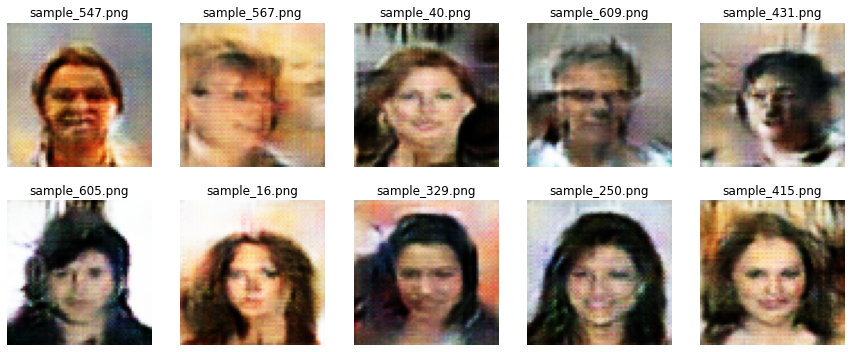

In [ ]:
visualize(new_samples_dir, n_cols=5, n_rows=2)

If you generated something that looks like a face - it's cool! Add 2 points to your mark.

## Face interpolation (1 point)

Let's interpolate between faces: generate two vectors $z_1$ and $z_2$ and get a batch of vectors of the form $\alpha\cdot z_1 + (1- \alpha)\cdot  z_2, \alpha \in [0,1].$ Generate faces on them and look at results. The generator displays pictures in the range from -1 to 1, so use the inverse transform function from the file utils.py.

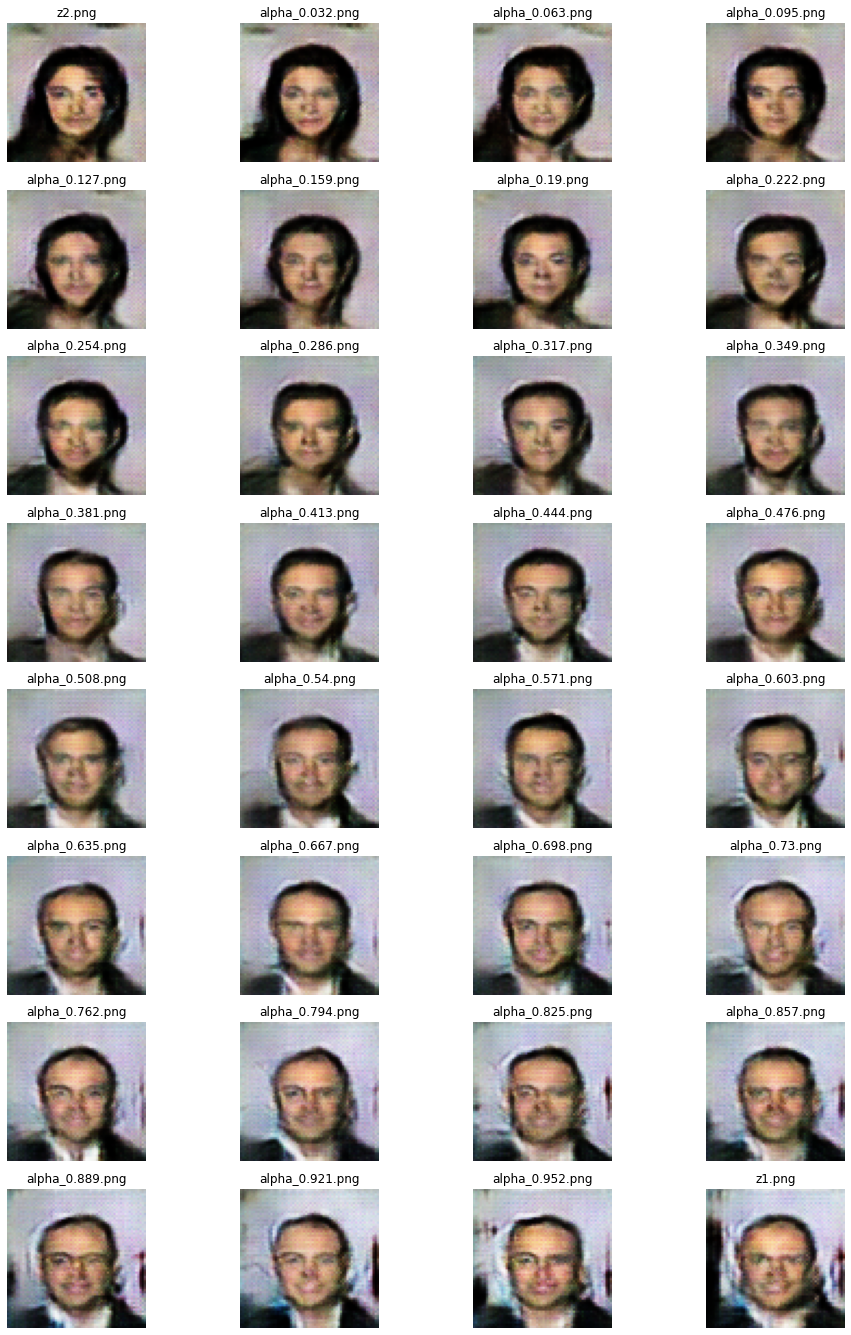

In [ ]:
zs = np.random.uniform(-1, 1, [2, Z_DIM]).astype(np.float32)
alphas = np.linspace(0, 1, BATCH_SIZE)
batchz = np.zeros((BATCH_SIZE, Z_DIM))
for i, alpha in enumerate(alphas):
    batchz[i] = alpha*zs[0] + (1 - alpha)*zs[1]

samples = sess.run(G, feed_dict={z: batchz, is_training: False})
interpolation_dir = 'interpolation'
names = []
for i, sample in enumerate(samples):
    if i == 0:
        filename = 'z2.png'
        names.append(filename)
    elif i == len(samples) - 1:
        filename = 'z1.png'
        names.append(filename)
    else:
        filename = 'alpha_' + str(round(alphas[i], 3)) + '.png'
        if i&1 == 0 and i != len(samples) - 2:
            names.append(filename)
    plt.imsave(os.path.join(interpolation_dir, filename), (255*inverse_transform(sample)).astype(np.uint8))

plt.figure(figsize=(16, 24))
for i, name in enumerate(names):
    plt.subplot(8, 4, i+1)
    plt.axis('off')
    img = plt.imread(join(interpolation_dir, name))
    plt.imshow(img)
    plt.title(name)
plt.show()

## Adding a smile (1 point + 1 point for good results)

Let's make face smiling. Find several vectors z, such that the generator generates smiling faces and not. Five vectors in every group should be enough (but the more, the better).

Calculate "smile vector" as mean of vectors z with generated smile on it minus mean of vectors z with generated not smile on it.

Look at the result of applying the smile vector: compare the results of generation before and after the addition of the smile vector.

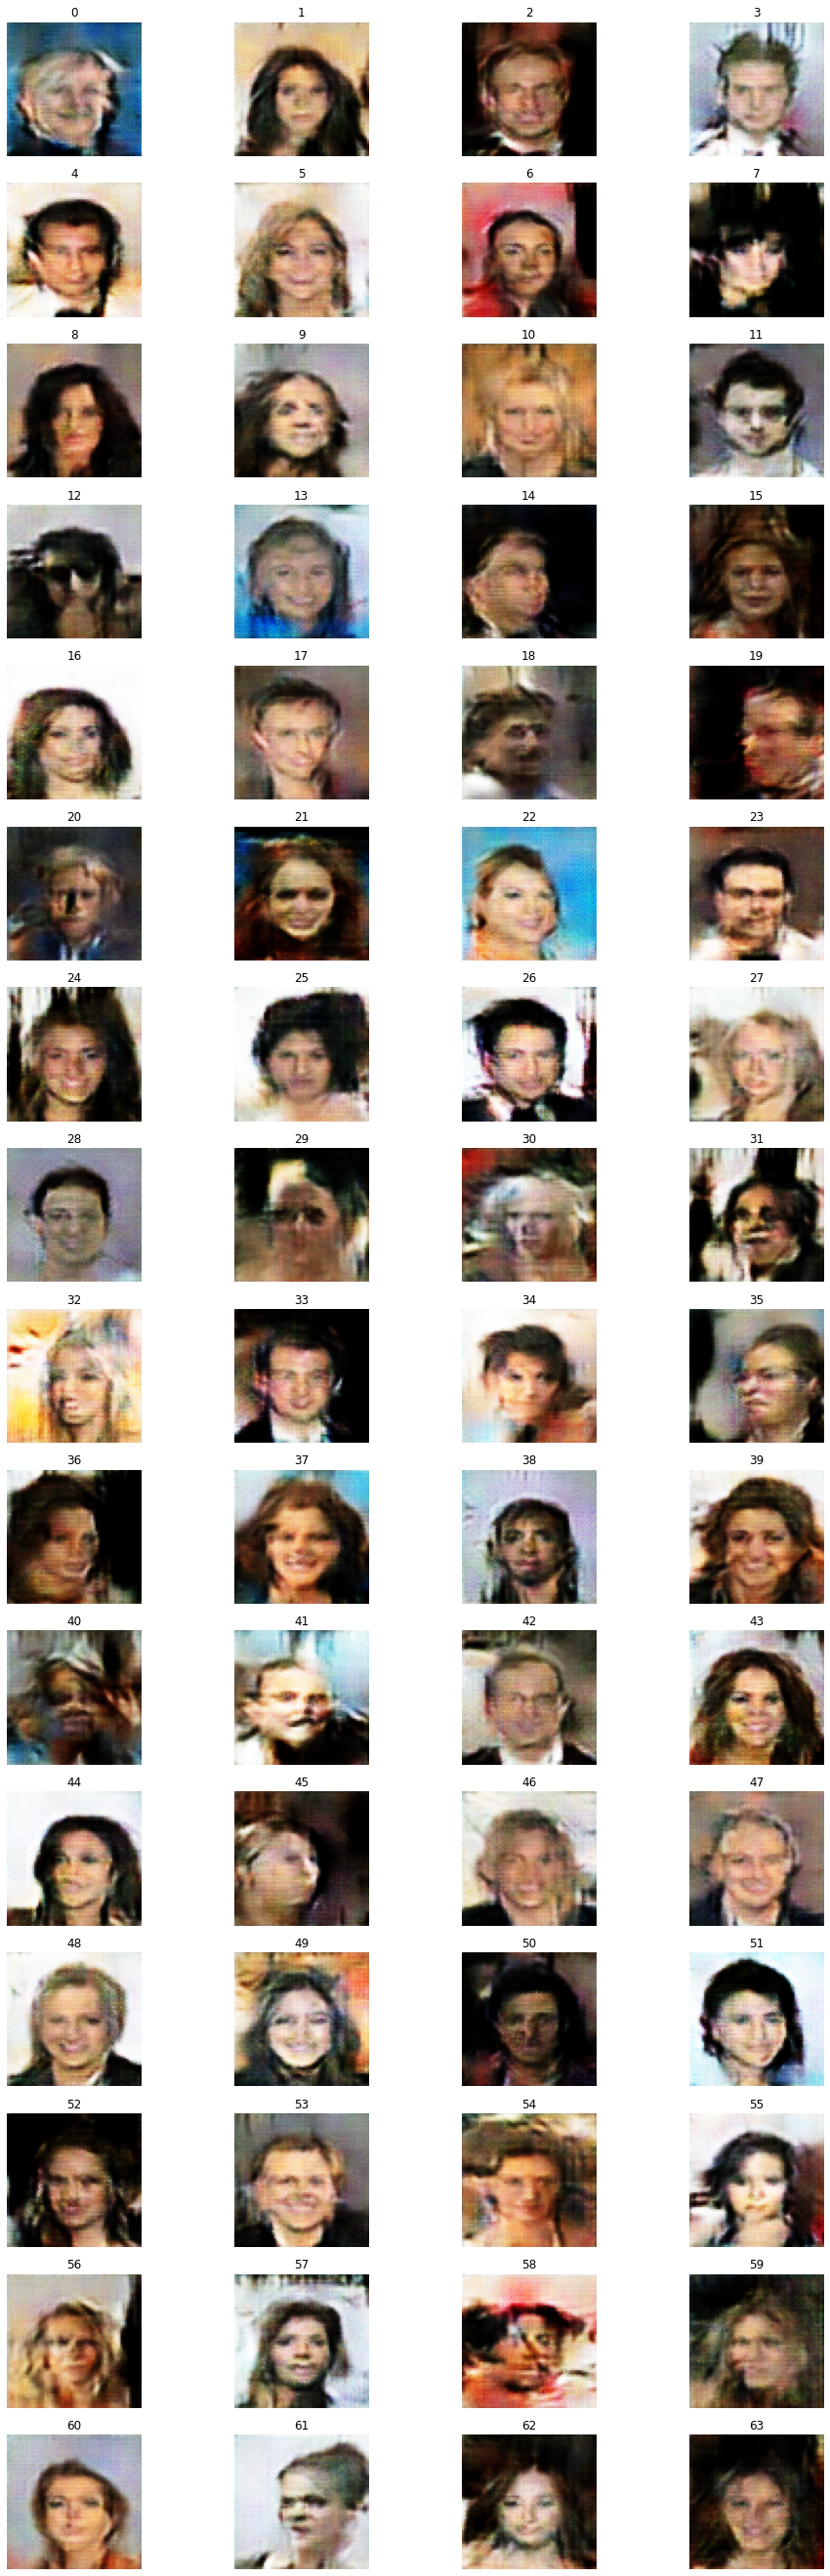

In [ ]:
batchz = np.random.uniform(-1, 1, [BATCH_SIZE, Z_DIM]).astype(np.float32)
samples = sess.run(G, feed_dict={z: batchz, is_training: False})

plt.figure(figsize=(16, 48))
for i, sample in enumerate(samples):
    plt.subplot(16, 4, i+1)
    plt.axis('off')
    plt.title(str(i))
    plt.imshow((255*inverse_transform(sample)).astype(np.uint8))
plt.show()

If faces looks really cool, add bonus 1 point to your score.